In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from pandas.tseries.offsets import DateOffset
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def load_and_prepare_data(file_name):
    df = pd.read_csv(file_name, header=3)  #adjust header=2 for single .csv files, header=3 for compiled files

    color_dict = {'Green': 0, 'Yellow': 1, 'Red': 2, 'Error':3}
    df['alignment_mapped'] = df['Alignment'].map(color_dict)
    df['time_local'] = pd.to_datetime(df['time_local'])

    device_name = df['name'].iloc[0]  # get device name from the 'name' column
    
    return df, device_name


In [3]:
def plot_displacement(df, device_name):
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    instance_name = df['instance'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 10))
    # plot displacement
    ax.plot(df['time_local'], df['um'], label='Displacement')

    # plot alignment
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 0),
                    color='green', alpha=0.5, label='Green Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 1),
                    color='yellow', alpha=1, label='Yellow Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 2),
                    color='red', alpha=1, label='Red Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 3),
                    color='purple', alpha=1, label='Error Alignment')
    # format x-axis as dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=.5))  # tick every week
    plt.gcf().autofmt_xdate()  # rotate the x labels
    ax.set_title(f'{device_name}: {instance_name} from {min_date} to {max_date}')
    ax.legend()
    plt.tight_layout()
    plt.show()


In [4]:
def plot_displacement(df, device_name):
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    instance_name = df['instance'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 10))# plot displacement
    ax.plot(df['time_local'], df['um'], label='Displacement')
    
        
    ax.set_title(f'{device_name}: {instance_name} from {min_date} to {max_date}')
    ax.legend()
    plt.tight_layout()
    plt.show()

In [5]:
df, device_name = load_and_prepare_data('H1_complete.csv')  # also get device_name

In [6]:
# plot_displacement(df, device_name)
# print(device_name)

In [7]:
# #find max um value of every day
# from scipy.signal import find_peaks

# um_column = df["um"].values
# time_local = df["time_local"].values
# peaks, _ = find_peaks(um_col)

# plt.plot(um_column)
# plt.plot(peaks, um_column[peaks], "ro")  # Mark peaks with red dots
# plt.title("")
# plt.xlabel("")
# plt.ylabel("um")
# plt.show()

# ax.plot(df['time_local'], df['um'], label='Displacement')


In [8]:
# #find max um value of whole data set

# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from scipy.signal import find_peaks

# def plot_peaks(df, device_name):
#     min_date = df['time_local'].min().strftime('%Y-%m-%d')
#     max_date = df['time_local'].max().strftime('%Y-%m-%d')
#     instance_name = df['instance'].iloc[0]

#     um = df['um']  # Get the "um" column

#     peaks, _ = find_peaks(um) #extract peak values from um column

#     fig, ax = plt.subplots(figsize=(12, 10))

#     # Plot the displacement data
#     ax.plot(df['time_local'], um, label='Displacement')

#     ax.scatter(df['time_local'].iloc[peaks], um.iloc[peaks], c='red', marker='o', label='Peaks')  # Mark peaks with red dots

#     # Format x-axis as dates
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#     ax.xaxis.set_major_locator(mdates.DayLocator(interval=.5))  # Set the tick interval to 1 day
#     plt.gcf().autofmt_xdate()  # Rotate the x-axis labels for better readability

#     ax.set_title(f'{device_name}: {instance_name} from {min_date} to {max_date}')
#     ax.legend()
#     plt.tight_layout()
#     plt.show()

# #plot entire data set    
# plot_peaks(df, device_name)
# print(device_name)

In [9]:
# def plot_peaks_for_date(df, device_name, target_date):
#     min_date = df['time_local'].min().strftime('%Y-%m-%d')
#     max_date = df['time_local'].max().strftime('%Y-%m-%d')
#     instance_name = df['instance'].iloc[0]

#     # Filter the DataFrame to include only the data for the target date
#     df_filtered = df[df['time_local'].dt.date == target_date]

#     um = df_filtered['um']  # Get the "um" column

#      peaks, _ = find_peaks(um)

#     fig, ax = plt.subplots(figsize=(12, 10))

#     # Plot the displacement data
#     ax.plot(df_filtered['time_local'], um, label='Displacement')

#     # Mark peaks with red dots
#     ax.scatter(df_filtered['time_local'].iloc[peaks], um.iloc[peaks], c='red', marker='o', label='Peaks')

#     # Set the x-axis limits to cover the data for the target date
#     ax.set_xlim(df_filtered['time_local'].min(), df_filtered['time_local'].max())

#     # Format x-axis as dates
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#     ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set the tick interval to 1 hour
#     plt.gcf().autofmt_xdate()  # Rotate the x-axis labels for better readability

#     ax.set_title(f'{device_name}: {instance_name} for {target_date}')
#     ax.legend()
#     plt.tight_layout()
#     plt.show()

# from datetime import date

# target_date = date(2023, 7, 15)  # Replace with your desired date to visualize

# plot_peaks_for_date(df, device_name, target_date)

In [10]:
# def plot_peaks(df, device_name):
#     min_date = df['time_local'].min().strftime('%Y-%m-%d')
#     max_date = df['time_local'].max().strftime('%Y-%m-%d')
#     instance_name = df['instance'].iloc[0]

#     peaks, _ = find_peaks(um)
    
#     fig, ax = plt.subplots(figsize=(12, 10))
#     # plot peaks
#     ax.plot(df['time_local'], df['um'], label='Displacement')
    
#     # format x-axis as dates
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#     ax.xaxis.set_major_locator(mdates.DayLocator(interval=.5))  # tick every week
#     plt.gcf().autofmt_xdate()  # rotate the x labels
#     ax.set_title(f'{device_name}: {instance_name} from {min_date} to {max_date}')
#     ax.legend()
#     plt.tight_layout()
#     plt.show()

In [11]:
# def plot_peaks(df, device_name):
#     min_date = df['time_local'].min().strftime('%Y-%m-%d')
#     max_date = df['time_local'].max().strftime('%Y-%m-%d')
#     instance_name = df['instance'].iloc[0]

#     # Specify the "um" column when calling find_peaks
#     peaks, _ = find_peaks(df['um'])

#     fig, ax = plt.subplots(figsize=(12, 10))
    
#     # Plot peaks
#     ax.plot(df['time_local'], df['um'], label='Displacement')
    
#     # Format x-axis as dates
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#     ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set the tick interval to 1 day
#     plt.gcf().autofmt_xdate()  # Rotate the x-axis labels for better readability
    
#     ax.set_title(f'{device_name}: {instance_name} from {min_date} to {max_date}')
#     ax.legend()
#     plt.tight_layout()
#     plt.show()

In [12]:
# plot_peaks(df, device_name)
# print(device_name)

In [13]:
from datetime import date

# Define your target date
target_date = date(2023, 7, 15)  # Replace with your desired date

# Filter the DataFrame for the target date
df_filtered = df[df['time_local'].dt.date == target_date]

# Find the maximum and minimum "um" values within the target date
maximum_um = df_filtered['um'].max()
minimum_um = df_filtered['um'].min()

print(f"Maximum um for {target_date}: {maximum_um}")
print(f"Minimum um for {target_date}: {minimum_um}")

Maximum um for 2023-07-15: -50.78125
Minimum um for 2023-07-15: -257.8125


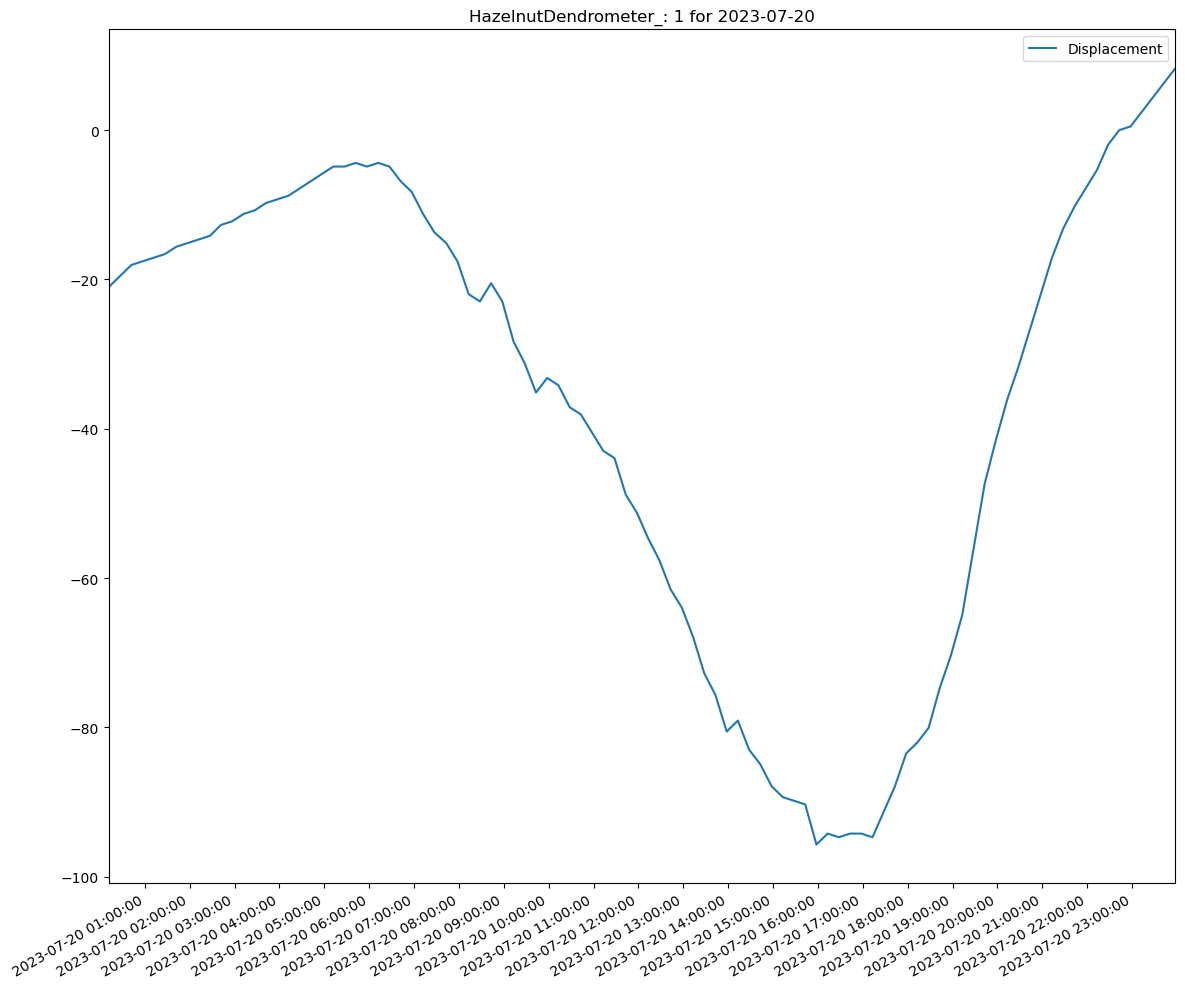

In [14]:
def plot_target_date(df, device_name, target_date):
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    instance_name = df['instance'].iloc[0]

    # Filter the DataFrame to include only the data for the target date
    df_filtered = df[df['time_local'].dt.date == target_date]

    um = df_filtered['um']  # Get the "um" column

    fig, ax = plt.subplots(figsize=(12, 10))

    # Plot the displacement data
    ax.plot(df_filtered['time_local'], um, label='Displacement')

    # Set the x-axis limits to cover the data for the target date
    ax.set_xlim(df_filtered['time_local'].min(), df_filtered['time_local'].max())

    # Format x-axis as dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set the tick interval to 1 hour
    plt.gcf().autofmt_xdate()  # Rotate the x-axis labels for better readability

    ax.set_title(f'{device_name}: {instance_name} for {target_date}')
    ax.legend()
    plt.tight_layout()
    plt.show()

from datetime import date, timedelta

target_date = date(2023, 7, 20)  # Replace with your desired date to visualize

plot_target_date(df, device_name, target_date)


In [15]:
# Find the maximum and minimum "um" values within the target date
maximum_um = df_filtered['um'].max()
minimum_um = df_filtered['um'].min()

max_um_row = df_filtered[df_filtered['um'] == maximum_um]
date_time_max_um = max_um_row['time_local'].iloc[0]

min_um_row = df_filtered[df_filtered['um'] == minimum_um]
date_time_min_um = min_um_row['time_local'].iloc[0]

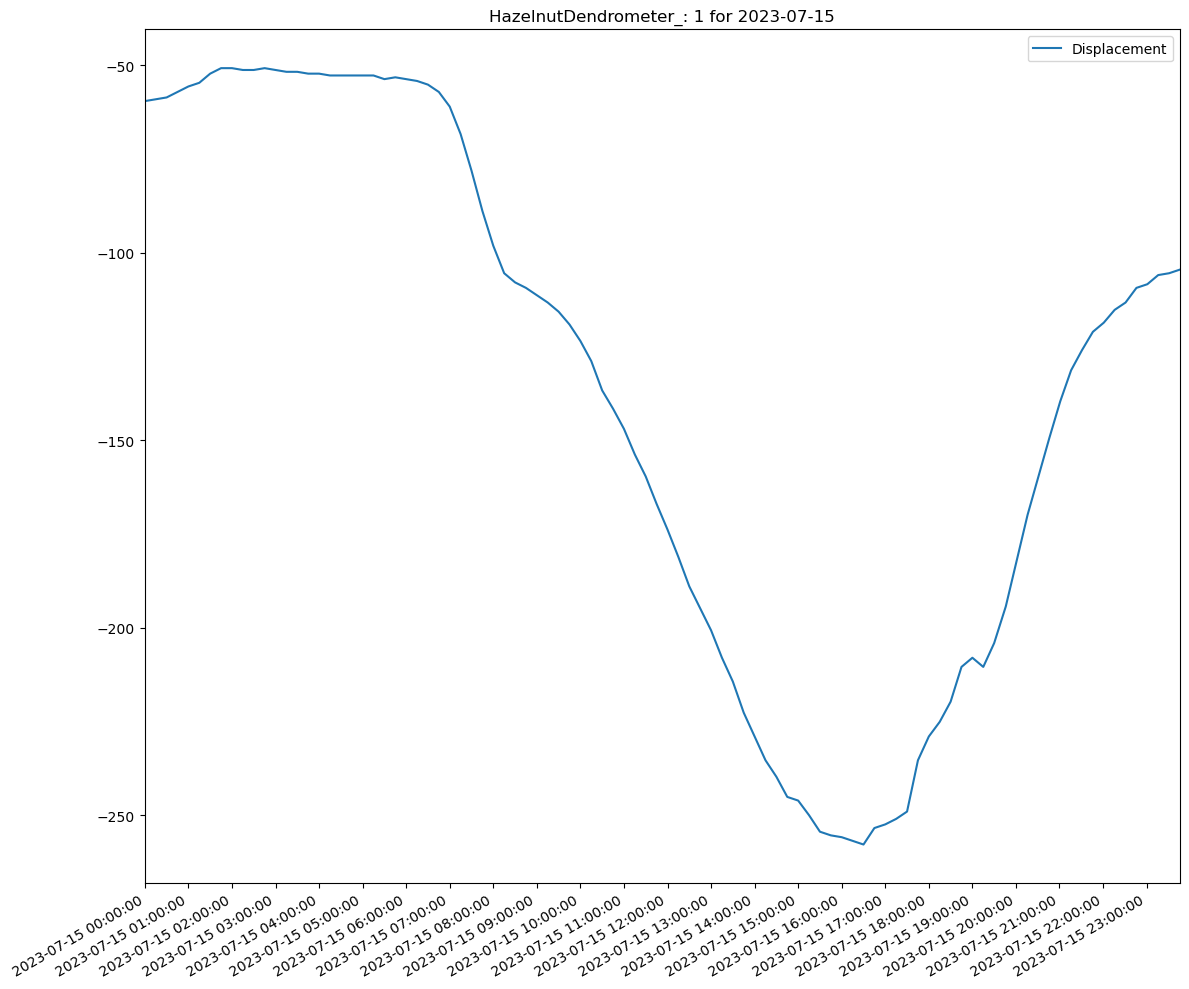

Maximum um: -50.78125
Maximum um time: 2023-07-15 01:45:00
Minimum um: -257.8125
Minimum um time: 2023-07-15 16:30:00
Displacement: 207.03125


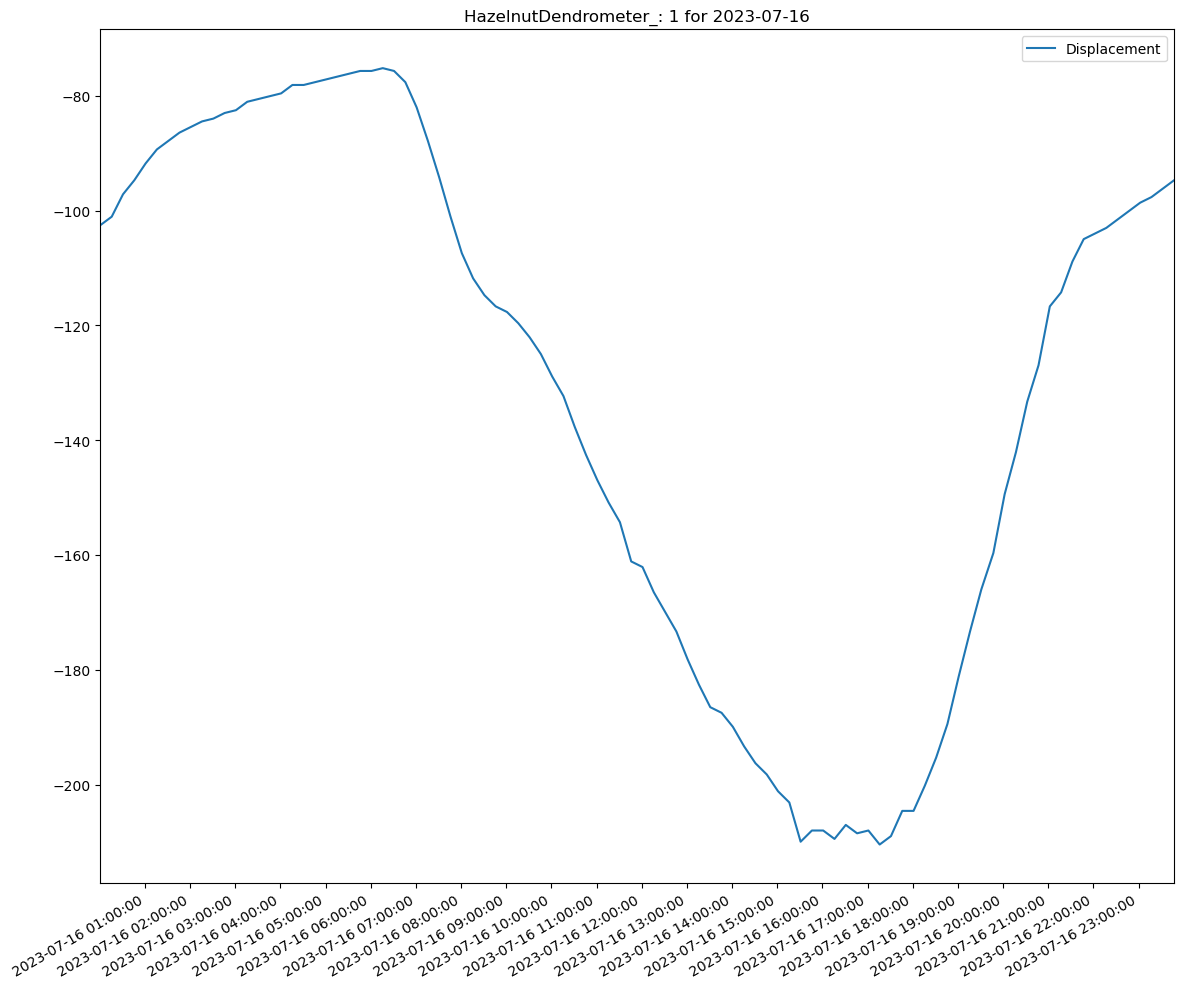

Maximum um: -75.1953125
Maximum um time: 2023-07-16 06:16:00
Minimum um: -210.4492188
Minimum um time: 2023-07-16 17:16:00
Displacement: 135.2539063


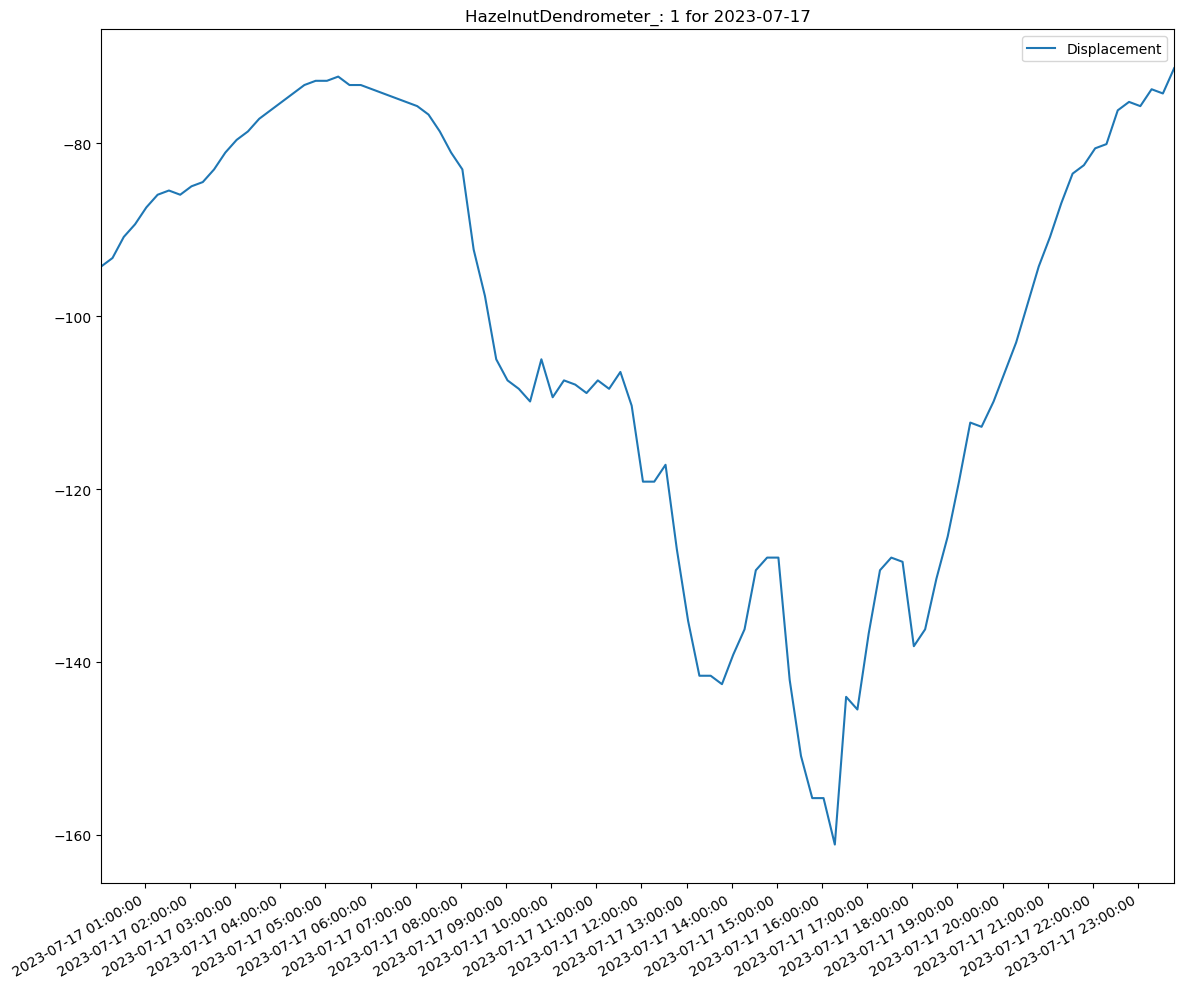

Maximum um: -71.2890625
Maximum um time: 2023-07-17 23:48:00
Minimum um: -161.1328125
Minimum um time: 2023-07-17 16:17:00
Displacement: 89.84375


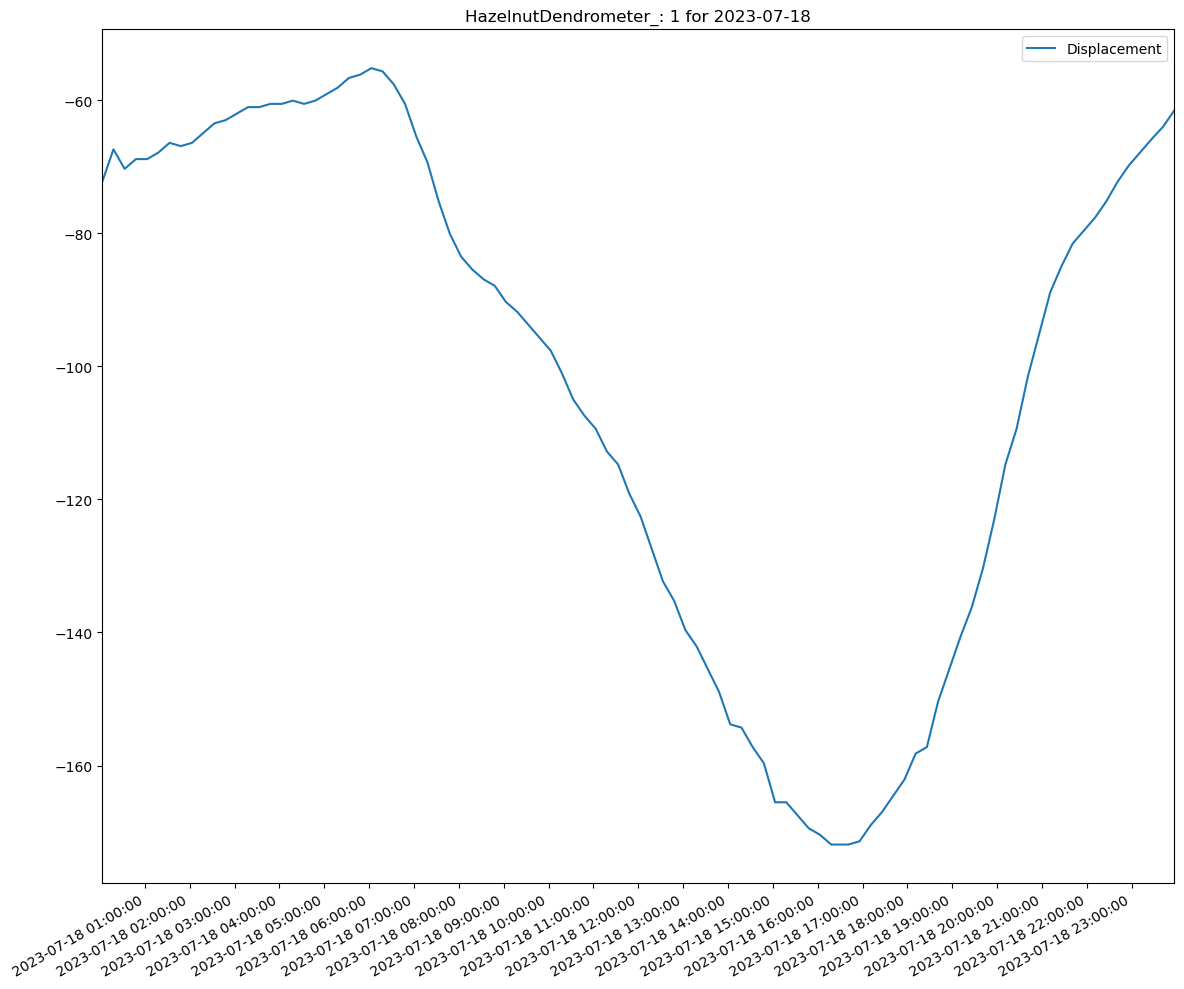

Maximum um: -55.17578125
Maximum um time: 2023-07-18 06:03:00
Minimum um: -171.875
Minimum um time: 2023-07-18 16:18:00
Displacement: 116.69921875


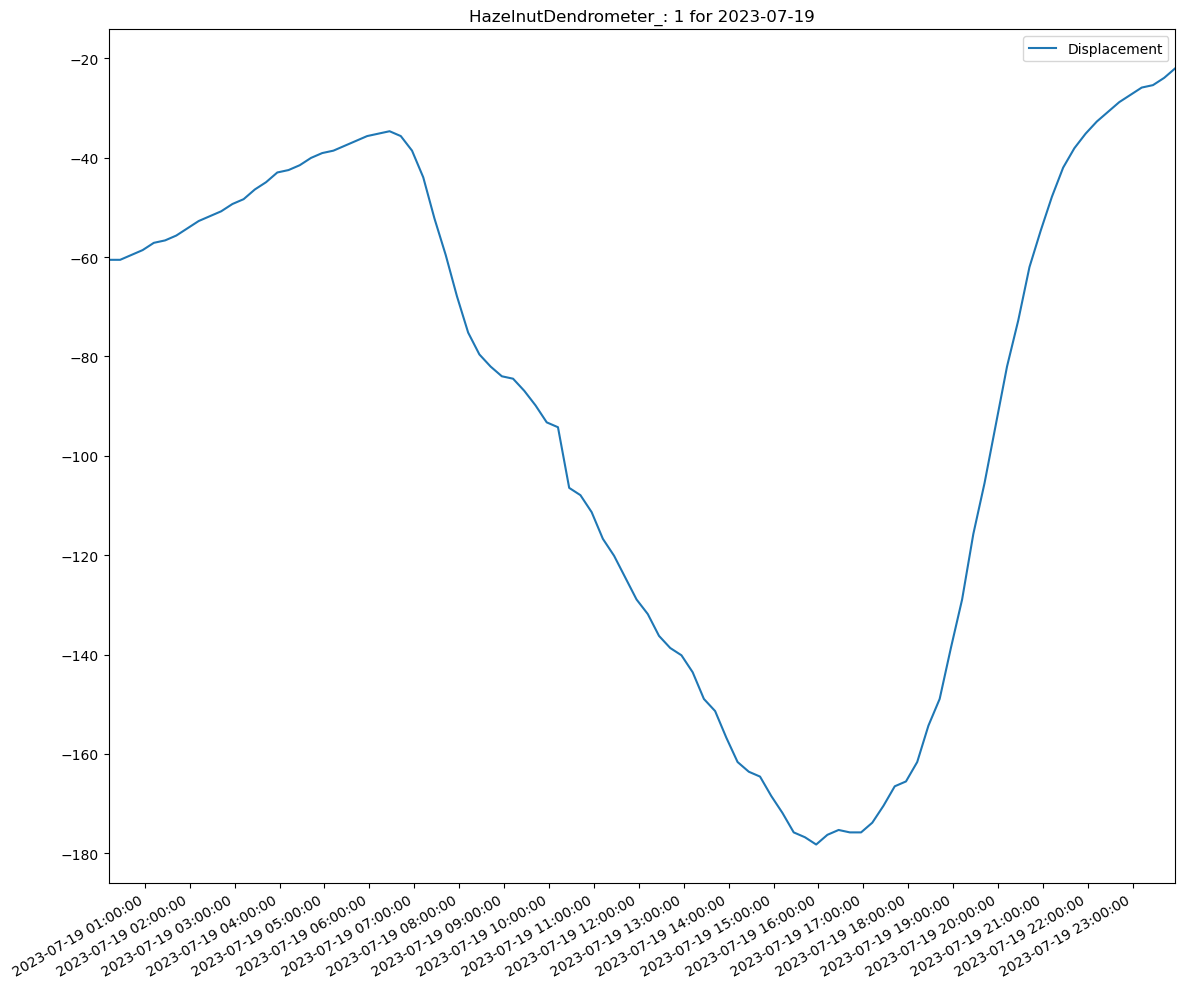

Maximum um: -21.97265625
Maximum um time: 2023-07-19 23:57:00
Minimum um: -178.2226563
Minimum um time: 2023-07-19 15:57:00
Displacement: 156.25000005


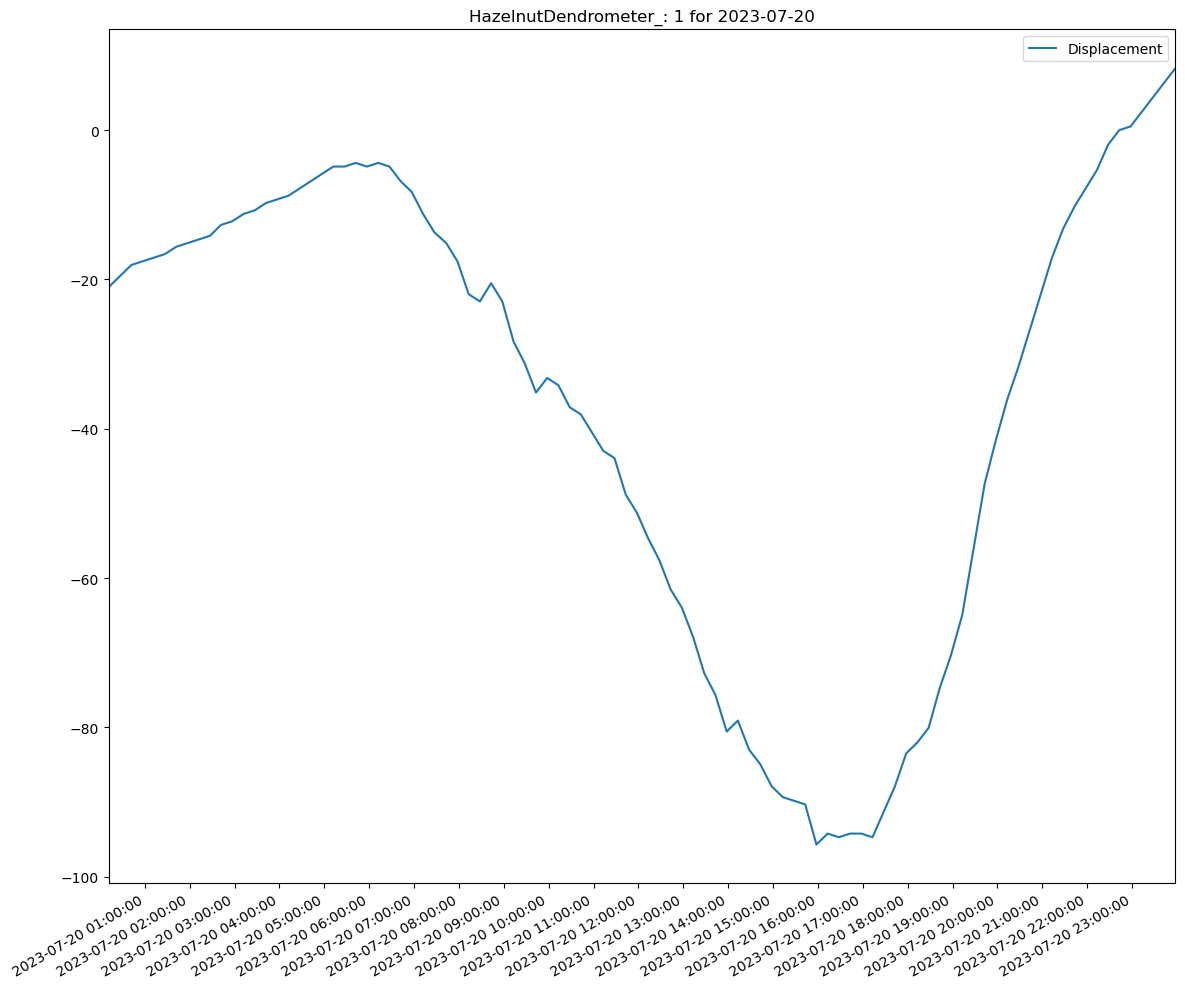

Maximum um: 8.30078125
Maximum um time: 2023-07-20 23:58:00
Minimum um: -95.703125
Minimum um time: 2023-07-20 15:58:00
Displacement: 104.00390625


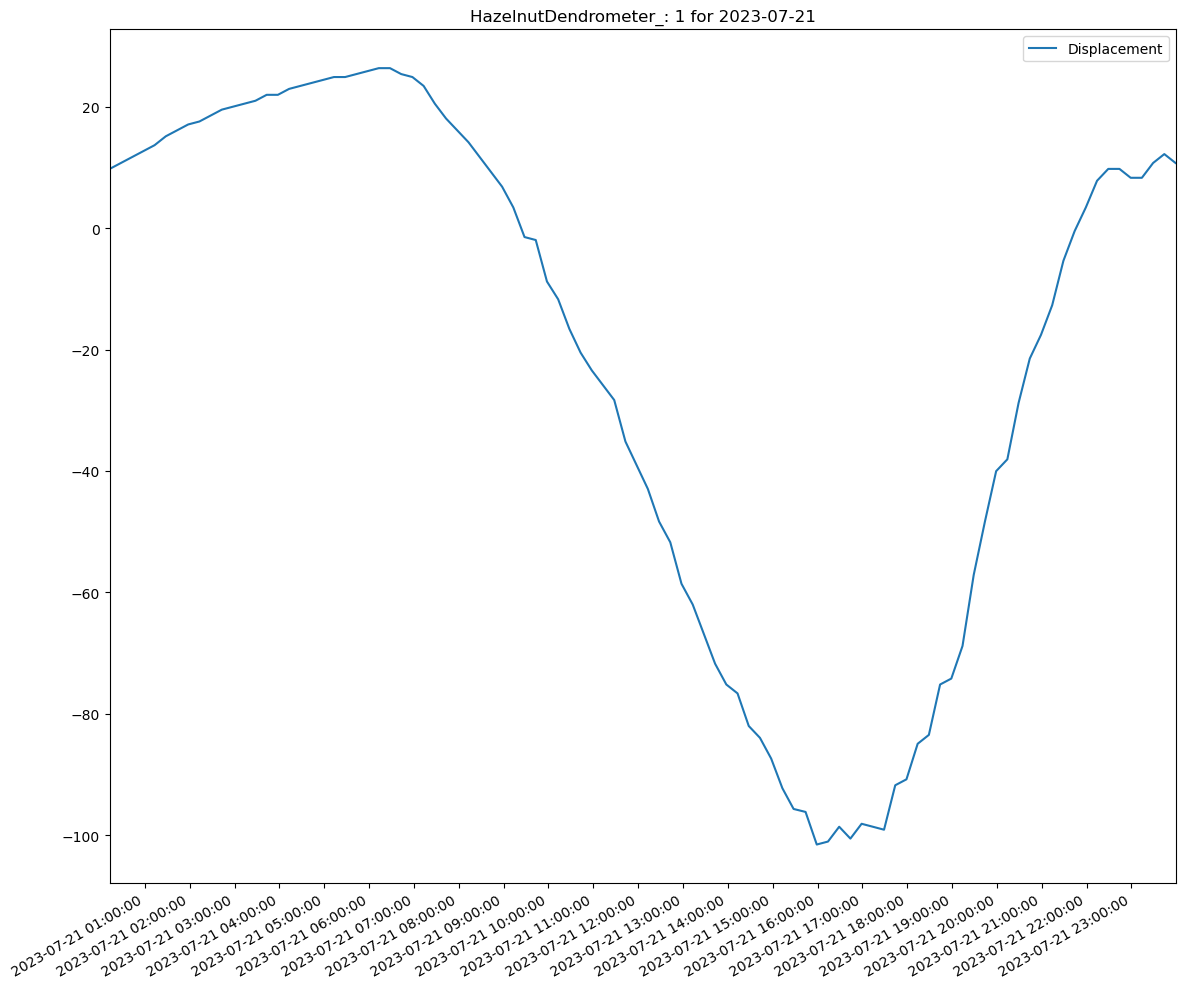

Maximum um: 26.3671875
Maximum um time: 2023-07-21 06:13:00
Minimum um: -101.5625
Minimum um time: 2023-07-21 15:59:00
Displacement: 127.9296875


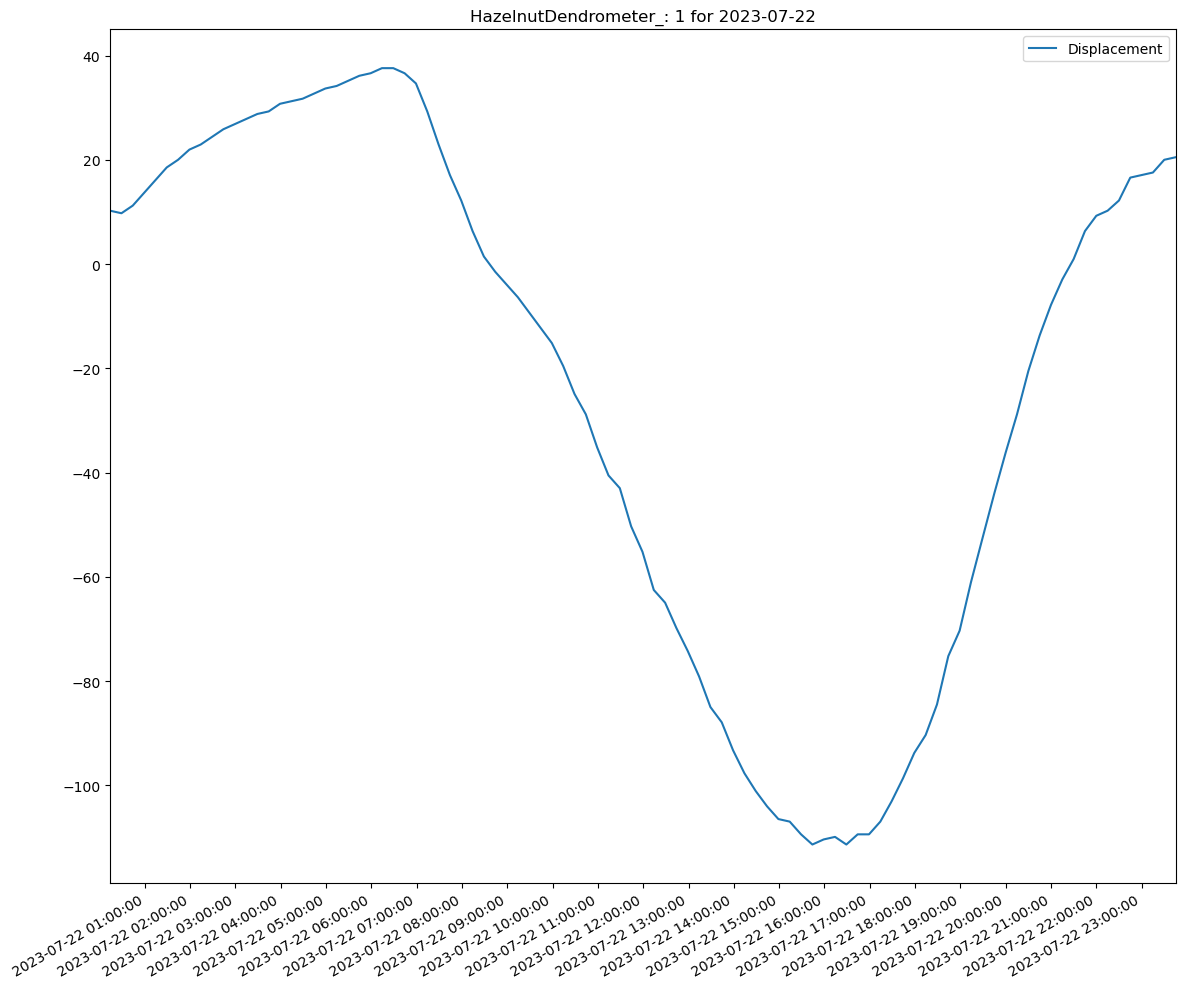

Maximum um: 37.59765625
Maximum um time: 2023-07-22 06:14:00
Minimum um: -111.328125
Minimum um time: 2023-07-22 15:44:00
Displacement: 148.92578125


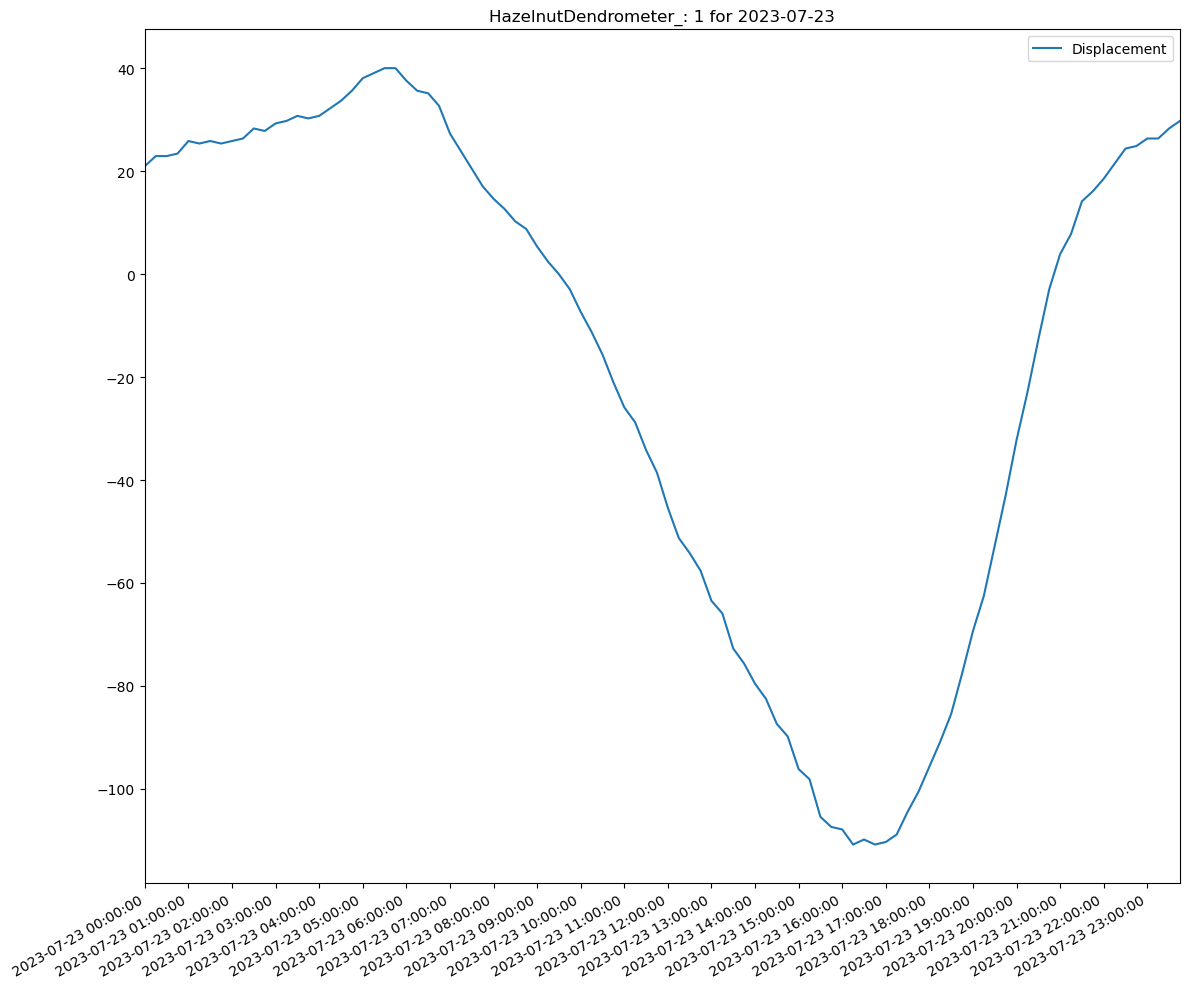

Maximum um: 40.0390625
Maximum um time: 2023-07-23 05:30:00
Minimum um: -110.8398438
Minimum um time: 2023-07-23 16:15:00
Displacement: 150.87890629999998


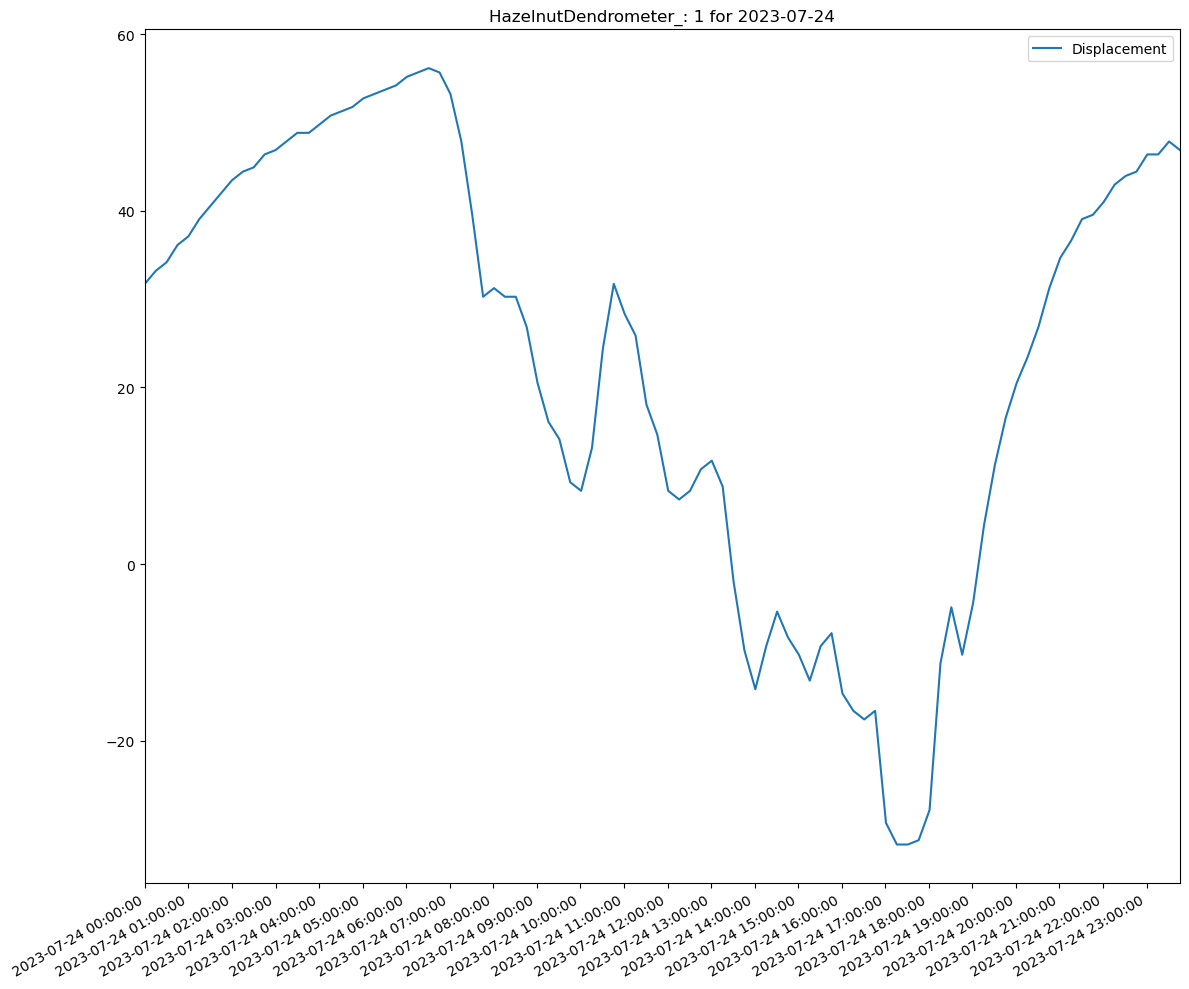

Maximum um: 56.15234375
Maximum um time: 2023-07-24 06:31:00
Minimum um: -31.73828125
Minimum um time: 2023-07-24 17:16:00
Displacement: 87.890625


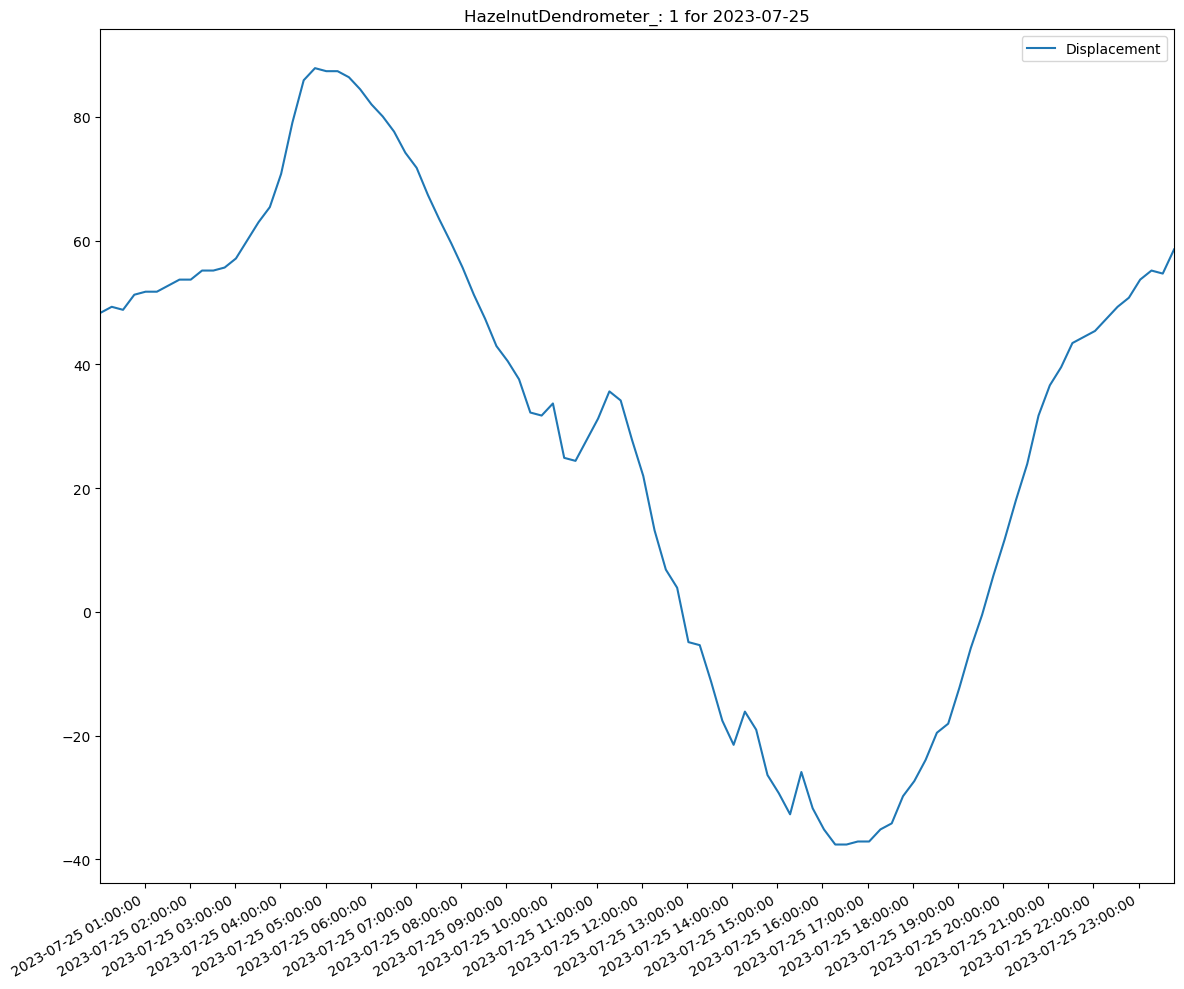

Maximum um: 87.890625
Maximum um time: 2023-07-25 04:46:00
Minimum um: -37.59765625
Minimum um time: 2023-07-25 16:17:00
Displacement: 125.48828125


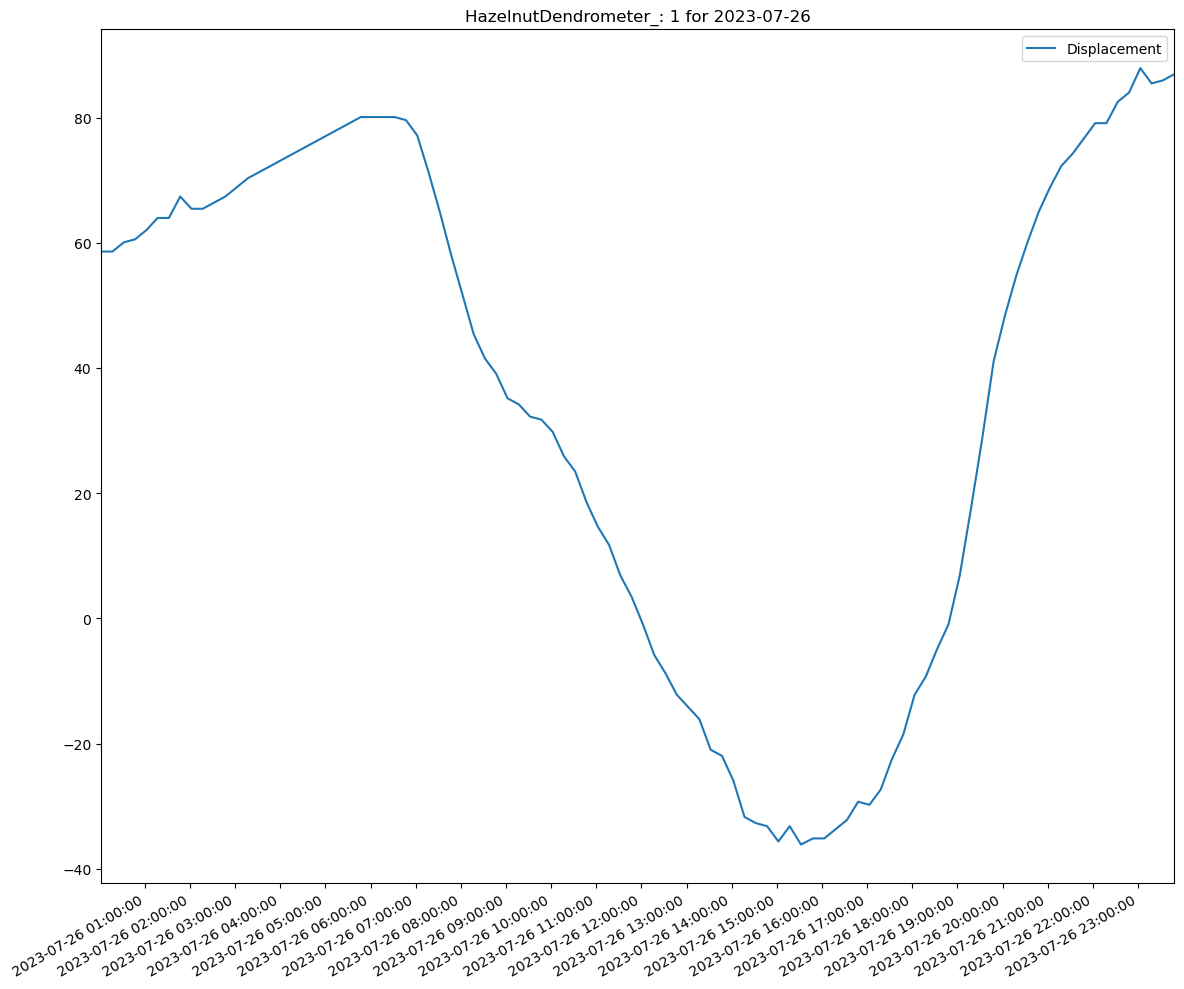

Maximum um: 87.890625
Maximum um time: 2023-07-26 23:03:00
Minimum um: -36.1328125
Minimum um time: 2023-07-26 15:32:00
Displacement: 124.0234375


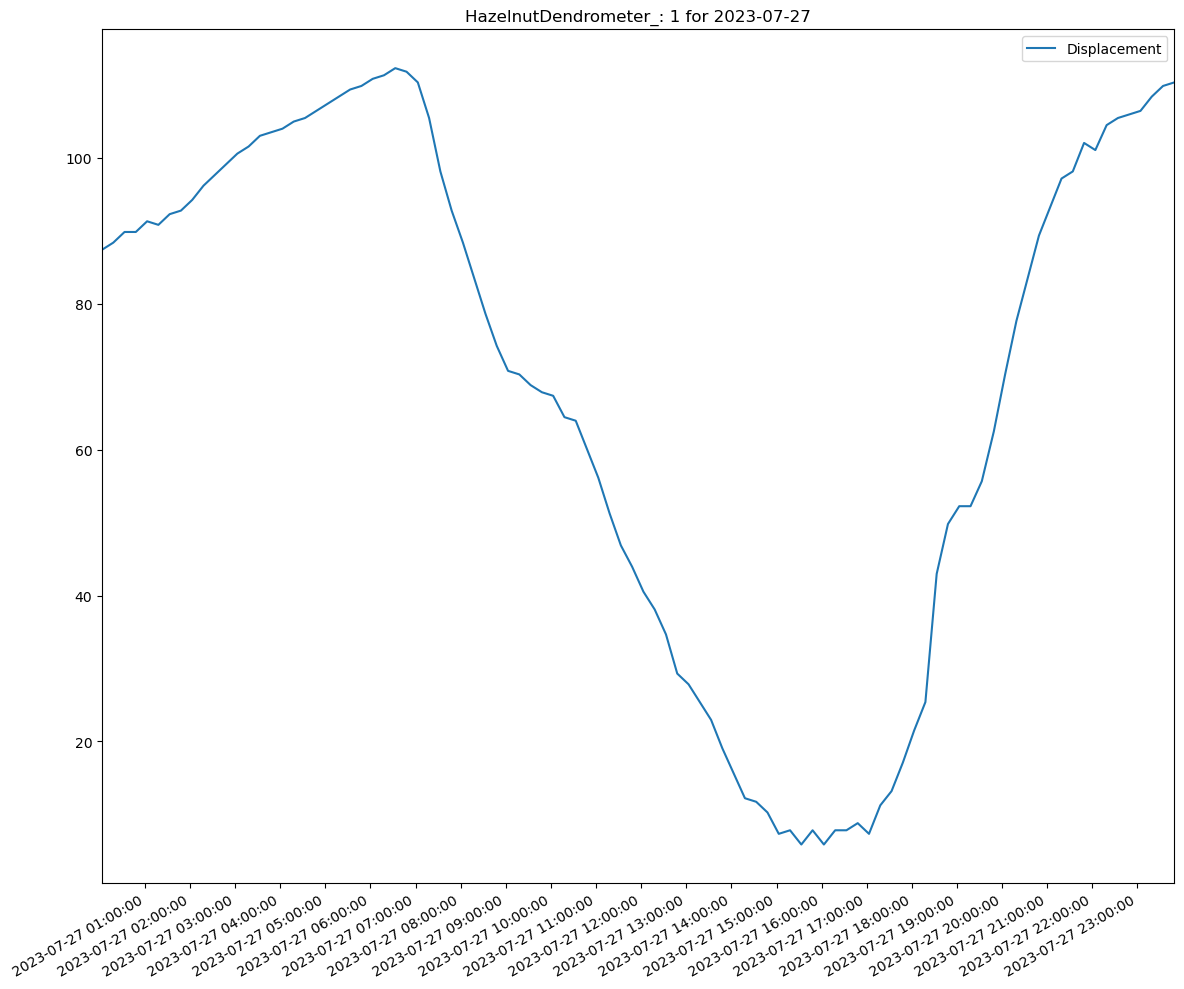

Maximum um: 112.3046875
Maximum um time: 2023-07-27 06:33:00
Minimum um: 5.859375
Minimum um time: 2023-07-27 15:33:00
Displacement: 106.4453125


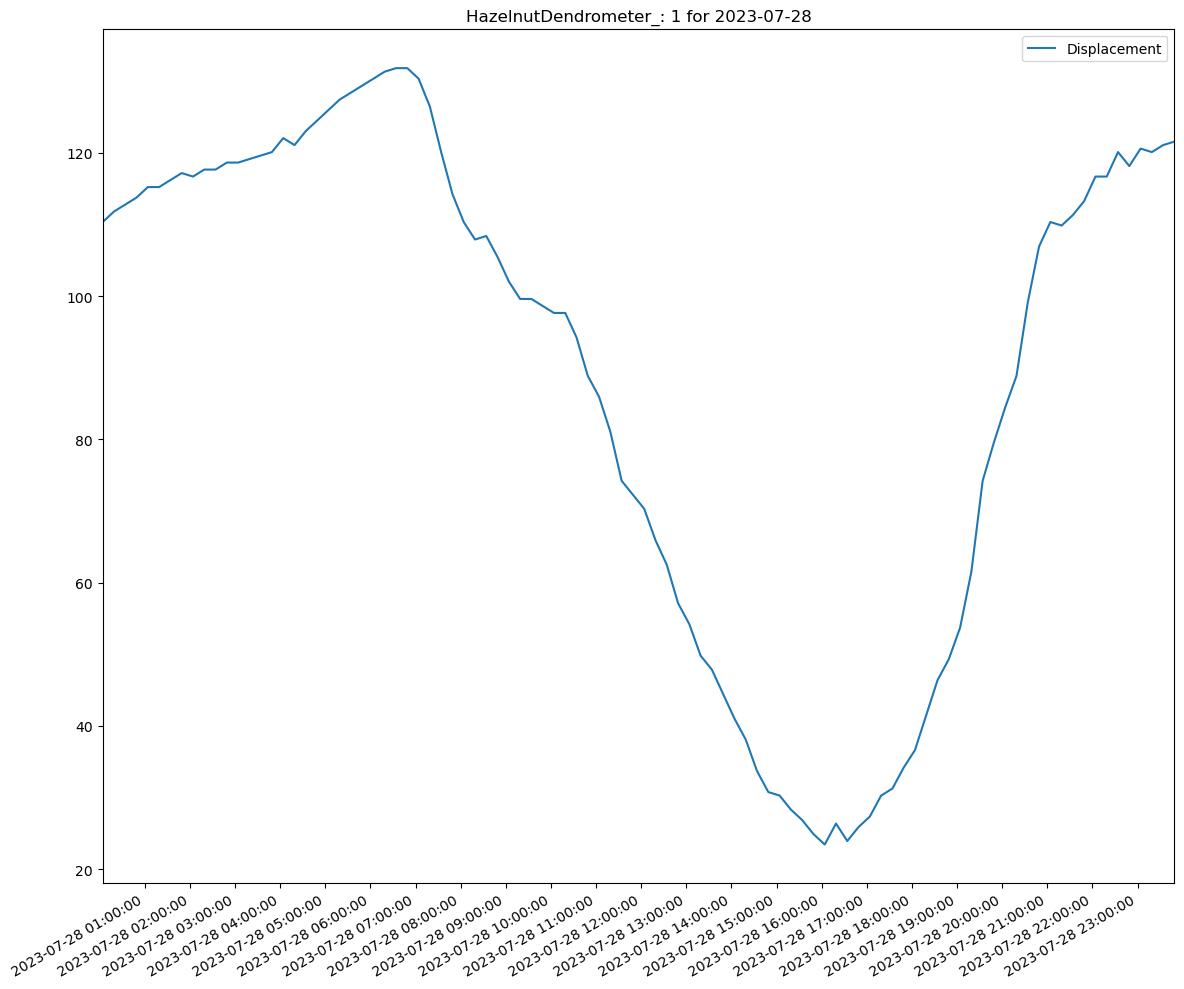

Maximum um: 131.8359375
Maximum um time: 2023-07-28 06:34:00
Minimum um: 23.4375
Minimum um time: 2023-07-28 16:04:00
Displacement: 108.3984375


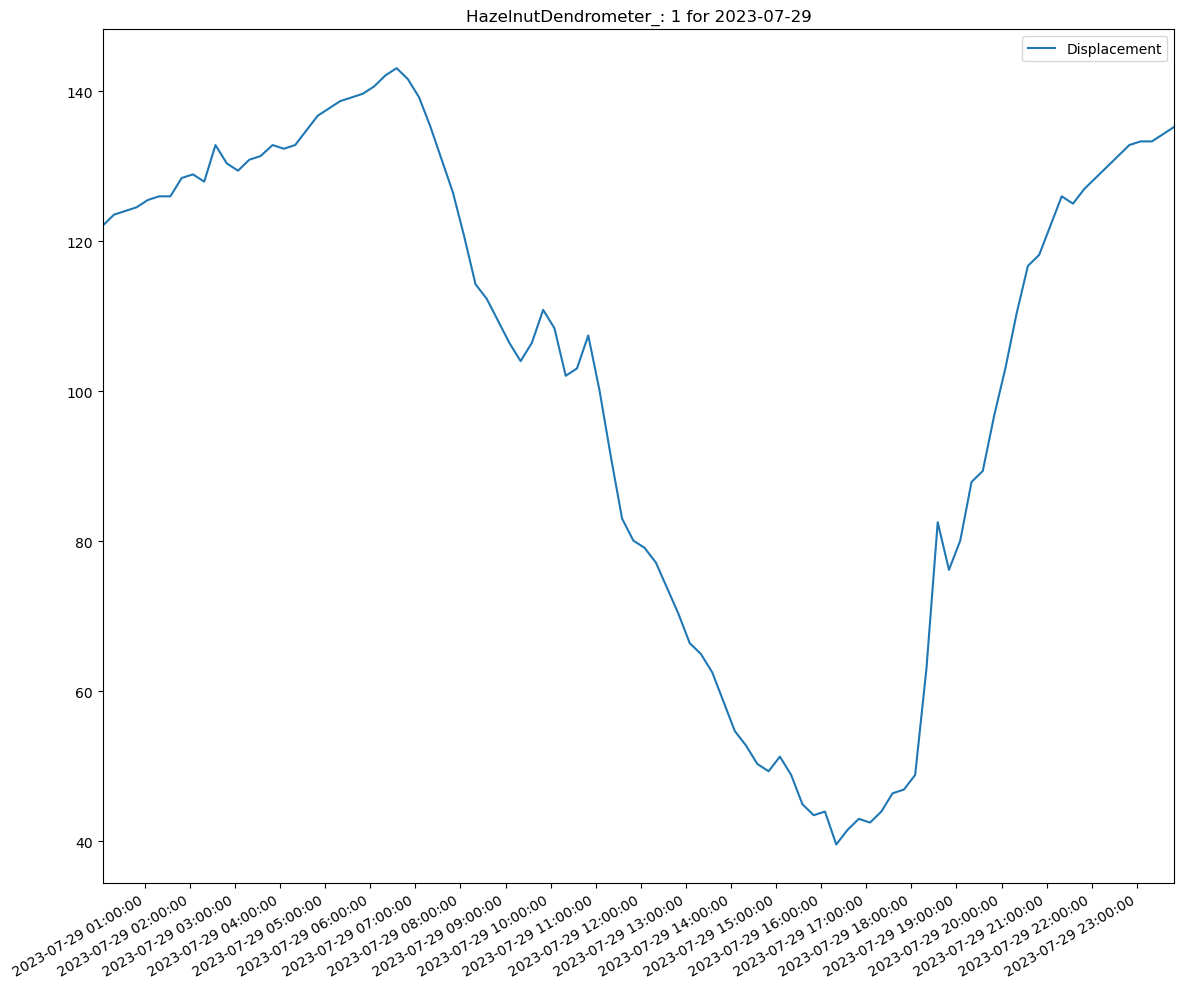

Maximum um: 143.0664063
Maximum um time: 2023-07-29 06:35:00
Minimum um: 39.55078125
Minimum um time: 2023-07-29 16:20:00
Displacement: 103.51562505000001


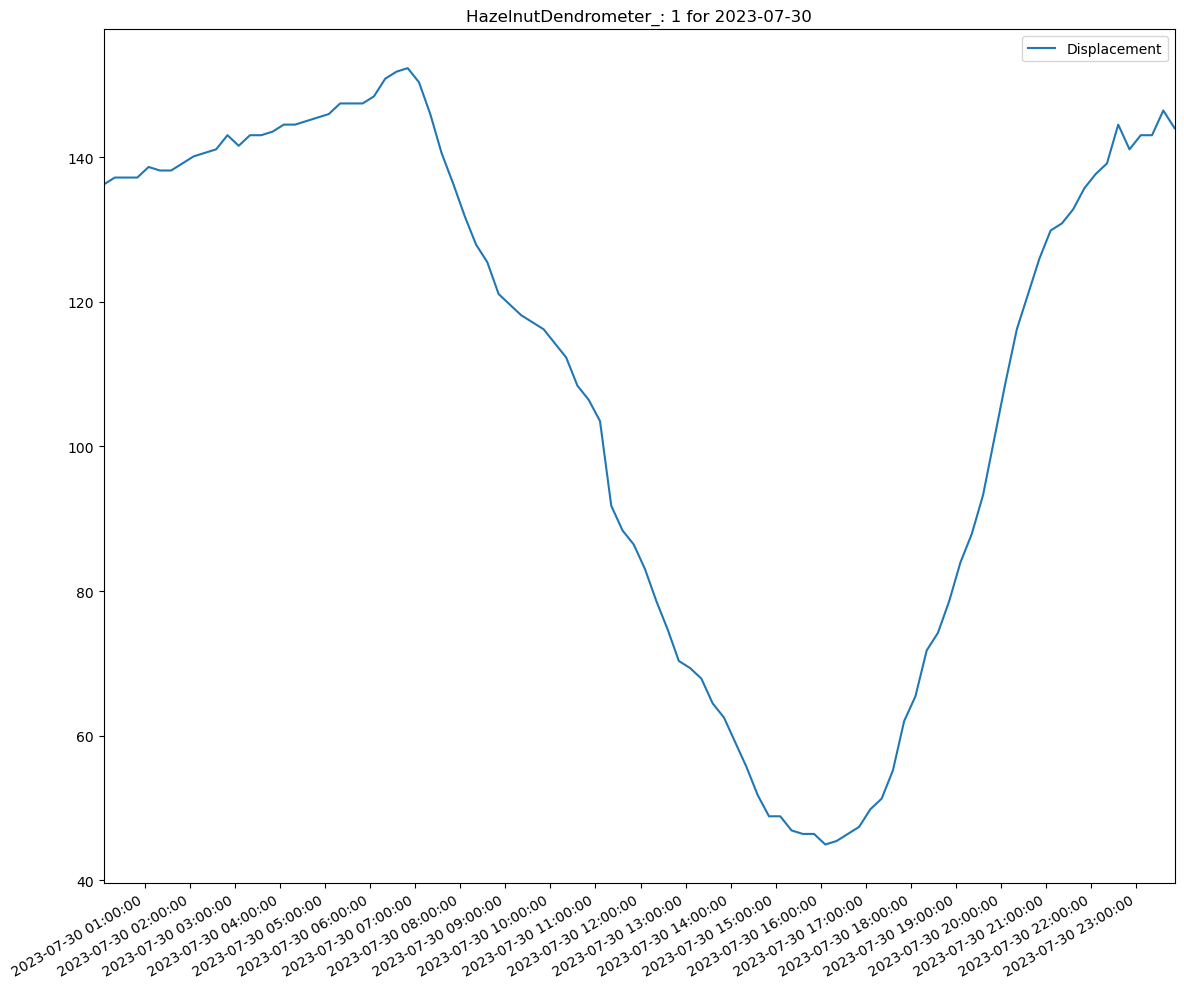

Maximum um: 152.34375
Maximum um time: 2023-07-30 06:50:00
Minimum um: 44.921875
Minimum um time: 2023-07-30 16:06:00
Displacement: 107.421875


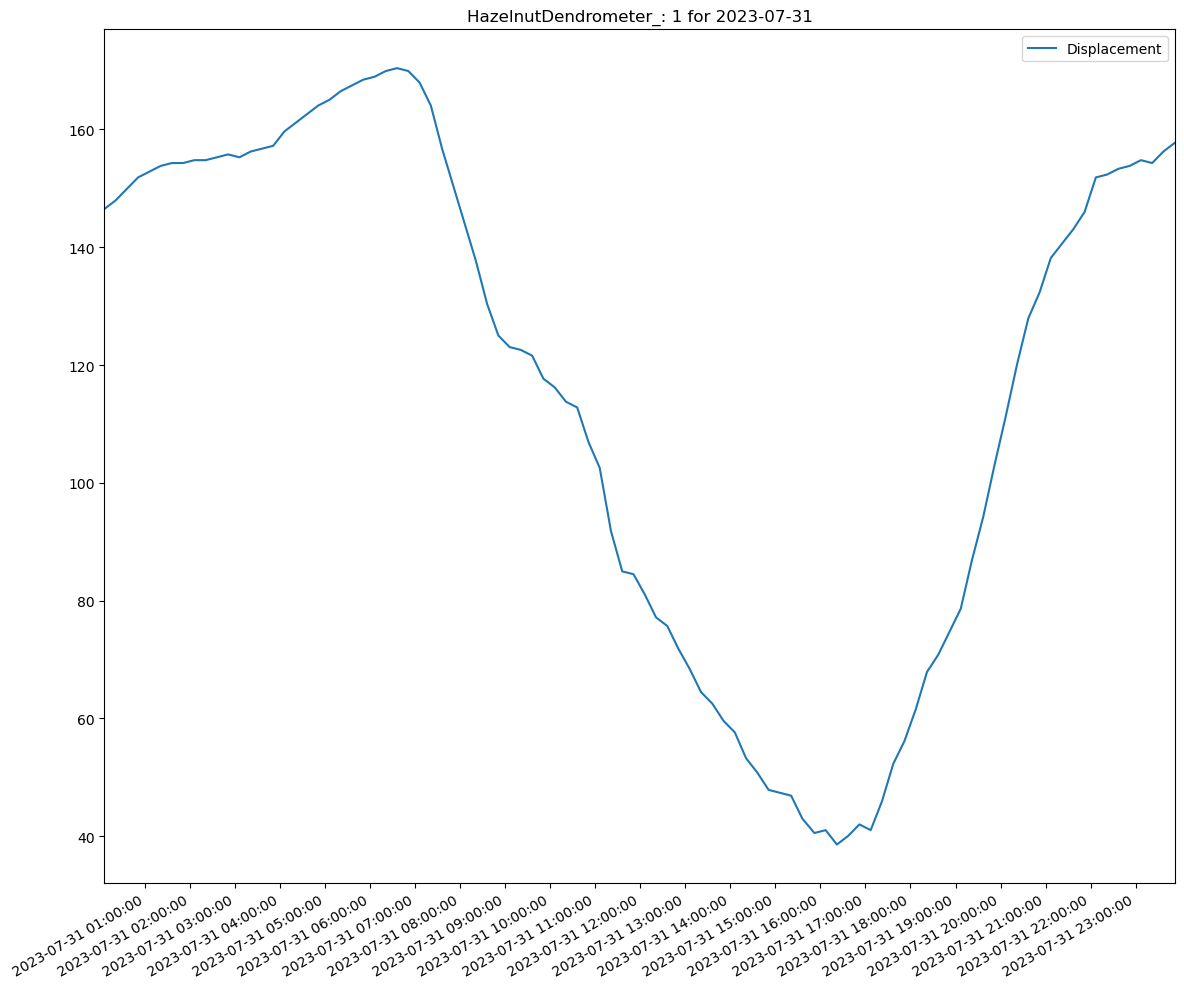

Maximum um: 170.4101563
Maximum um time: 2023-07-31 06:36:00
Minimum um: 38.57421875
Minimum um time: 2023-07-31 16:22:00
Displacement: 131.83593755


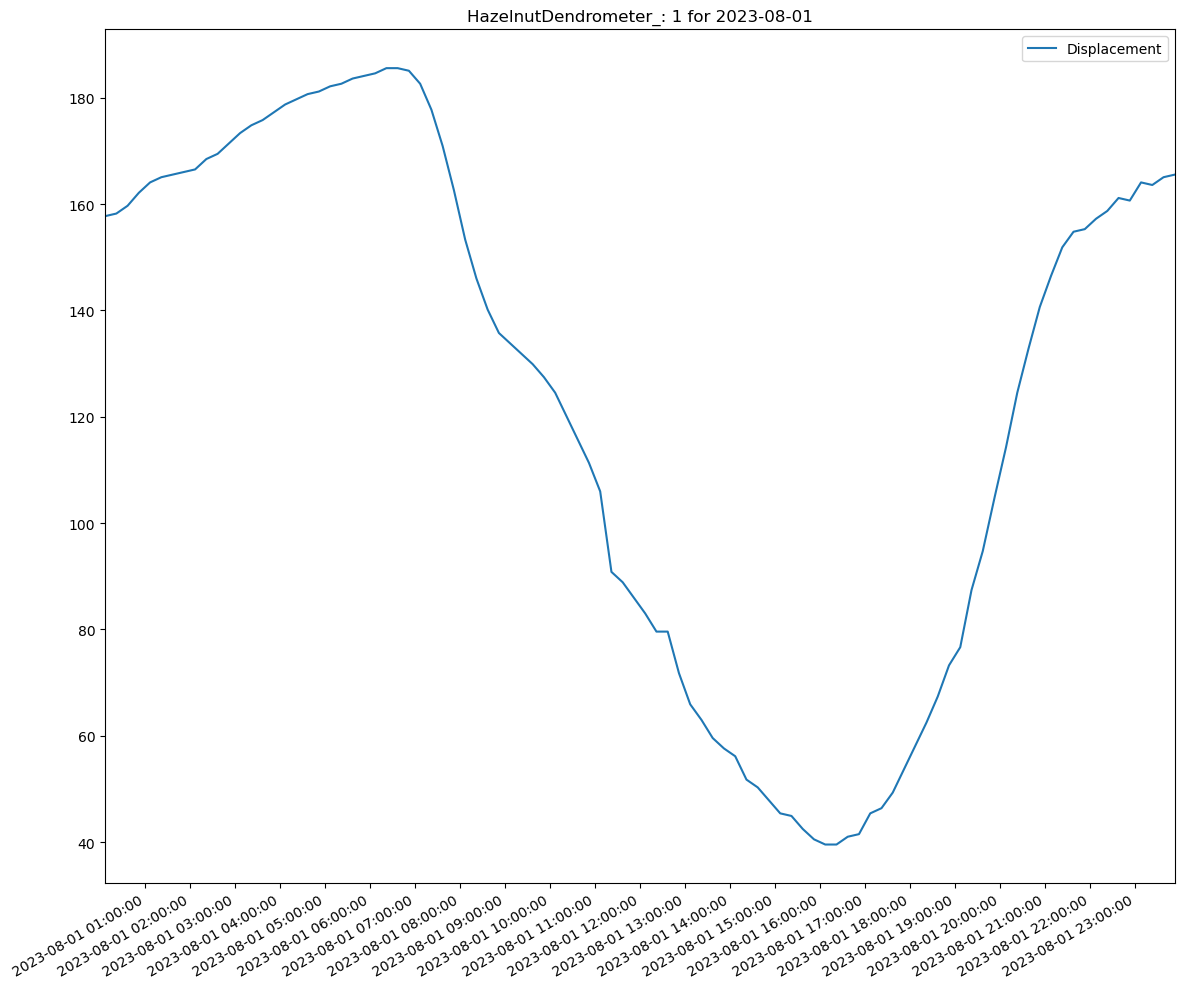

Maximum um: 185.546875
Maximum um time: 2023-08-01 06:22:00
Minimum um: 39.55078125
Minimum um time: 2023-08-01 16:07:00
Displacement: 145.99609375


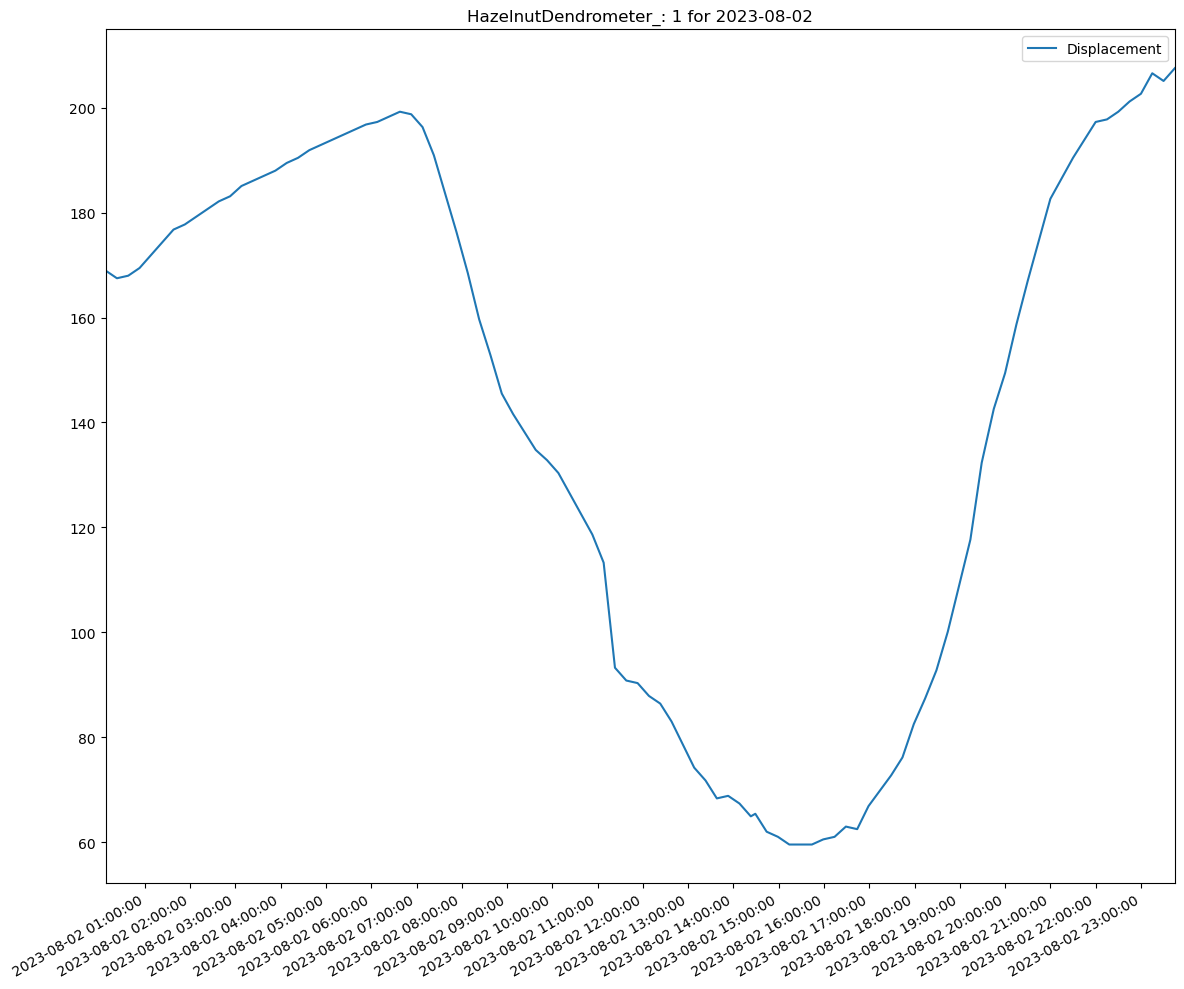

Maximum um: 207.5195313
Maximum um time: 2023-08-02 23:45:00
Minimum um: 59.5703125
Minimum um time: 2023-08-02 15:14:00
Displacement: 147.9492188


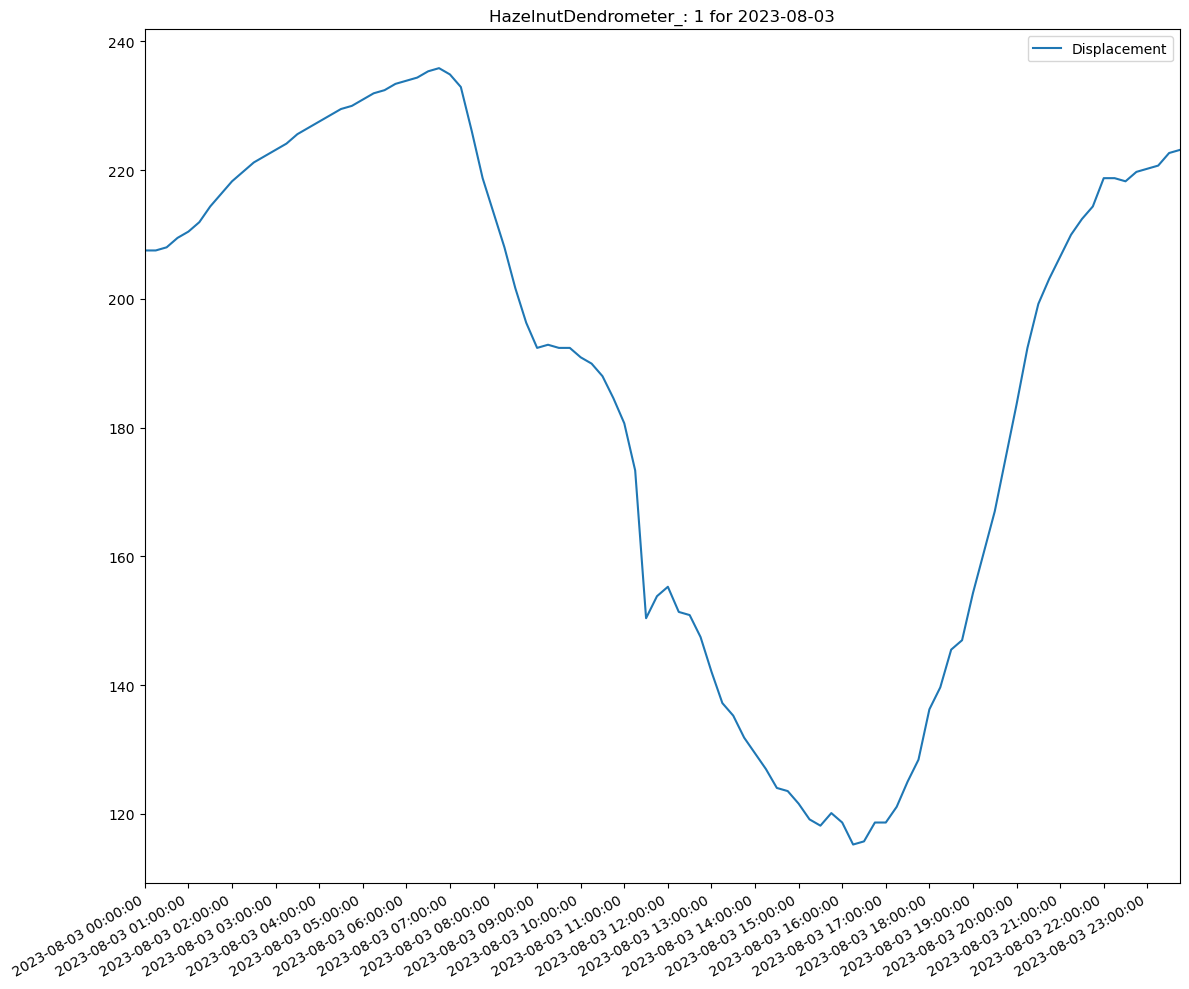

Maximum um: 235.8398438
Maximum um time: 2023-08-03 06:45:00
Minimum um: 115.234375
Minimum um time: 2023-08-03 16:15:00
Displacement: 120.60546880000001


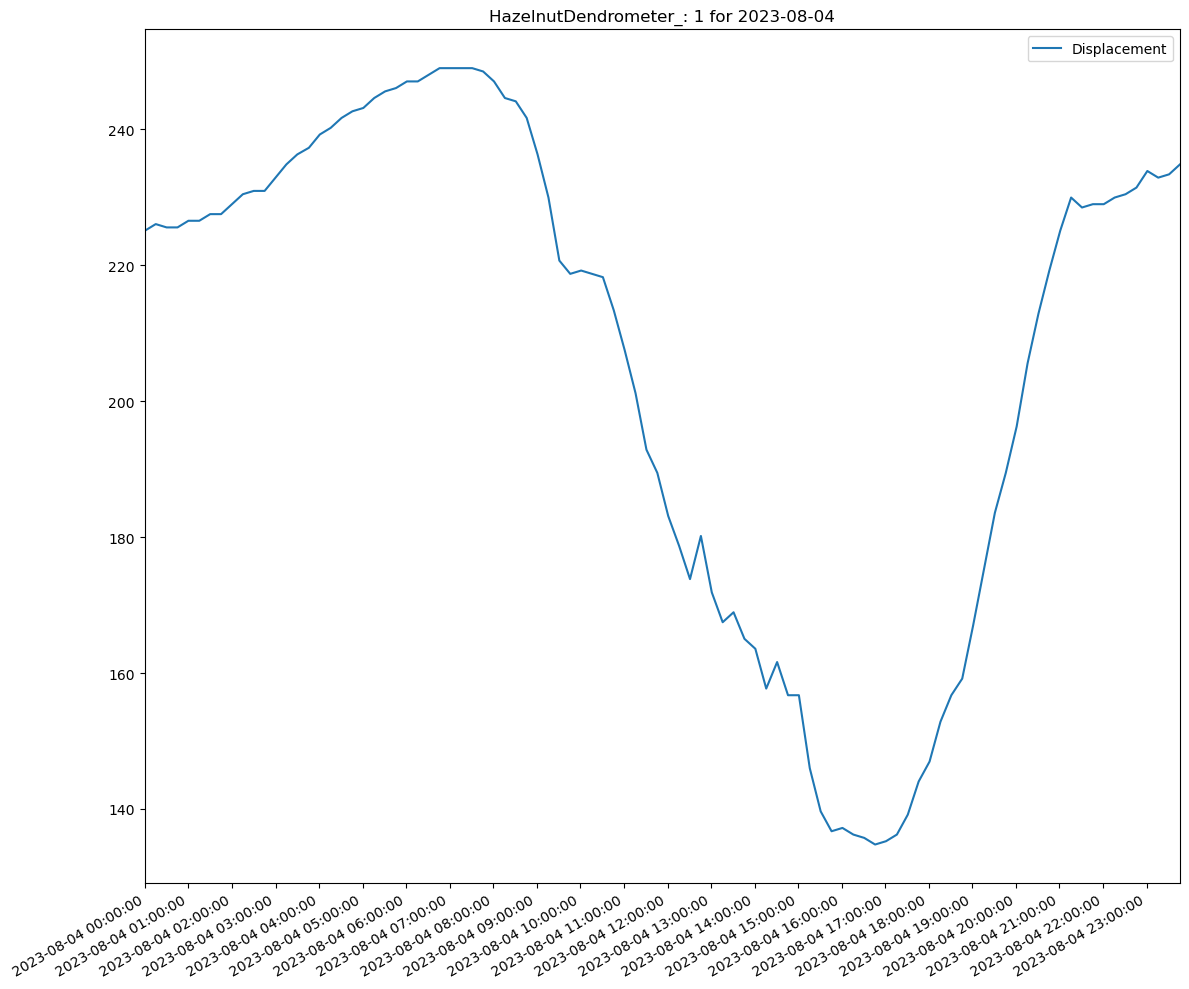

Maximum um: 249.0234375
Maximum um time: 2023-08-04 06:46:00
Minimum um: 134.765625
Minimum um time: 2023-08-04 16:46:00
Displacement: 114.2578125


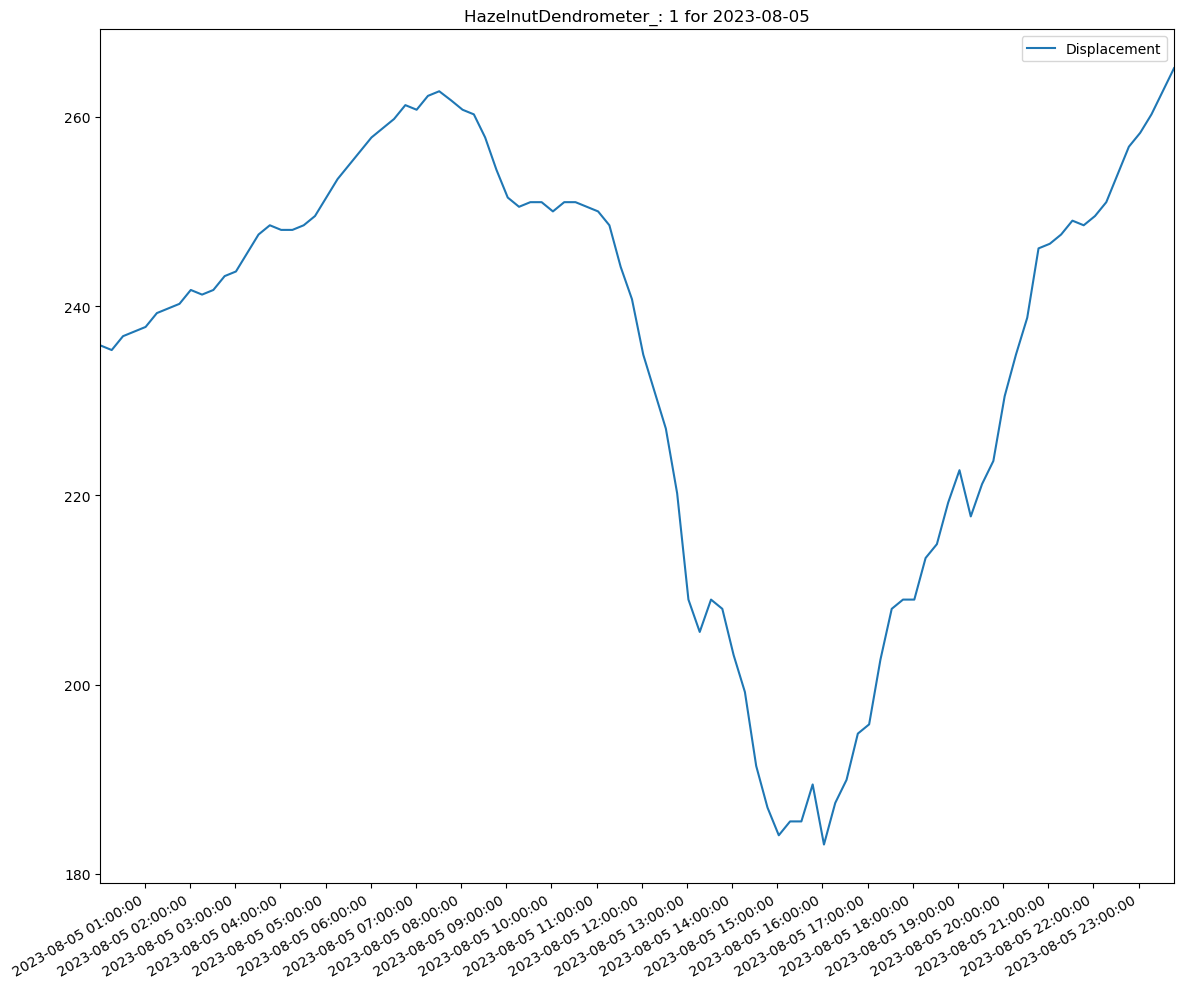

Maximum um: 265.1367188
Maximum um time: 2023-08-05 23:47:00
Minimum um: 183.1054688
Minimum um time: 2023-08-05 16:02:00
Displacement: 82.03124999999997


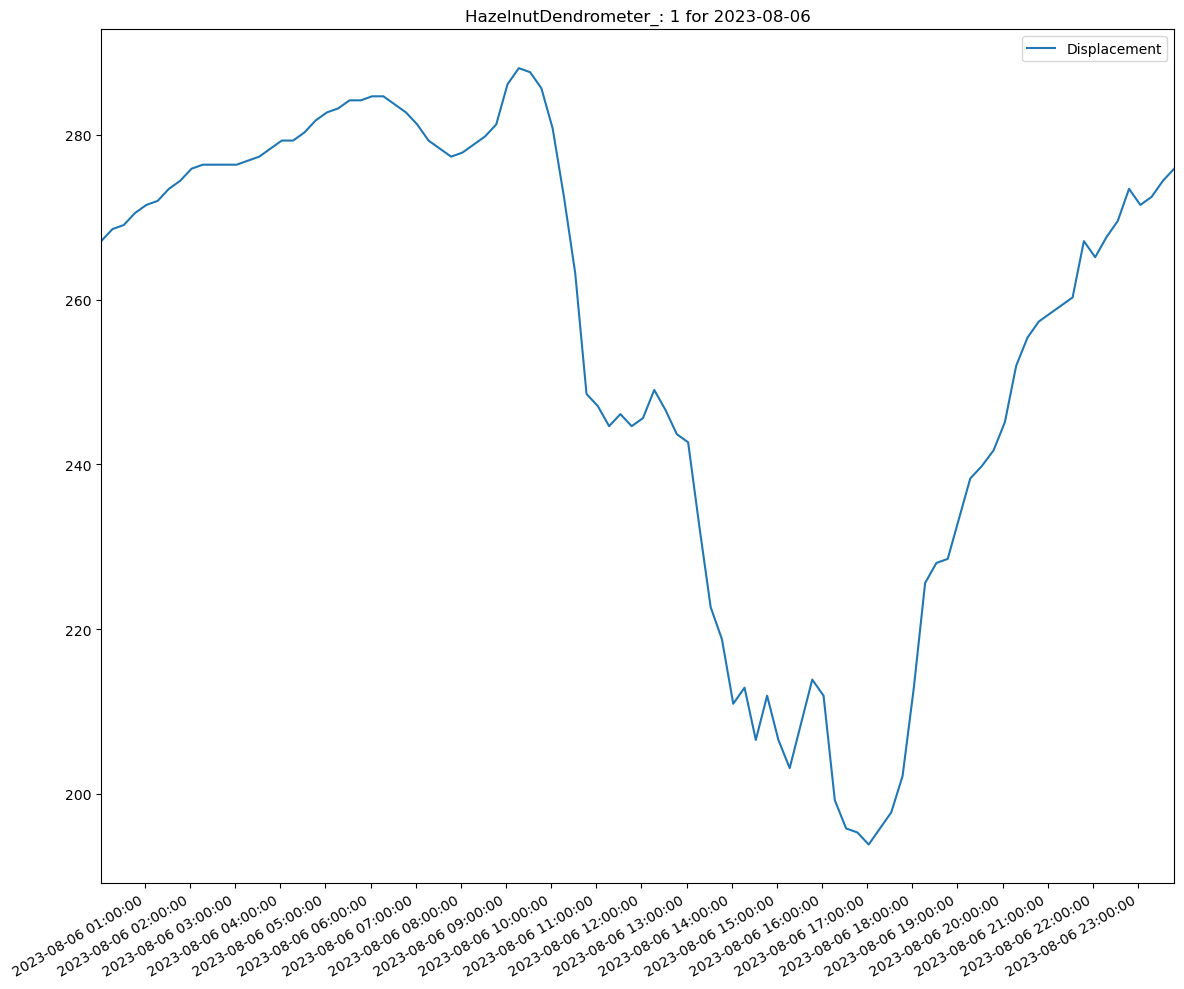

Maximum um: 288.0859375
Maximum um time: 2023-08-06 09:17:00
Minimum um: 193.8476563
Minimum um time: 2023-08-06 17:02:00
Displacement: 94.23828119999999


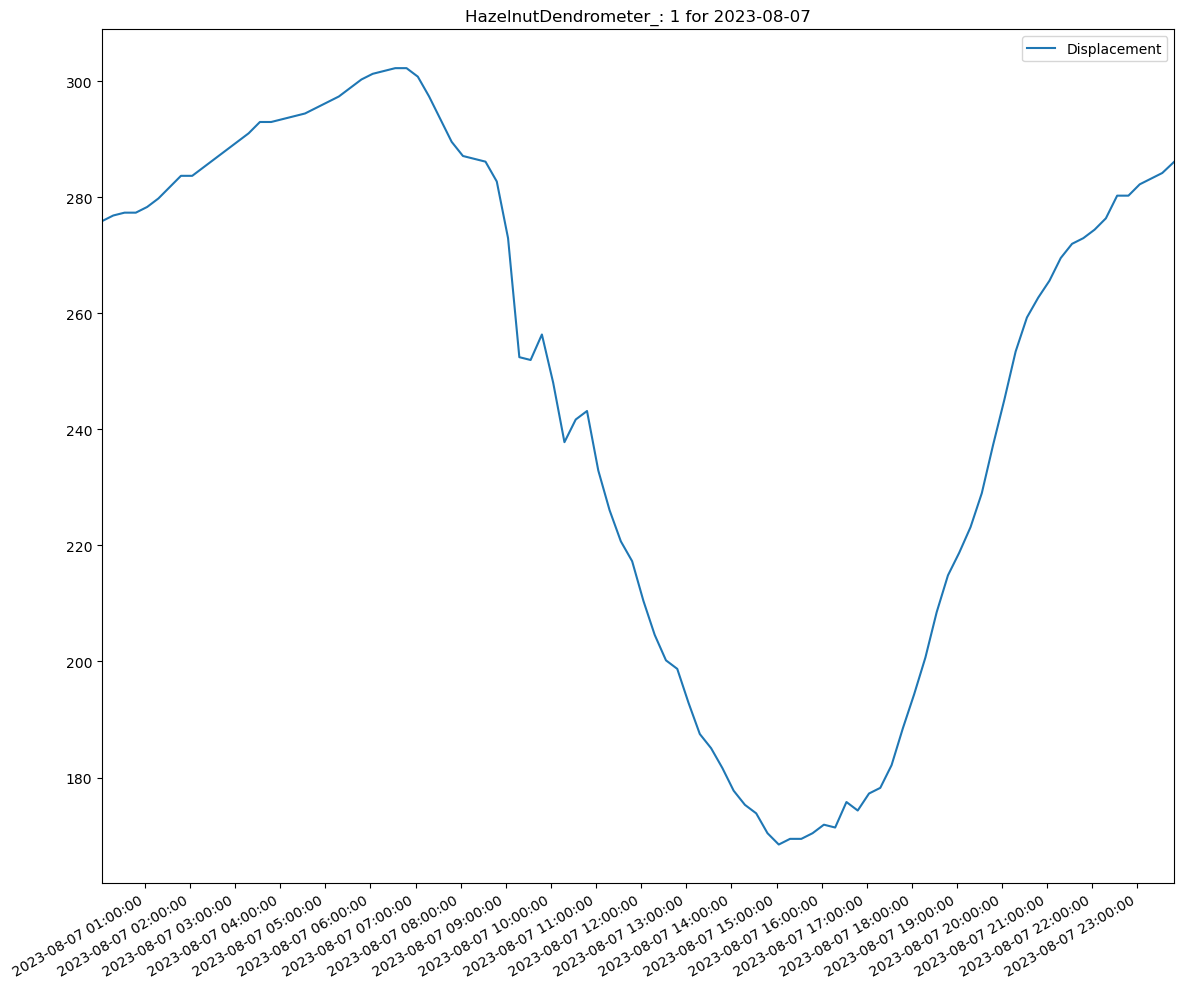

Maximum um: 302.2460938
Maximum um time: 2023-08-07 06:33:00
Minimum um: 168.4570313
Minimum um time: 2023-08-07 15:03:00
Displacement: 133.78906249999997


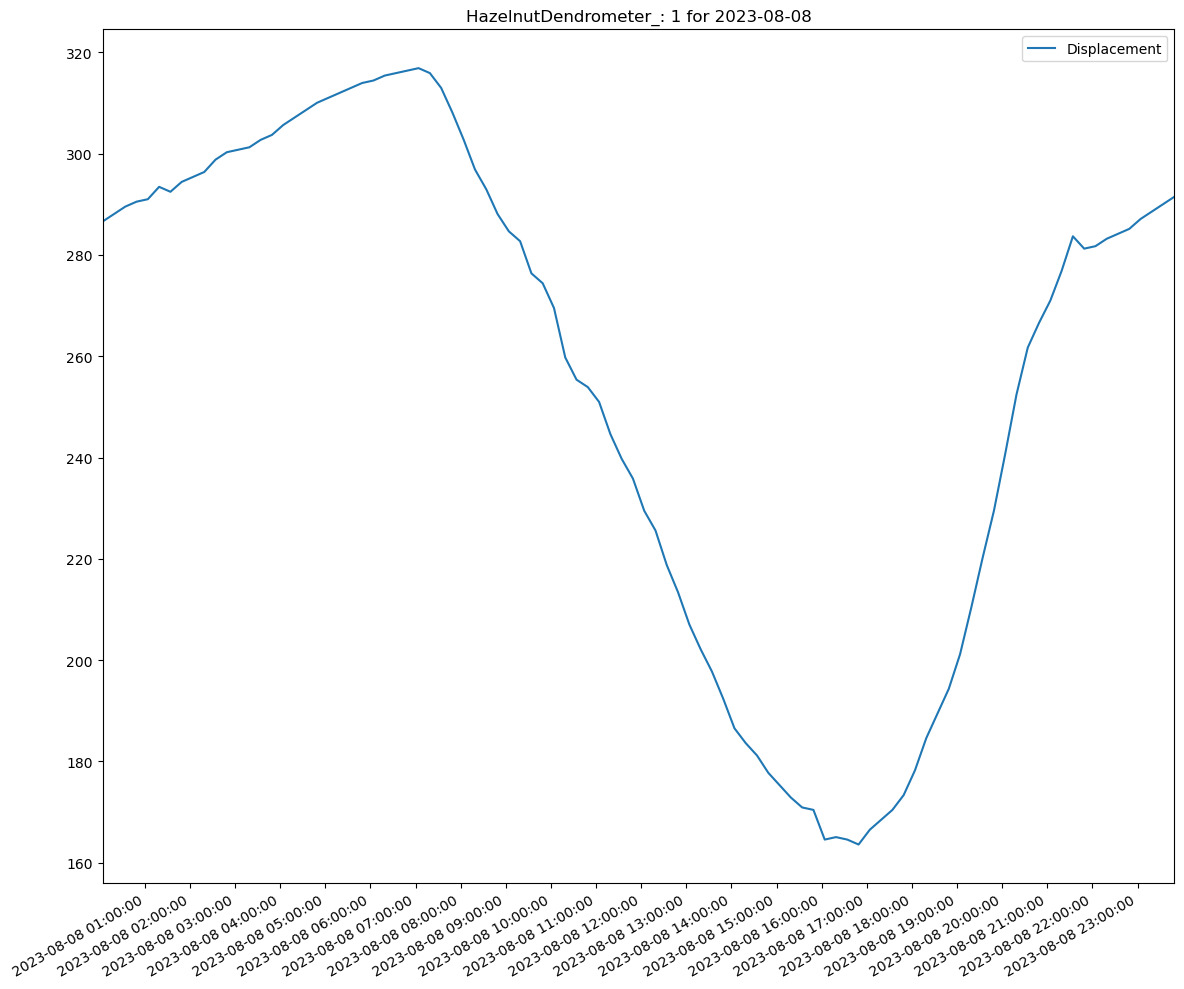

Maximum um: 316.8945313
Maximum um time: 2023-08-08 07:04:00
Minimum um: 163.5742188
Minimum um time: 2023-08-08 16:49:00
Displacement: 153.32031249999997


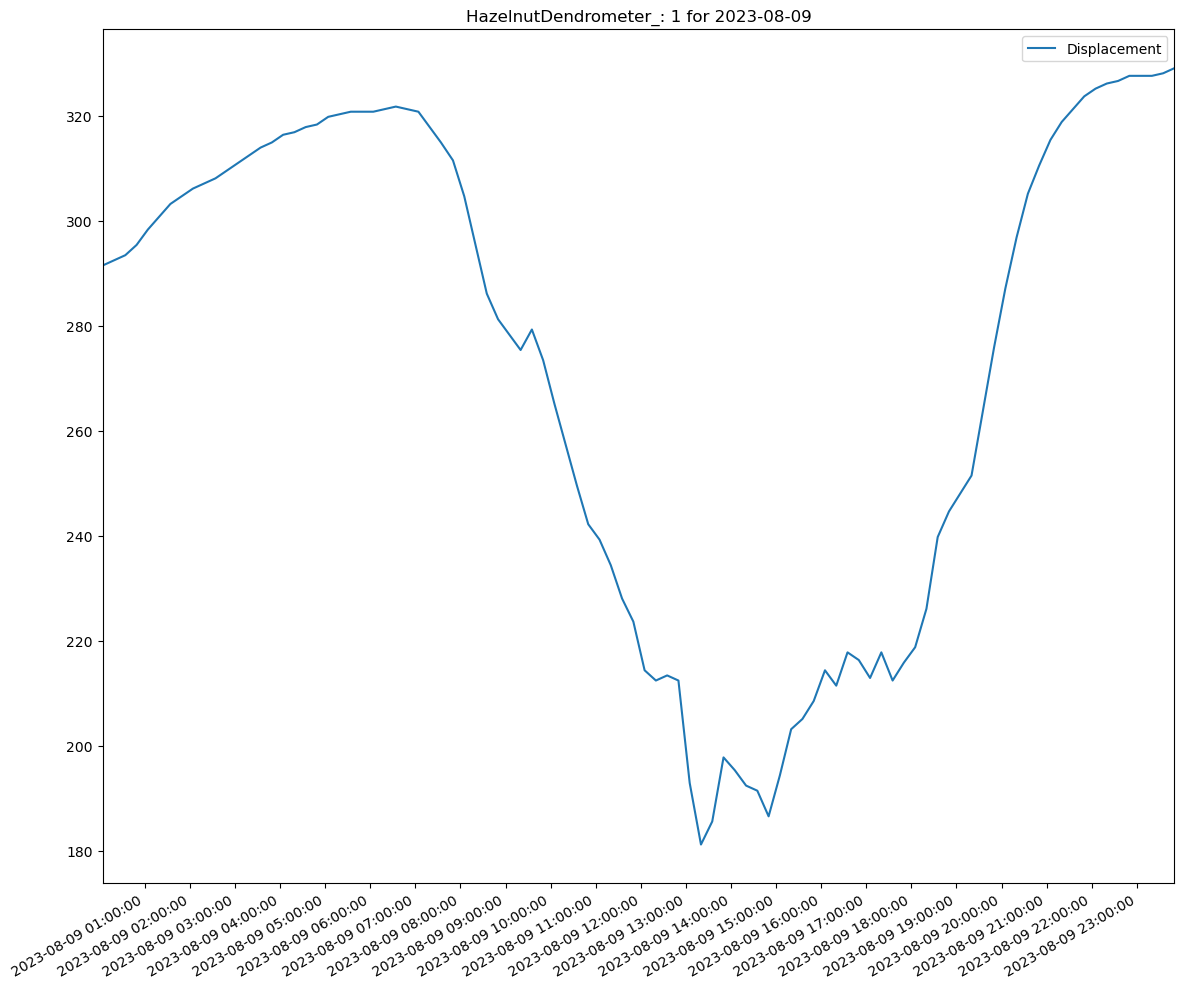

Maximum um: 329.1015625
Maximum um time: 2023-08-09 23:50:00
Minimum um: 181.1523438
Minimum um time: 2023-08-09 13:20:00
Displacement: 147.9492187


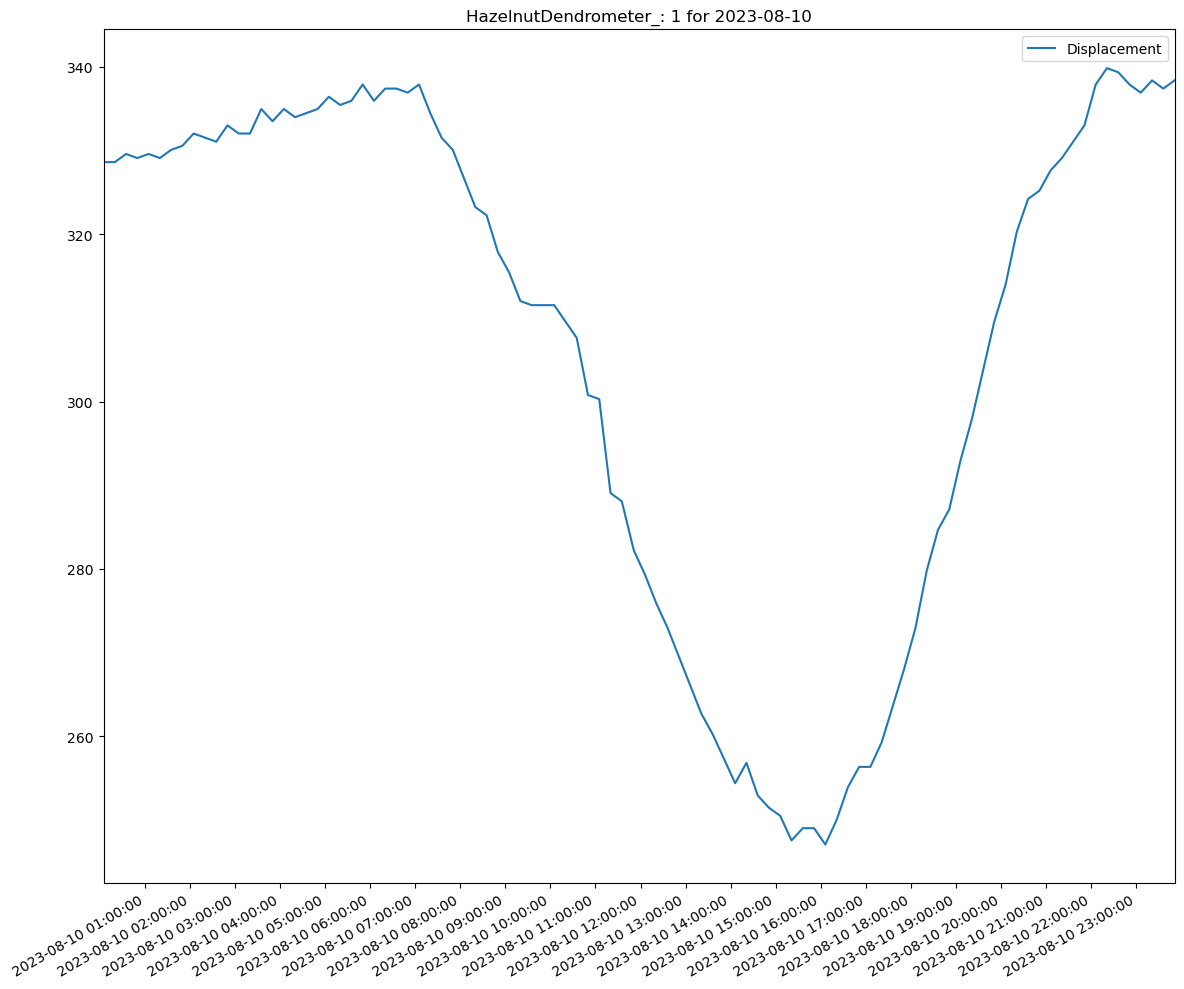

Maximum um: 339.84375
Maximum um time: 2023-08-10 22:21:00
Minimum um: 247.0703125
Minimum um time: 2023-08-10 16:06:00
Displacement: 92.7734375


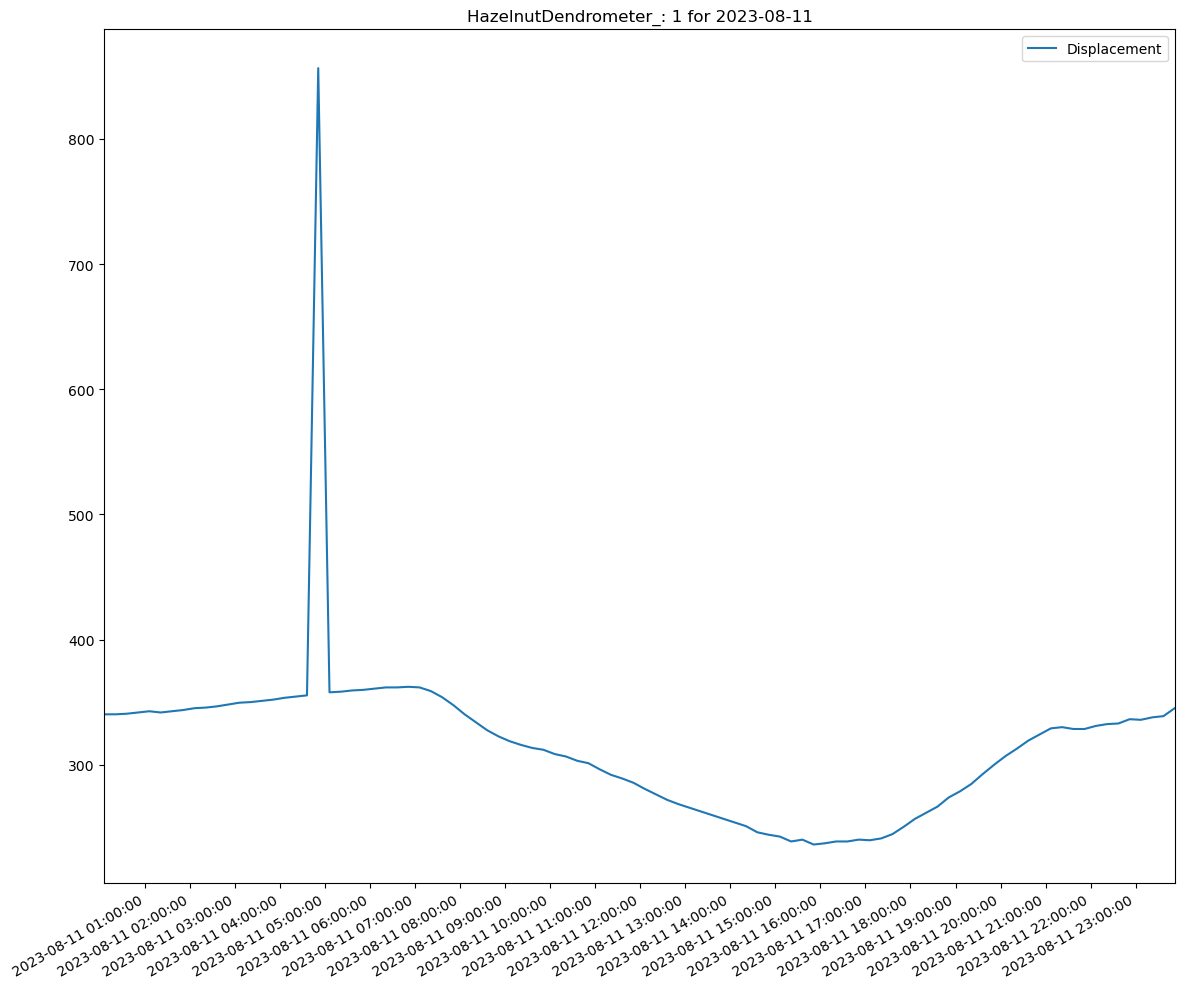

Maximum um: 856.4453125
Maximum um time: 2023-08-11 04:51:00
Minimum um: 236.328125
Minimum um time: 2023-08-11 15:51:00
Displacement: 620.1171875


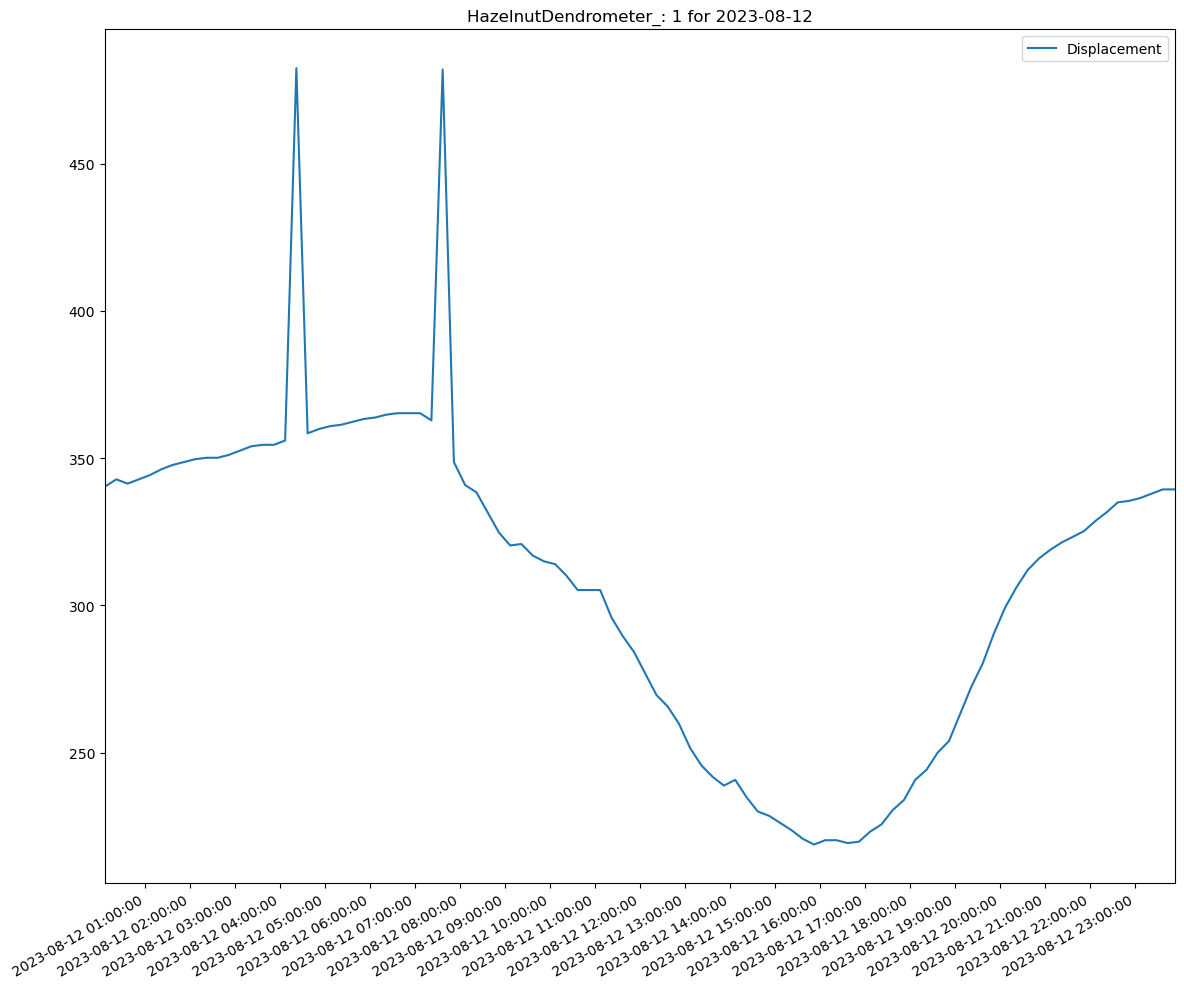

Maximum um: 482.421875
Maximum um time: 2023-08-12 04:22:00
Minimum um: 218.75
Minimum um time: 2023-08-12 15:52:00
Displacement: 263.671875


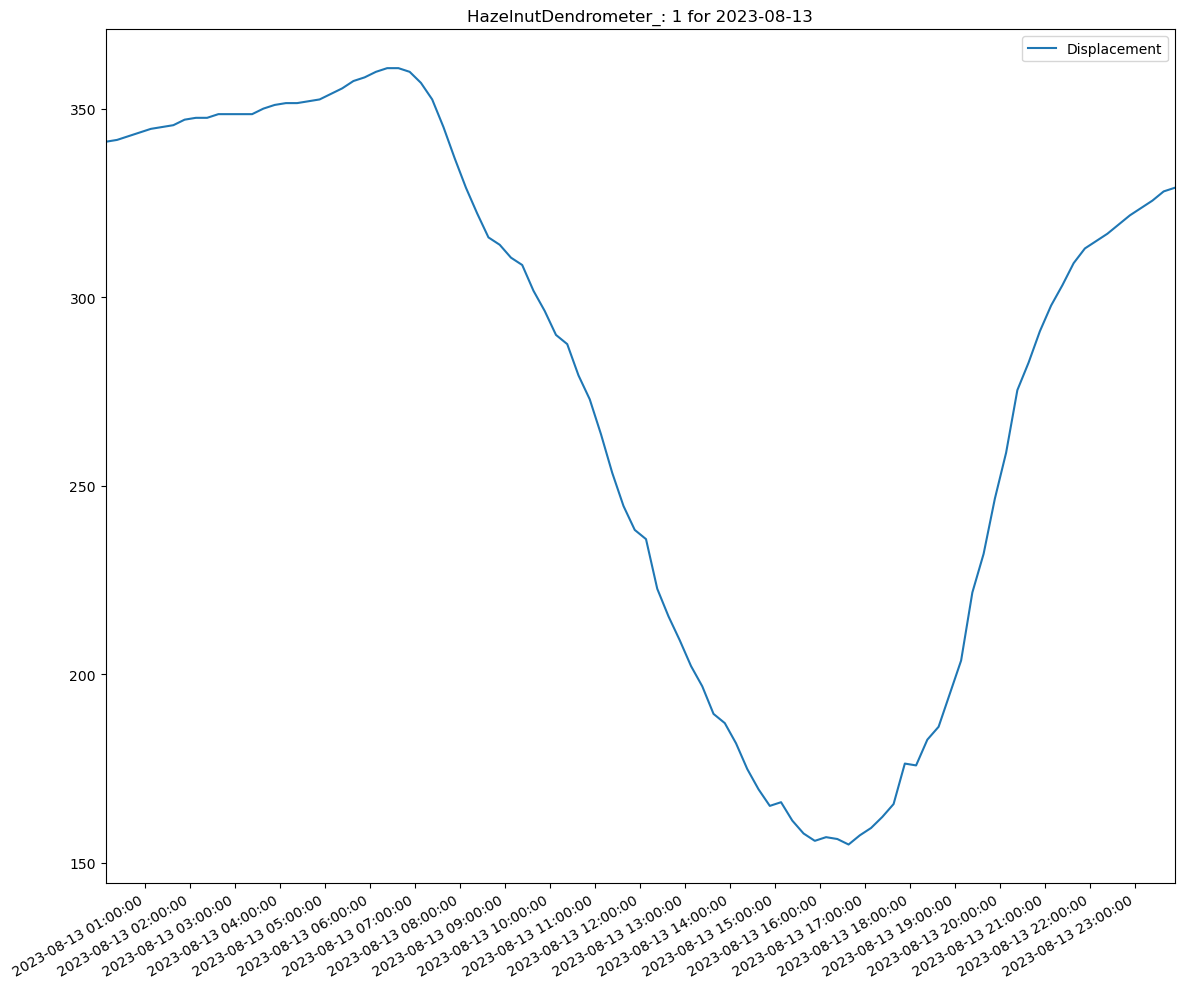

Maximum um: 360.8398438
Maximum um time: 2023-08-13 06:23:00
Minimum um: 154.7851563
Minimum um time: 2023-08-13 16:38:00
Displacement: 206.05468749999997


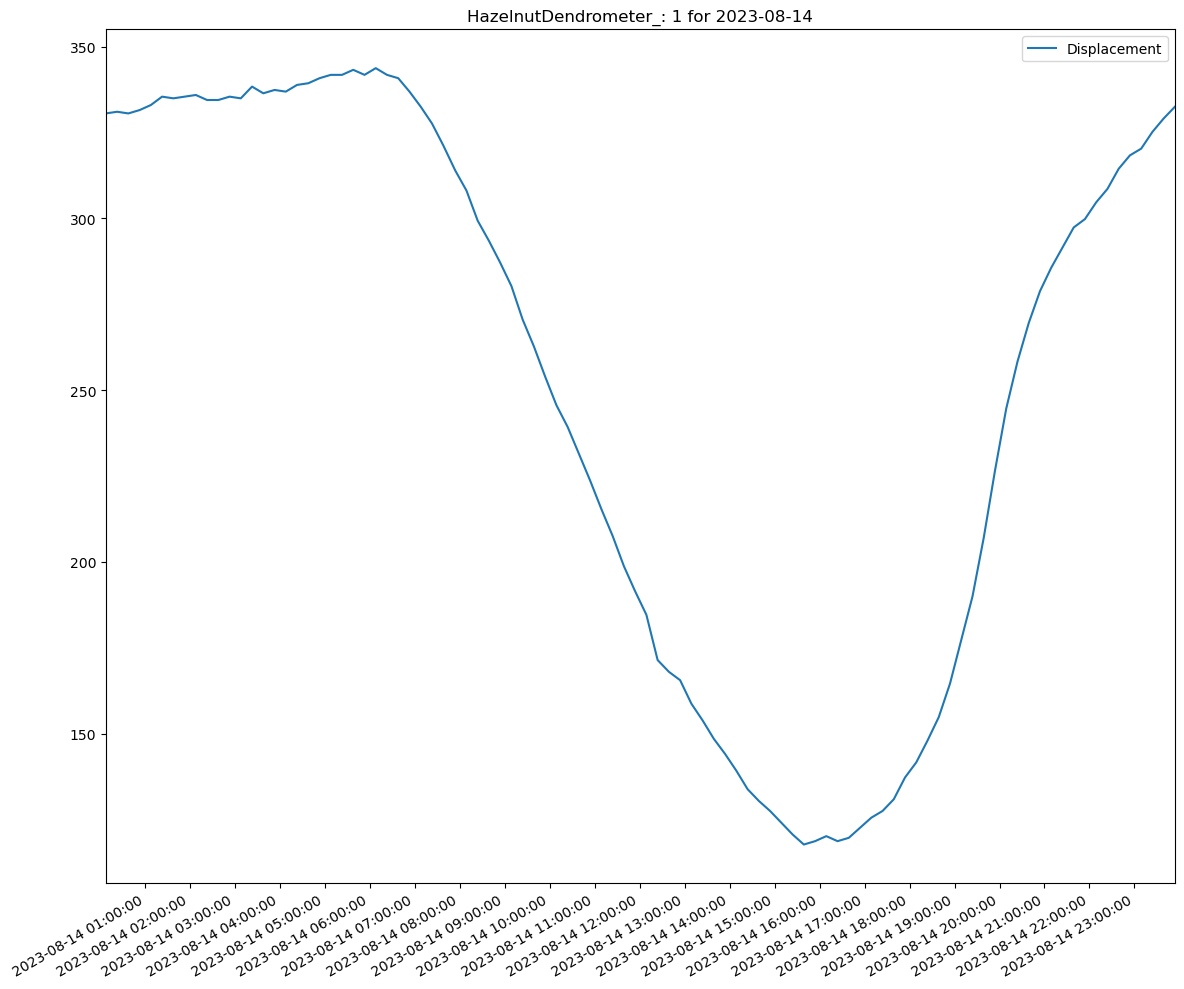

Maximum um: 343.75
Maximum um time: 2023-08-14 06:08:00
Minimum um: 117.6757813
Minimum um time: 2023-08-14 15:39:00
Displacement: 226.07421870000002


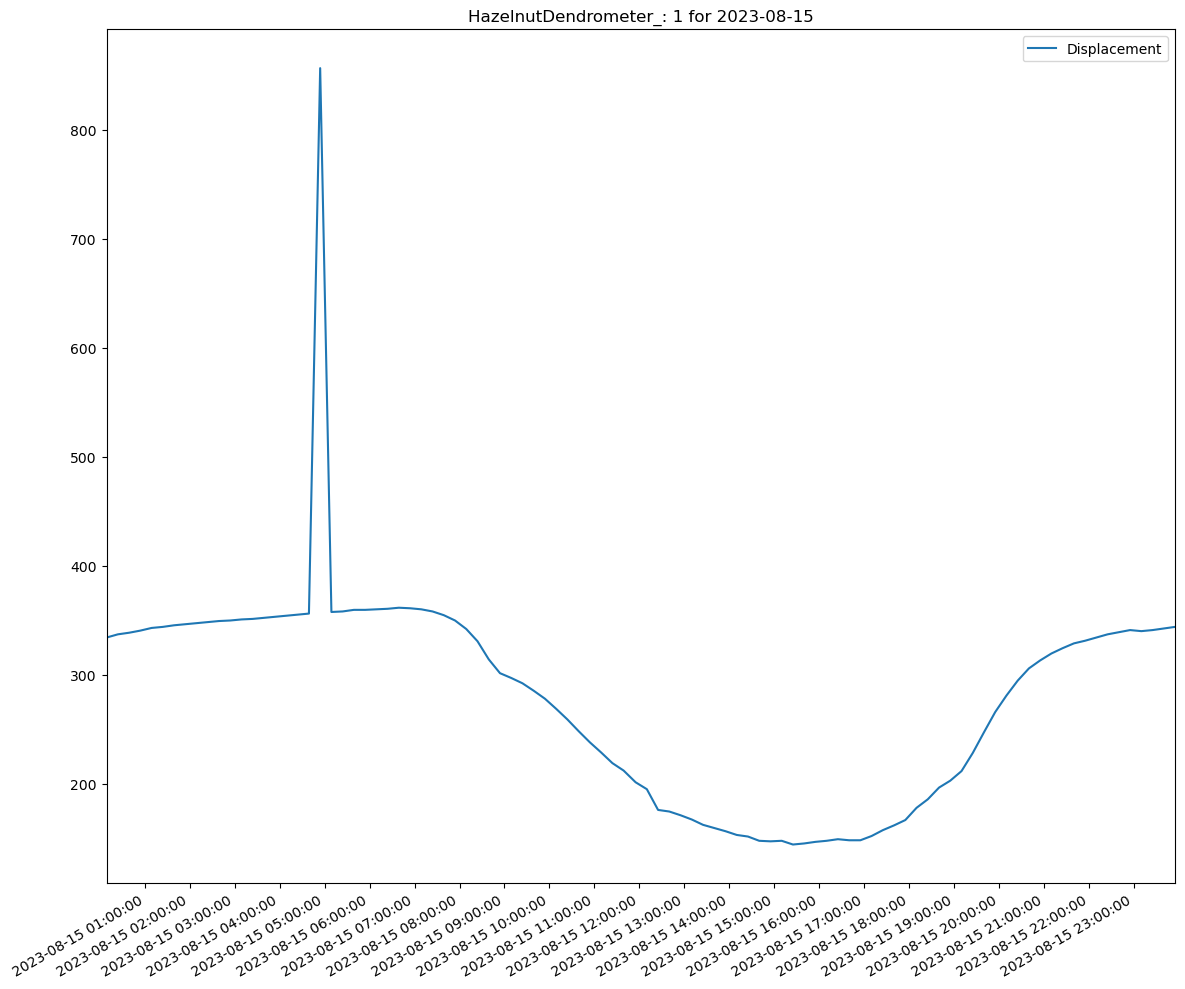

Maximum um: 856.4453125
Maximum um time: 2023-08-15 04:54:00
Minimum um: 144.0429688
Minimum um time: 2023-08-15 15:25:00
Displacement: 712.4023437


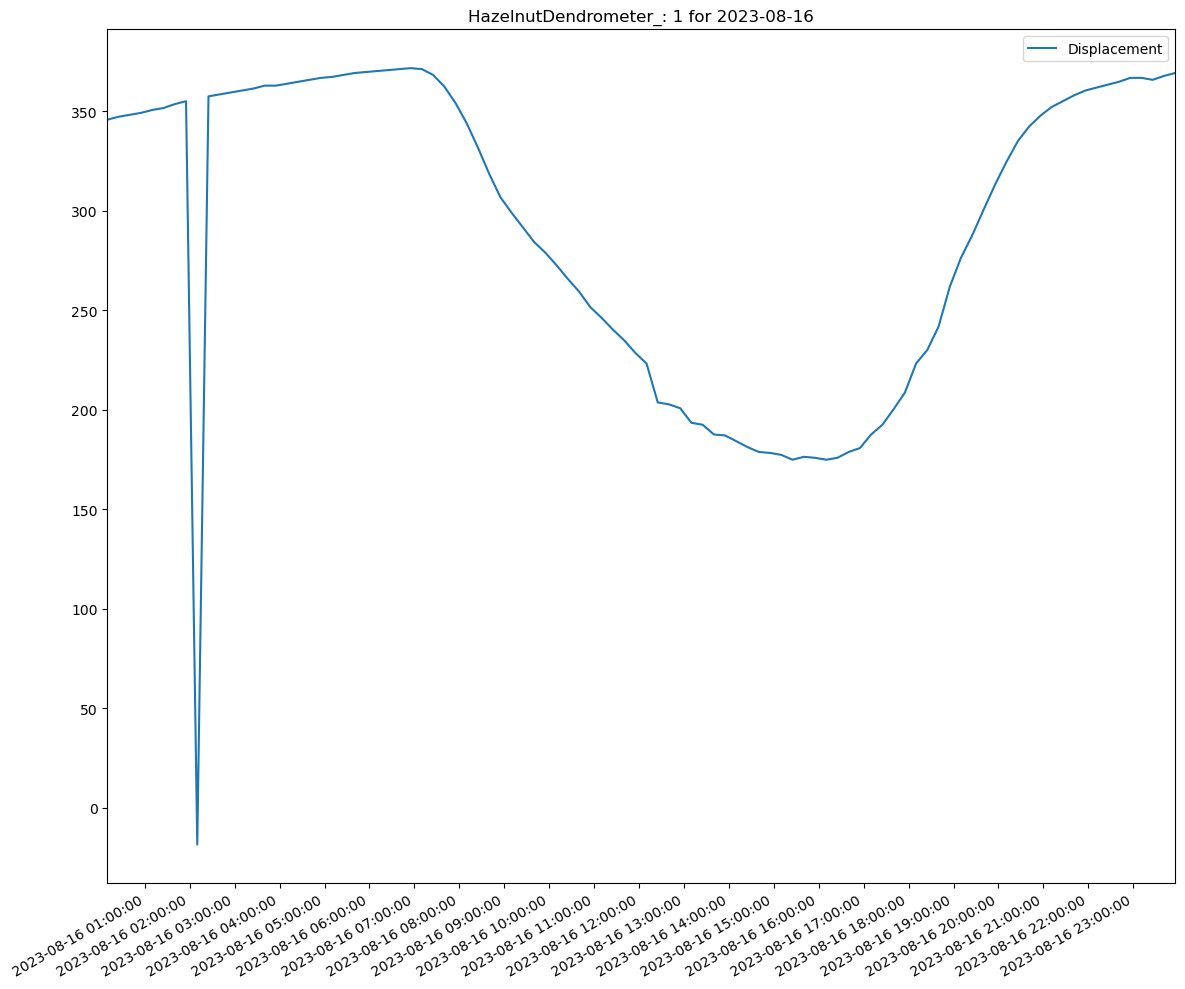

Maximum um: 371.5820313
Maximum um time: 2023-08-16 06:55:00
Minimum um: -18.5546875
Minimum um time: 2023-08-16 02:10:00
Displacement: 390.1367188


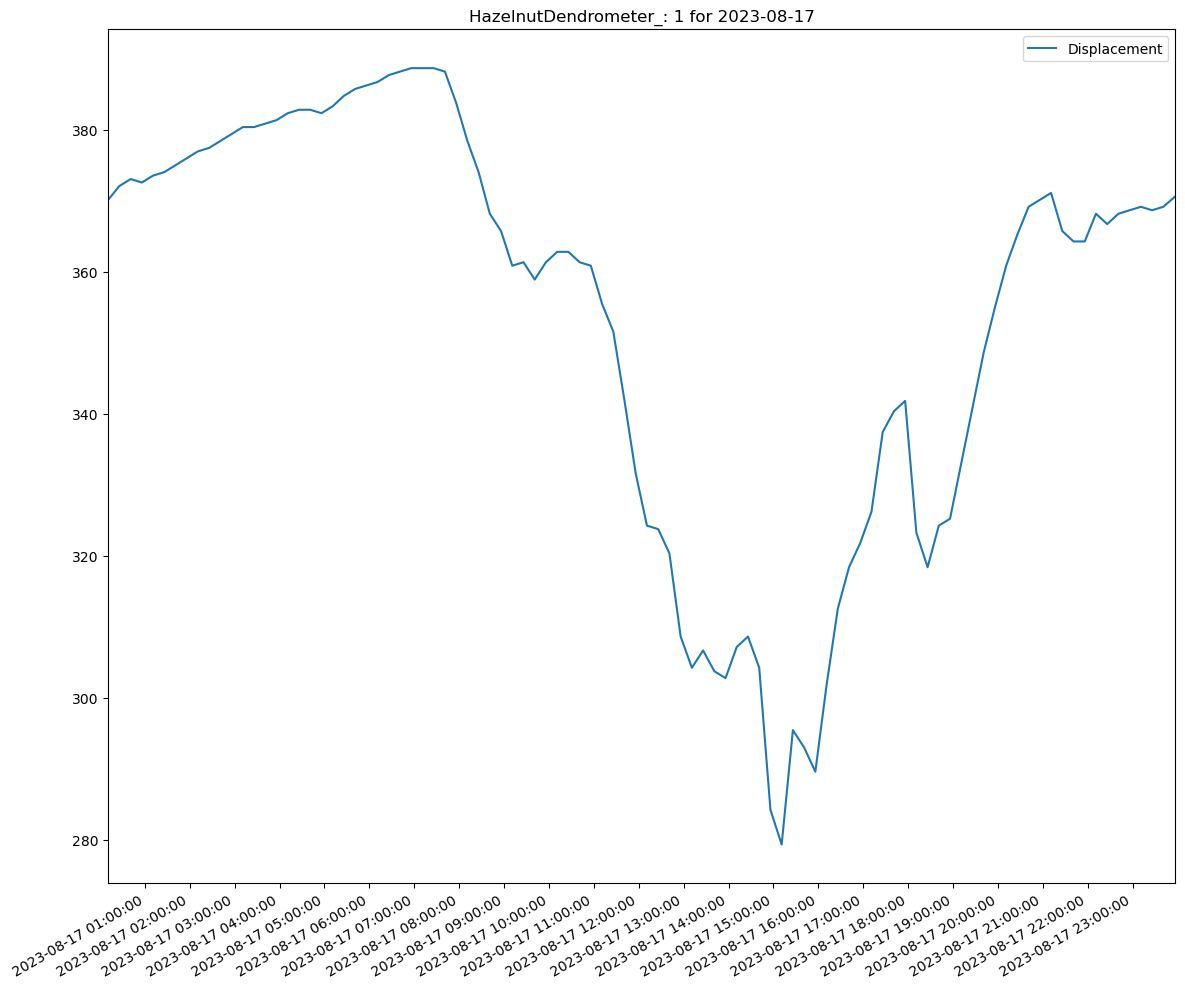

Maximum um: 388.671875
Maximum um time: 2023-08-17 06:56:00
Minimum um: 279.296875
Minimum um time: 2023-08-17 15:11:00
Displacement: 109.375


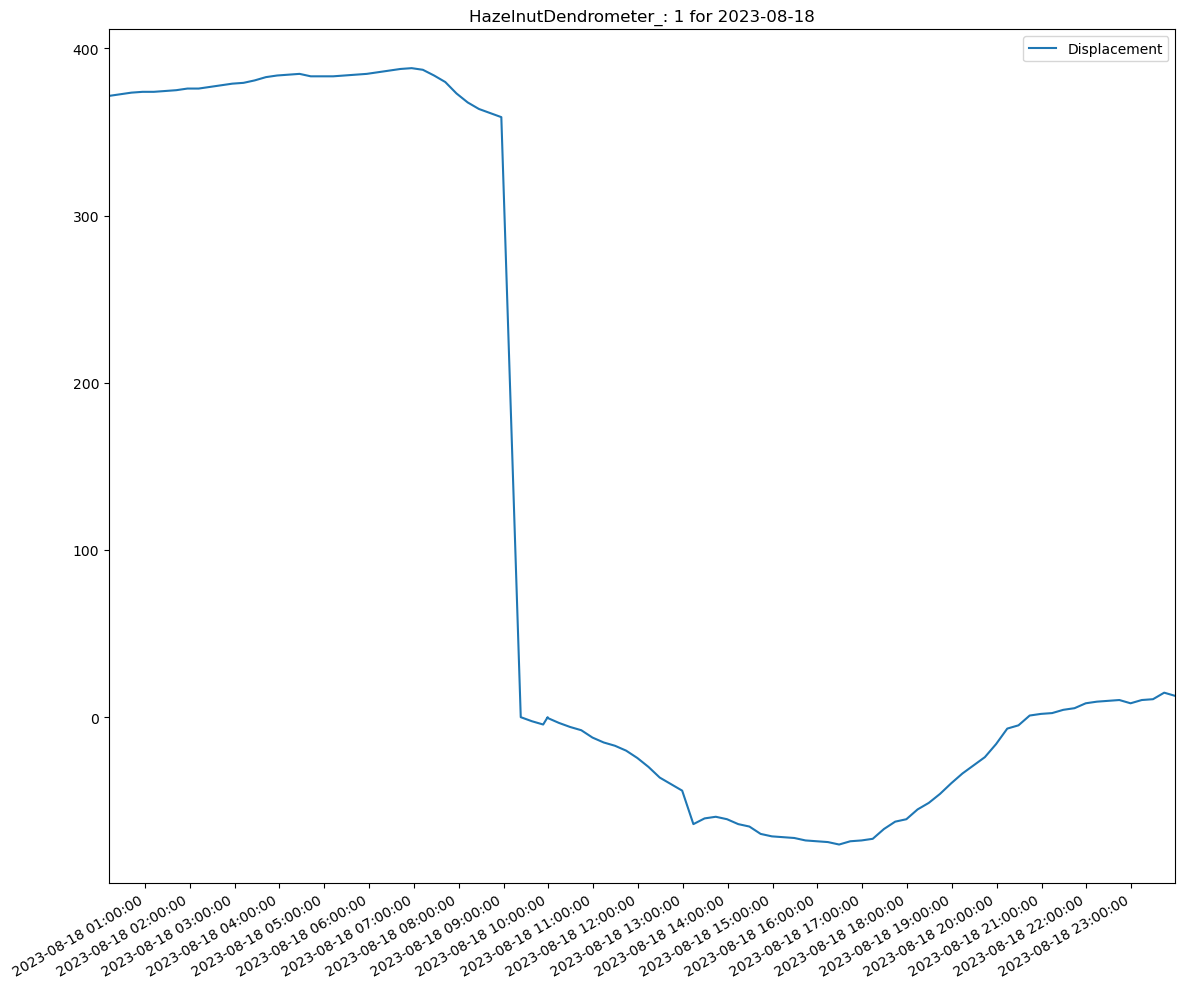

Maximum um: 388.1835938
Maximum um time: 2023-08-18 06:57:00
Minimum um: -76.171875
Minimum um time: 2023-08-18 16:29:00
Displacement: 464.3554688


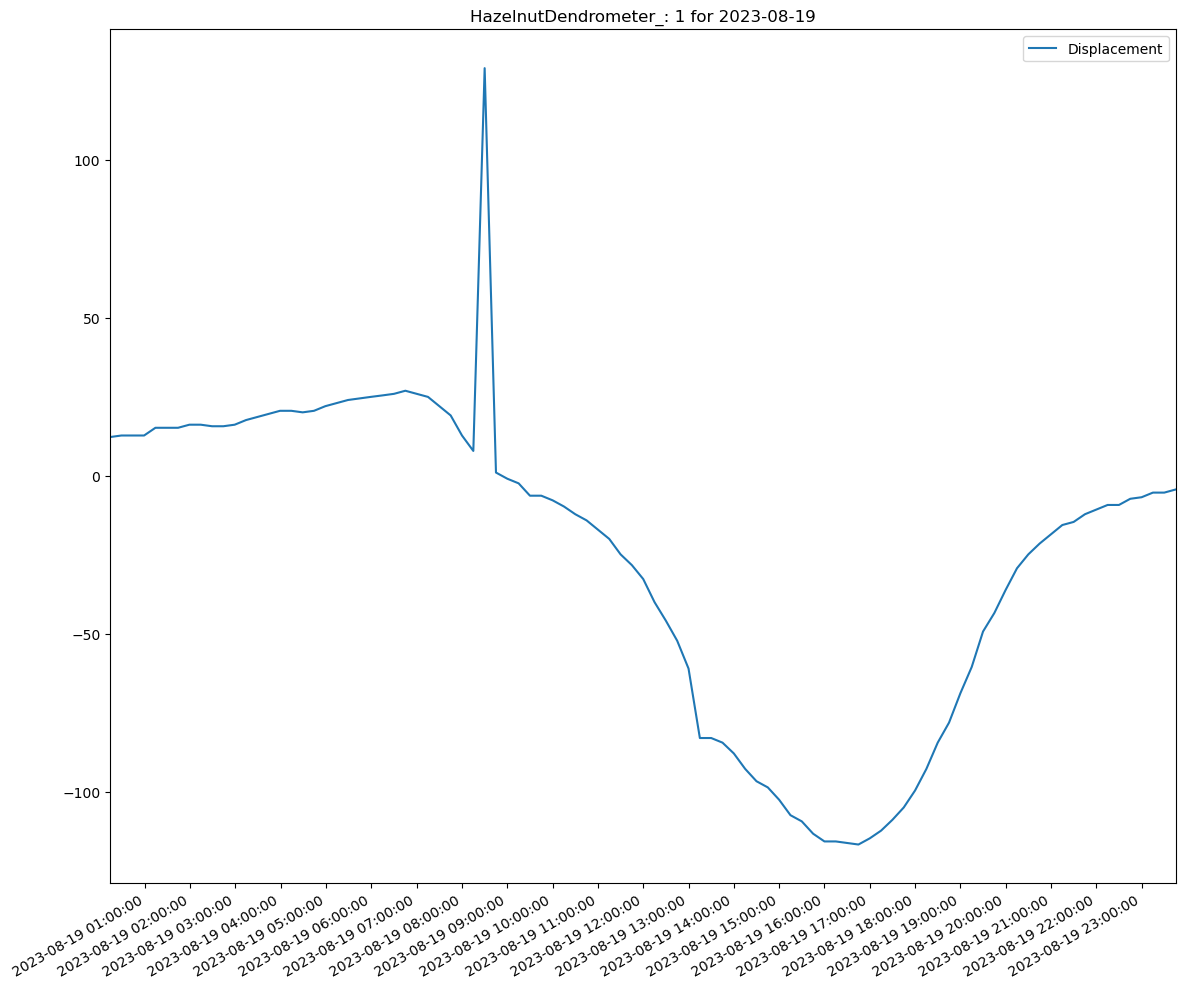

Maximum um: 128.90625
Maximum um time: 2023-08-19 08:30:00
Minimum um: -116.6992188
Minimum um time: 2023-08-19 16:45:00
Displacement: 245.60546879999998


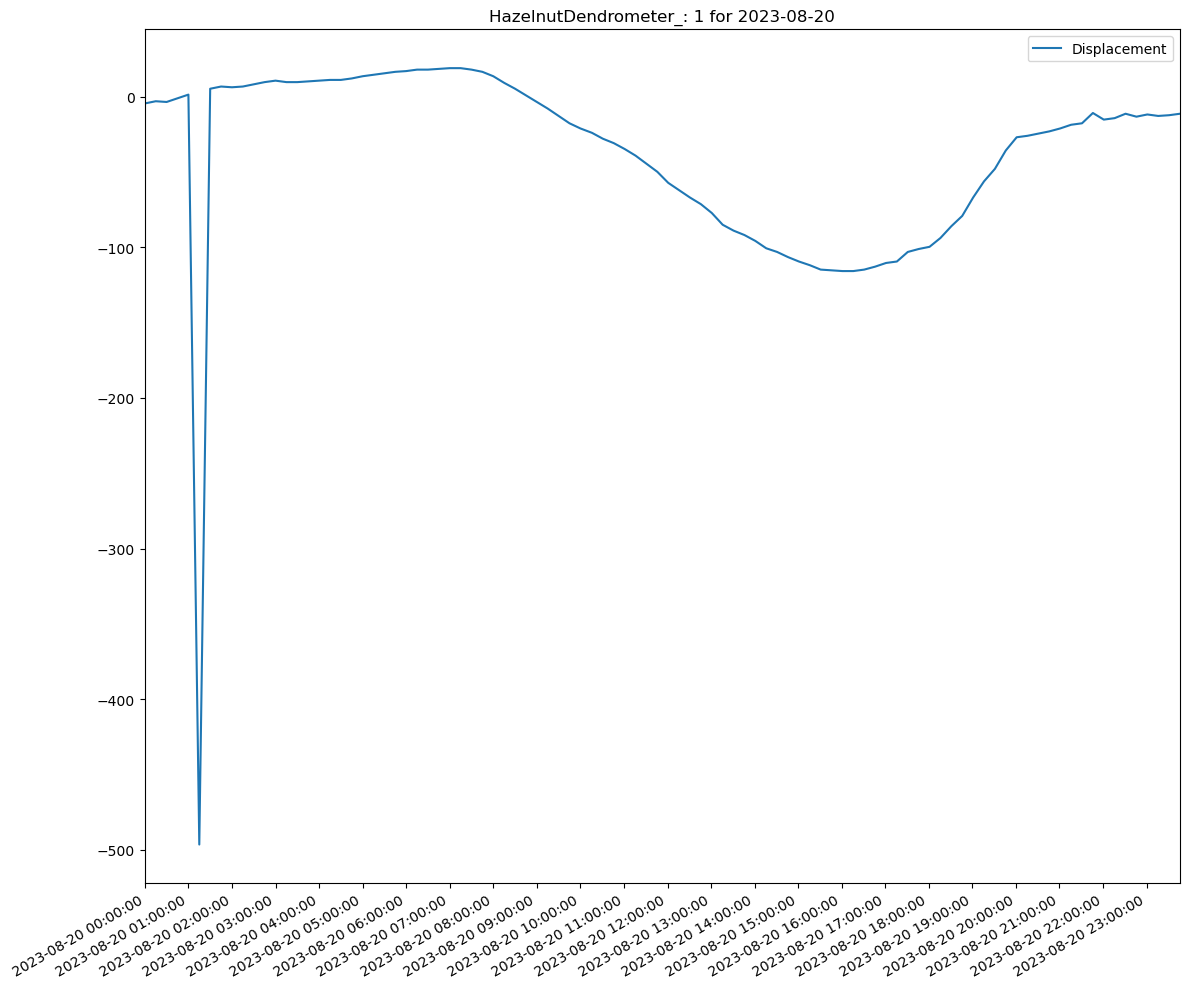

Maximum um: 19.04296875
Maximum um time: 2023-08-20 07:00:00
Minimum um: -496.5820313
Minimum um time: 2023-08-20 01:15:00
Displacement: 515.6250000499999


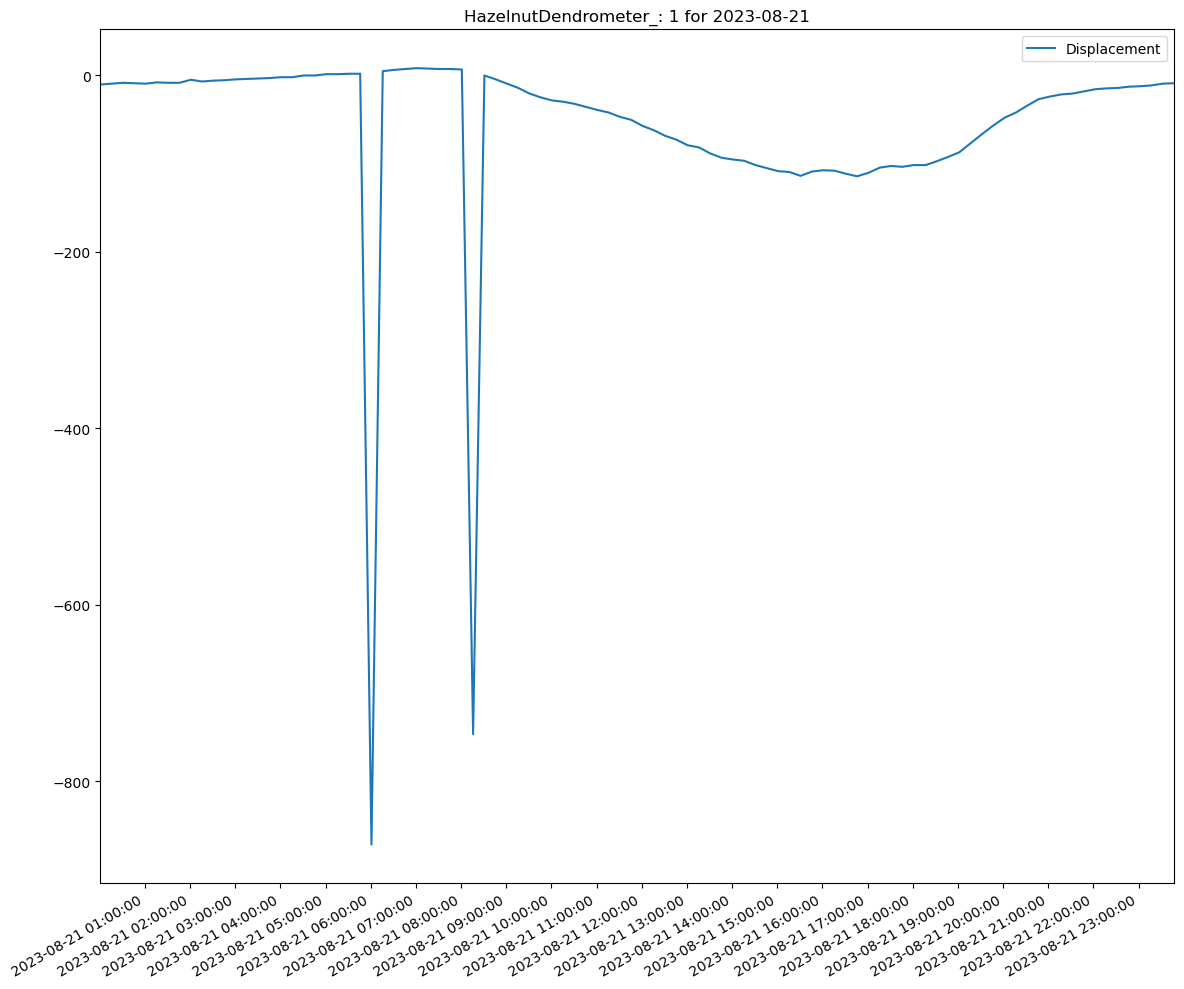

Maximum um: 8.30078125
Maximum um time: 2023-08-21 07:01:00
Minimum um: -871.5820313
Minimum um time: 2023-08-21 06:01:00
Displacement: 879.88281255


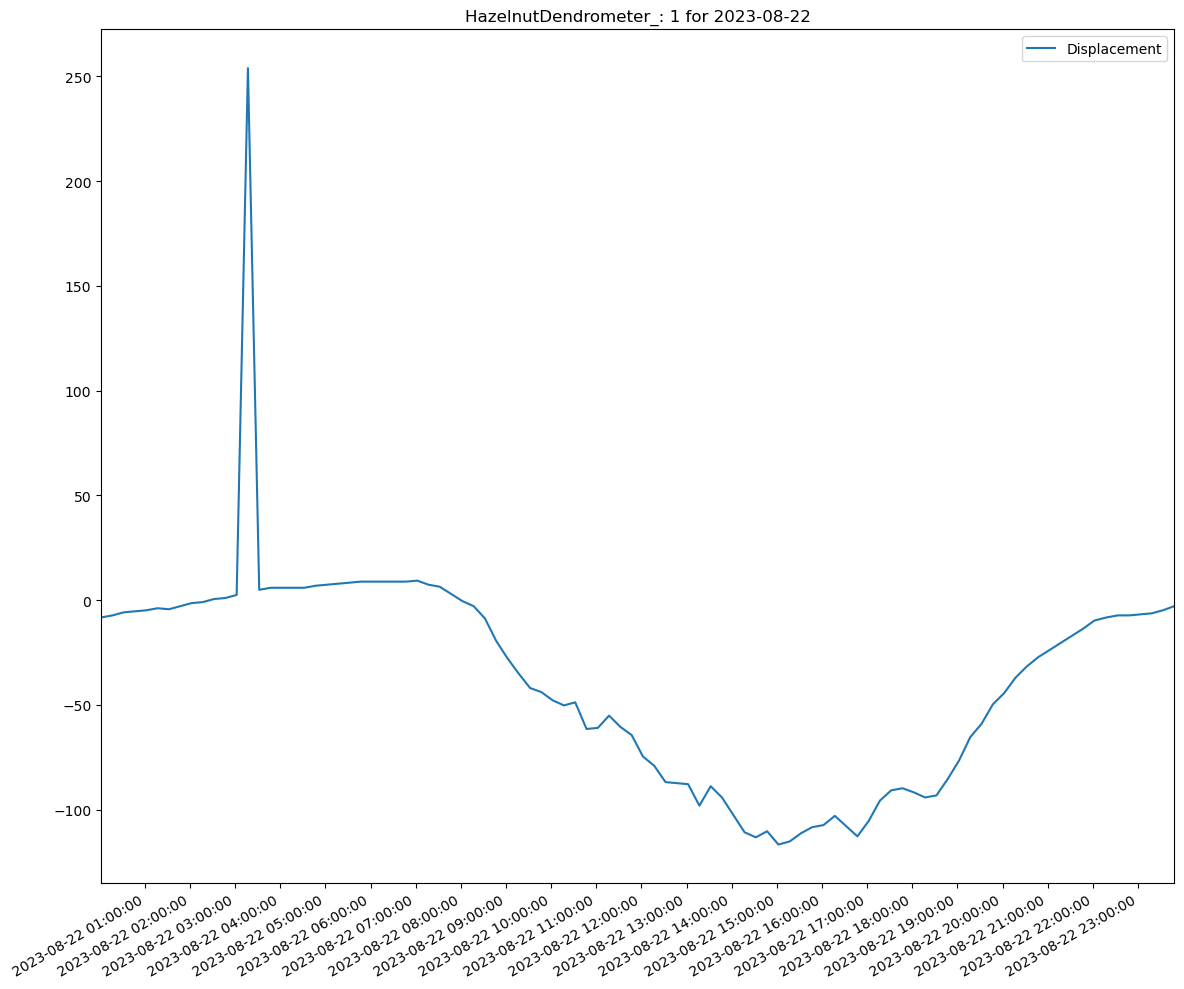

Maximum um: 253.90625
Maximum um time: 2023-08-22 03:17:00
Minimum um: -116.6992188
Minimum um time: 2023-08-22 15:02:00
Displacement: 370.6054688


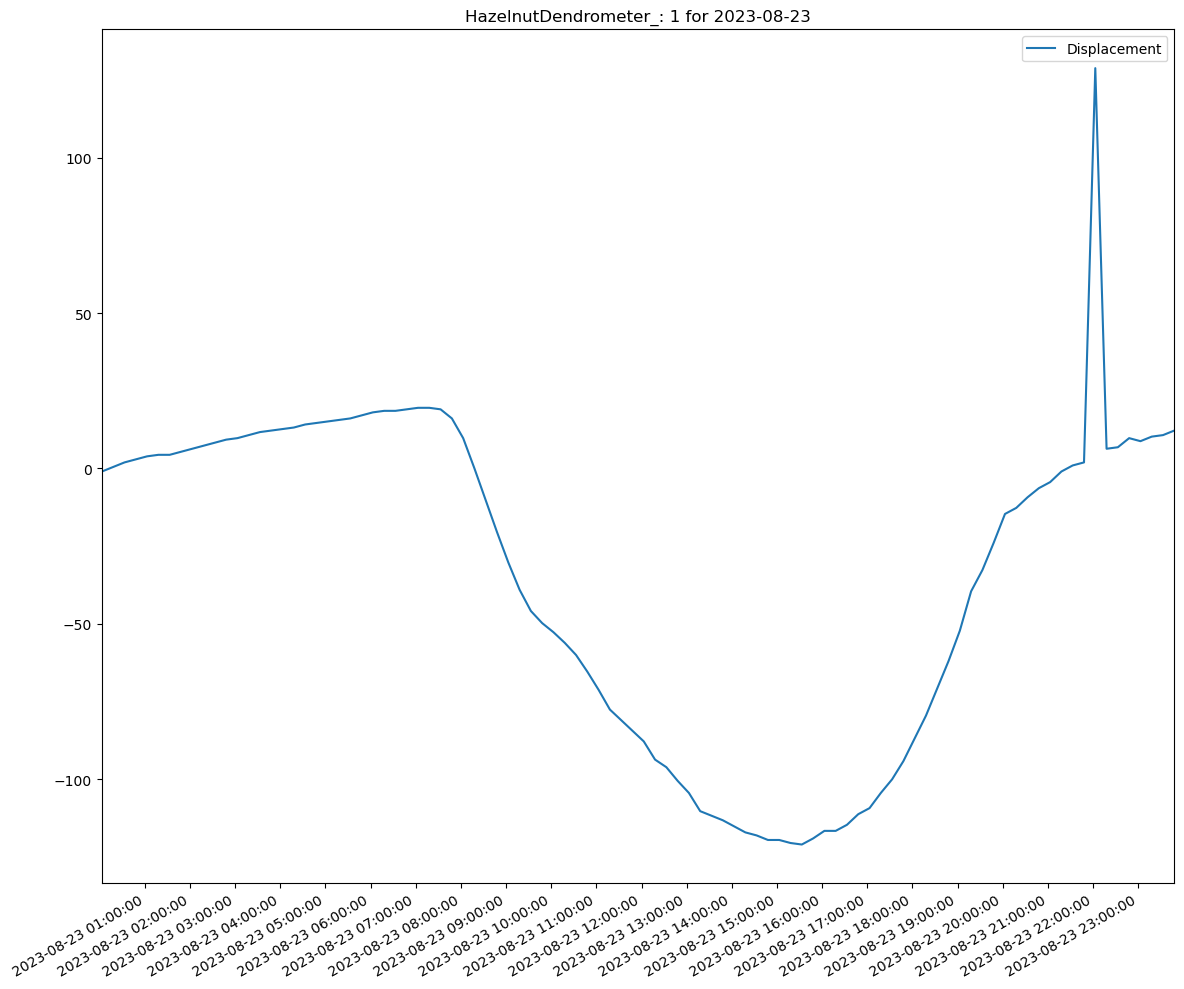

Maximum um: 128.90625
Maximum um time: 2023-08-23 22:03:00
Minimum um: -121.09375
Minimum um time: 2023-08-23 15:33:00
Displacement: 250.0


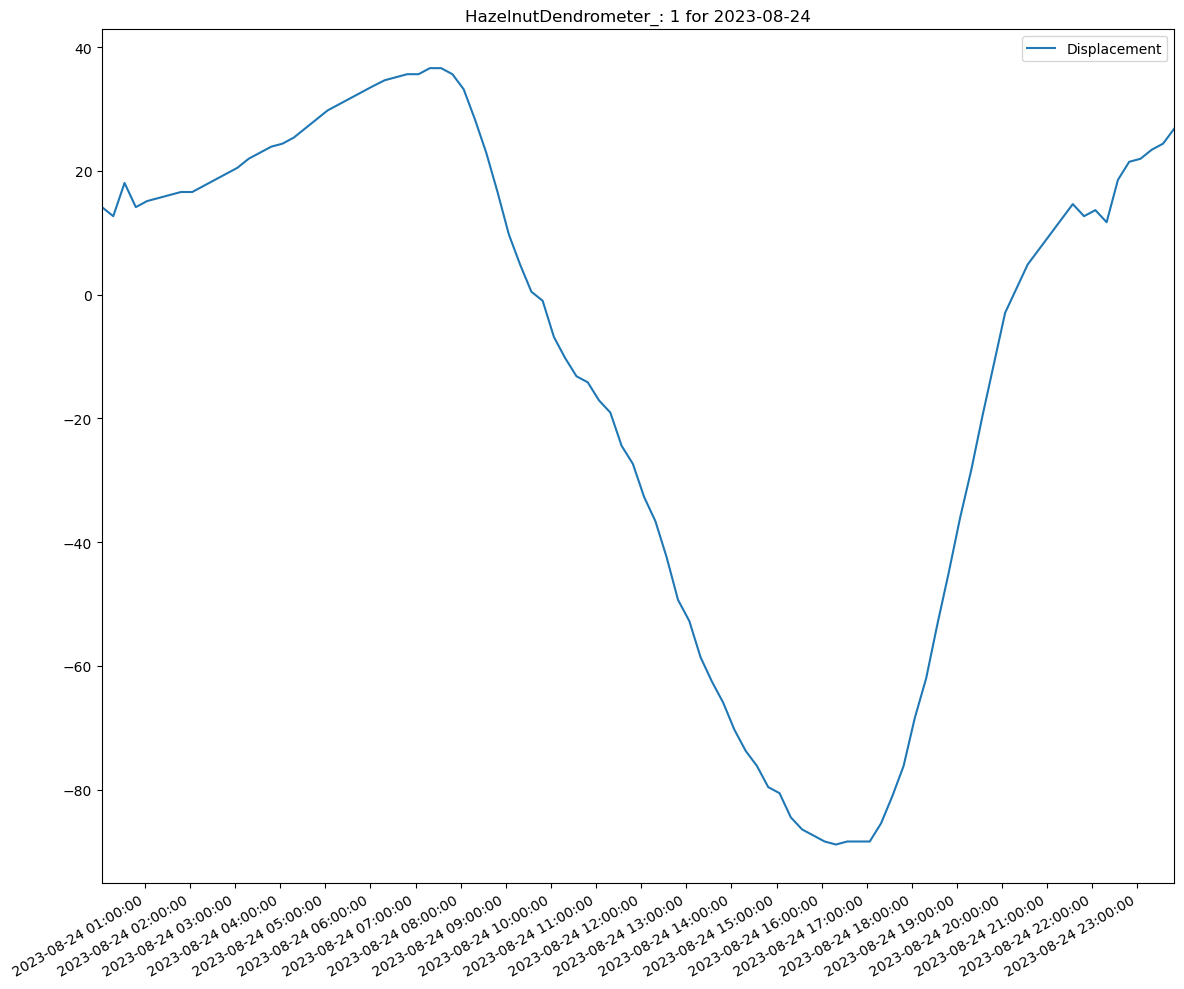

Maximum um: 36.62109375
Maximum um time: 2023-08-24 07:19:00
Minimum um: -88.8671875
Minimum um time: 2023-08-24 16:19:00
Displacement: 125.48828125


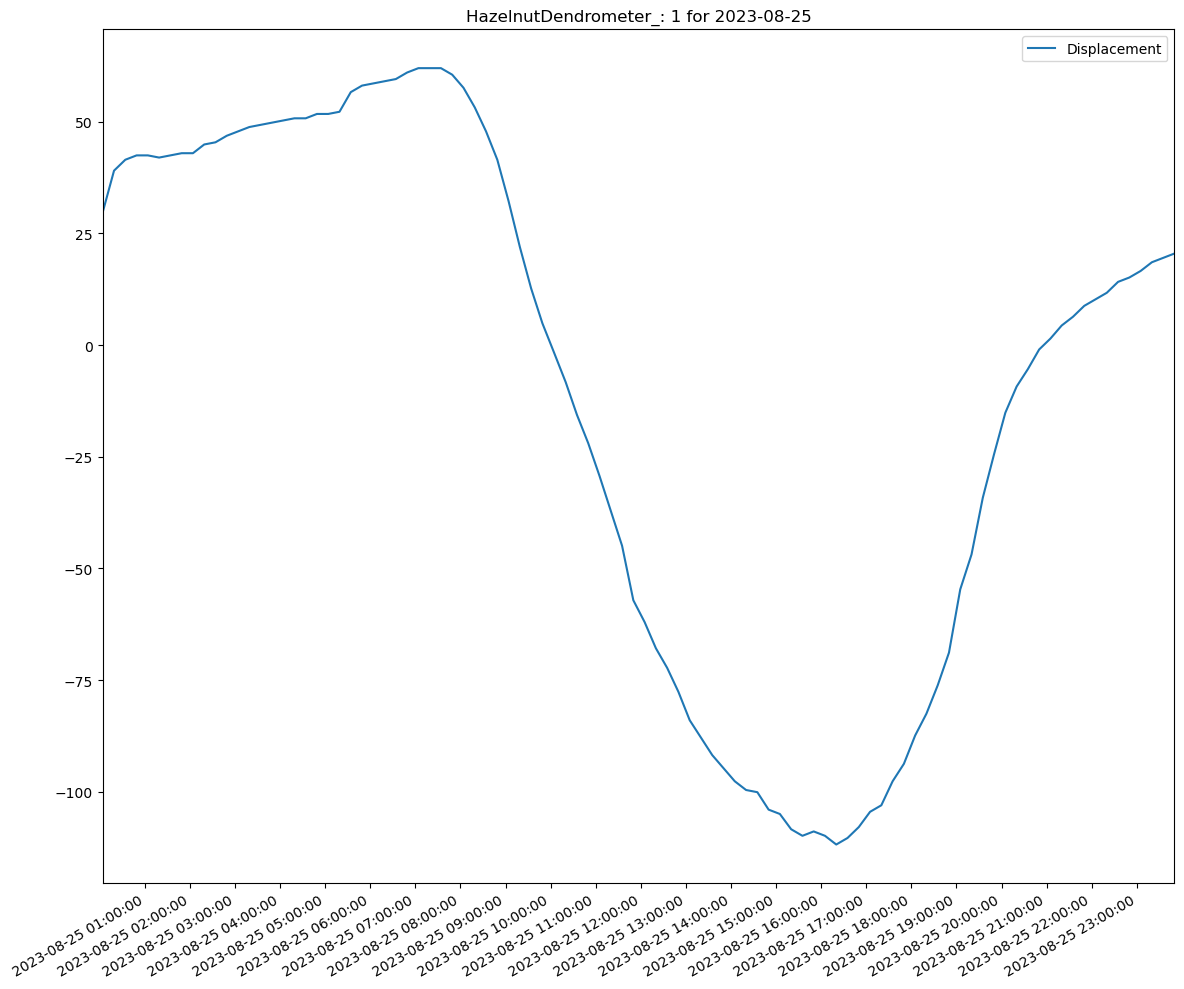

Maximum um: 62.01171875
Maximum um time: 2023-08-25 07:04:00
Minimum um: -111.8164063
Minimum um time: 2023-08-25 16:20:00
Displacement: 173.82812504999998


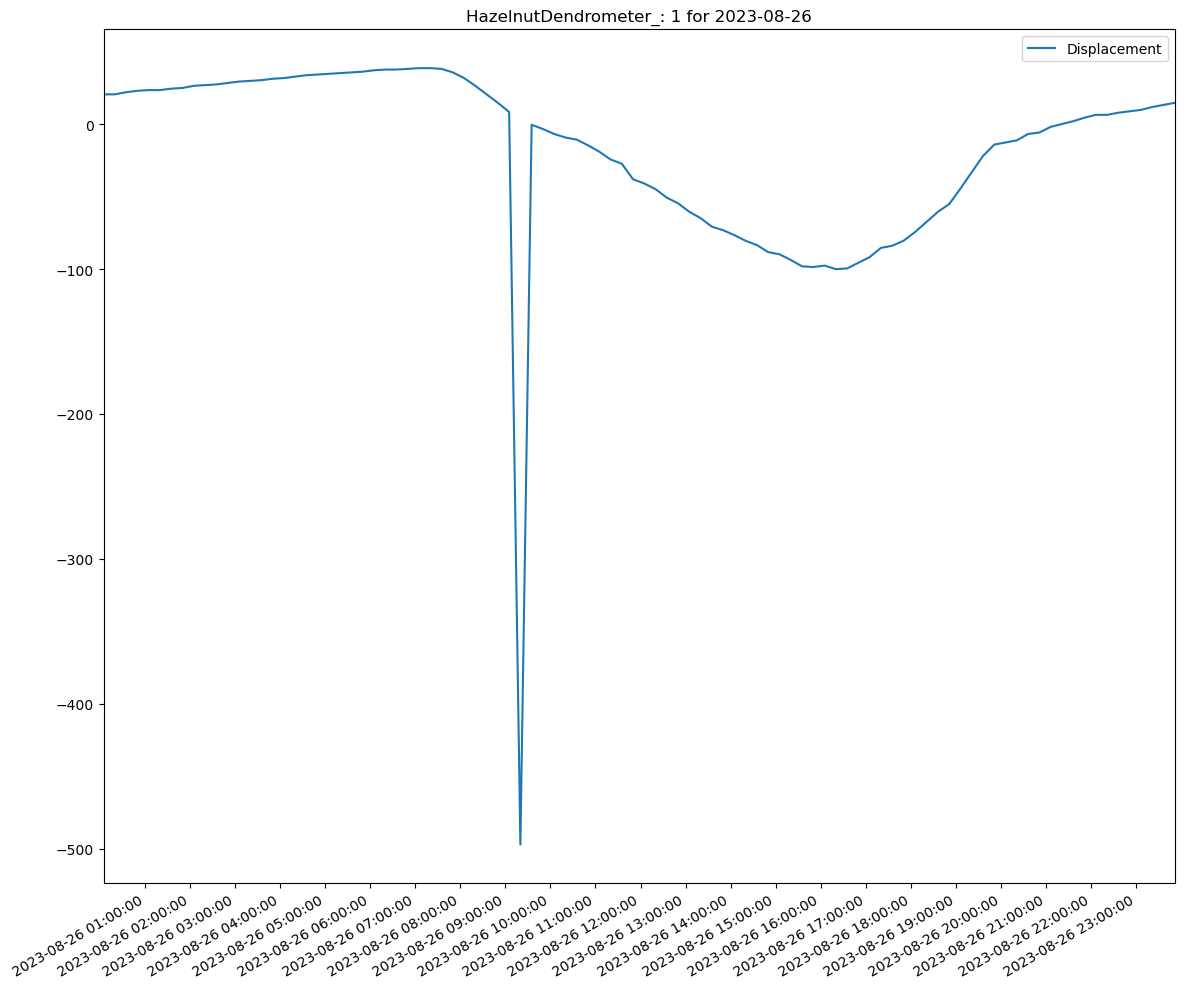

Maximum um: 38.57421875
Maximum um time: 2023-08-26 07:05:00
Minimum um: -497.0703125
Minimum um time: 2023-08-26 09:20:00
Displacement: 535.64453125


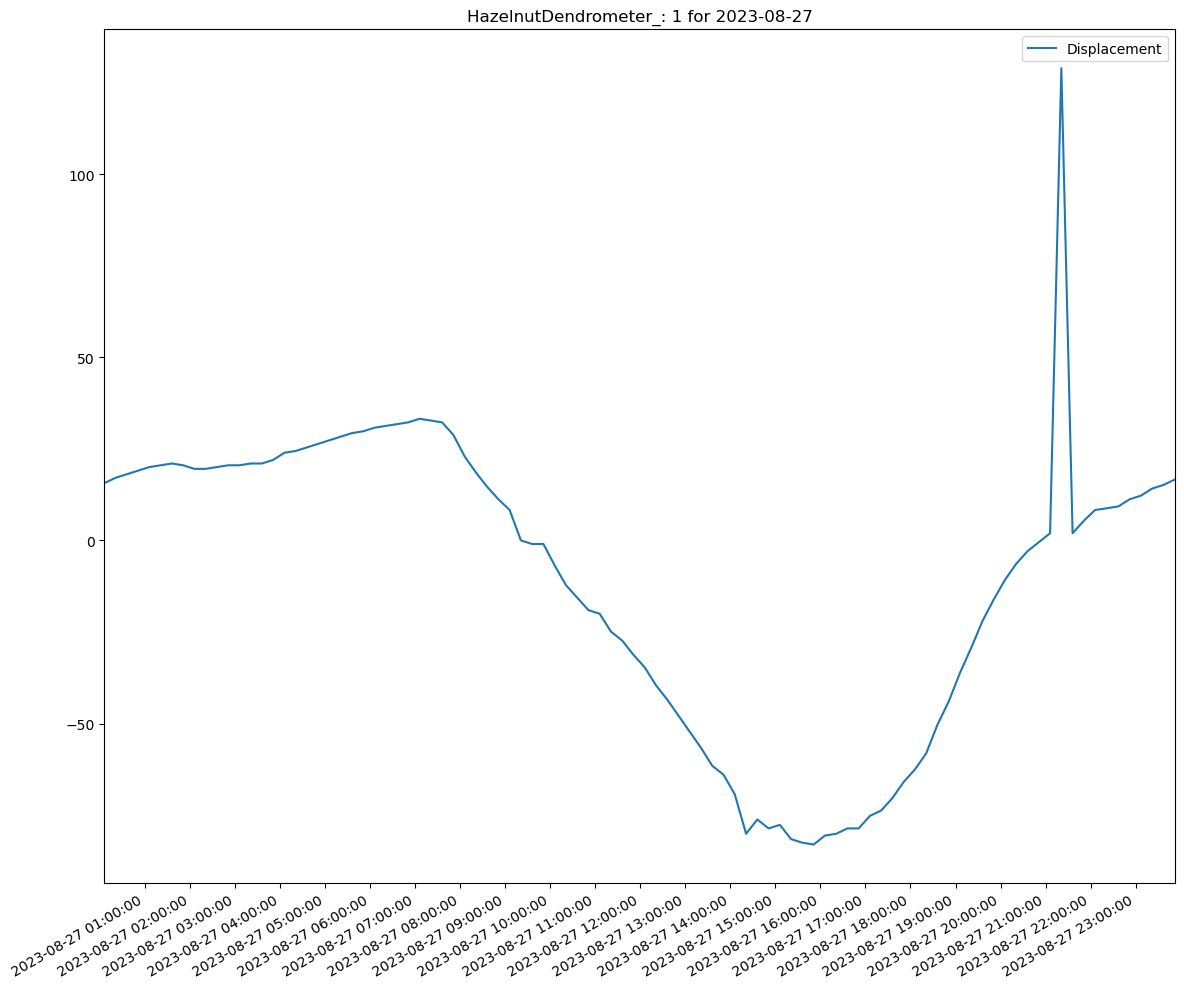

Maximum um: 128.90625
Maximum um time: 2023-08-27 21:21:00
Minimum um: -83.0078125
Minimum um time: 2023-08-27 15:51:00
Displacement: 211.9140625


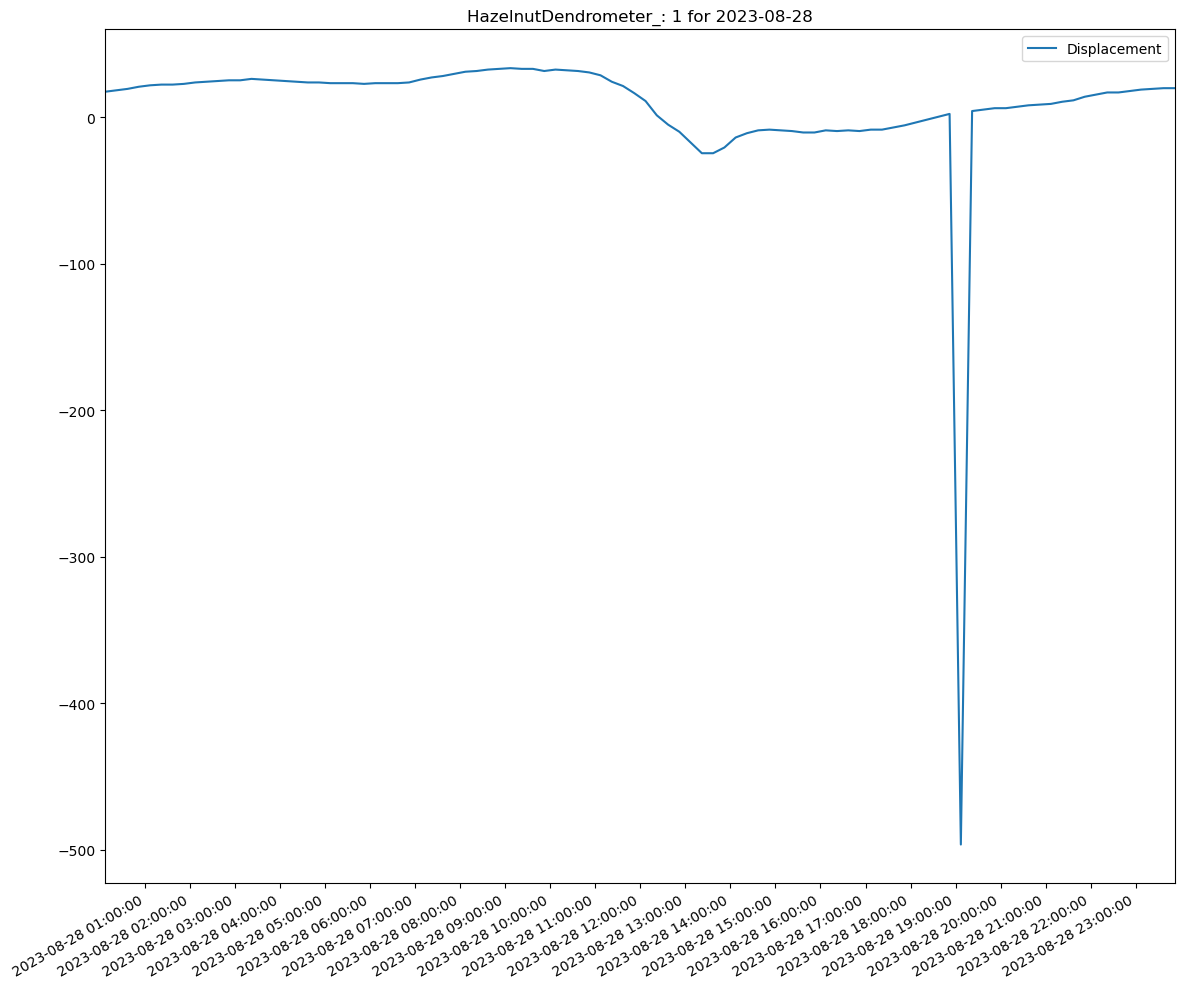

Maximum um: 33.69140625
Maximum um time: 2023-08-28 09:07:00
Minimum um: -496.5820313
Minimum um time: 2023-08-28 19:07:00
Displacement: 530.2734375499999


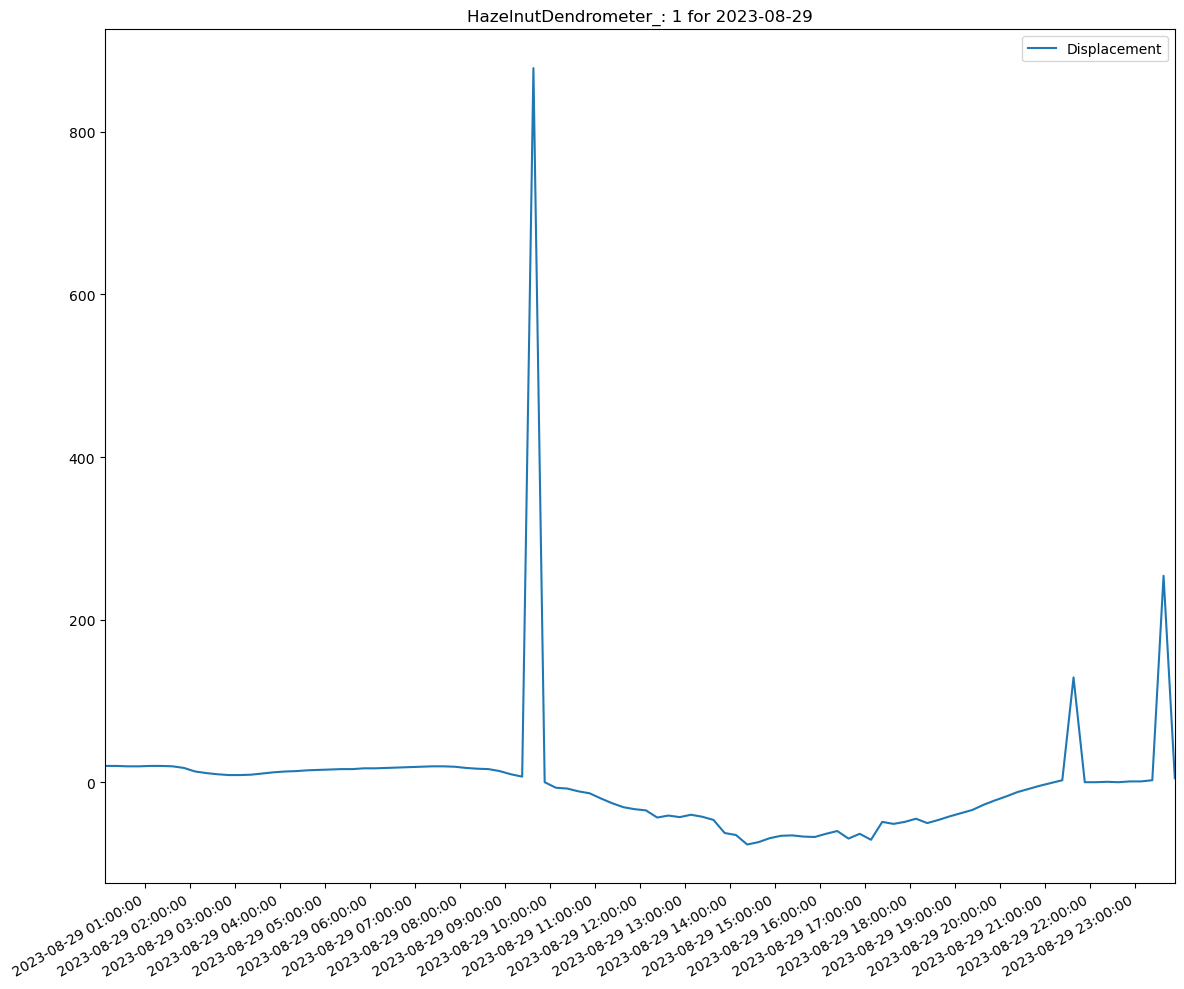

Maximum um: 878.4179688
Maximum um time: 2023-08-29 09:38:00
Minimum um: -76.66015625
Minimum um time: 2023-08-29 14:23:00
Displacement: 955.07812505


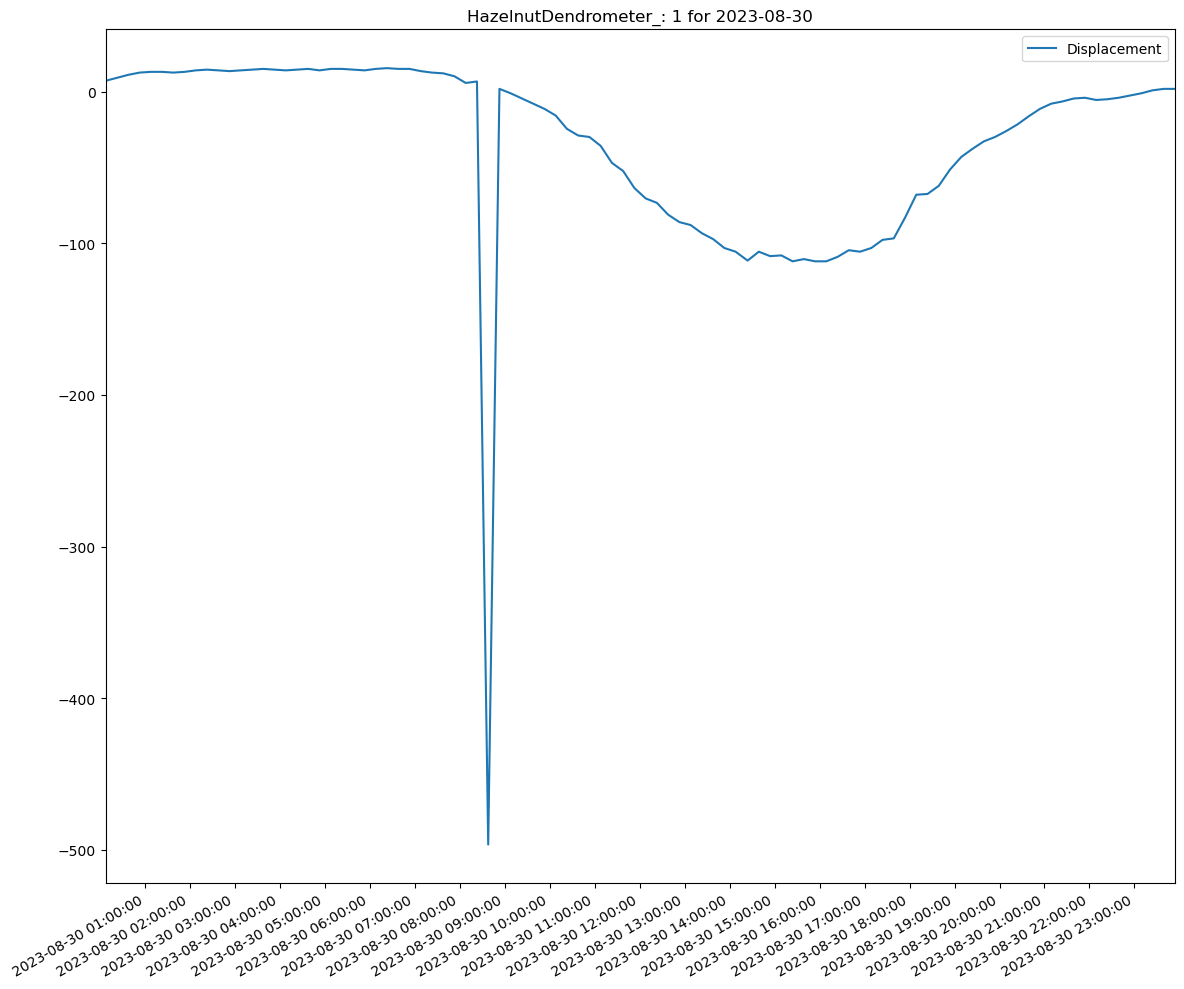

Maximum um: 15.625
Maximum um time: 2023-08-30 06:23:00
Minimum um: -496.5820313
Minimum um time: 2023-08-30 08:38:00
Displacement: 512.2070312999999


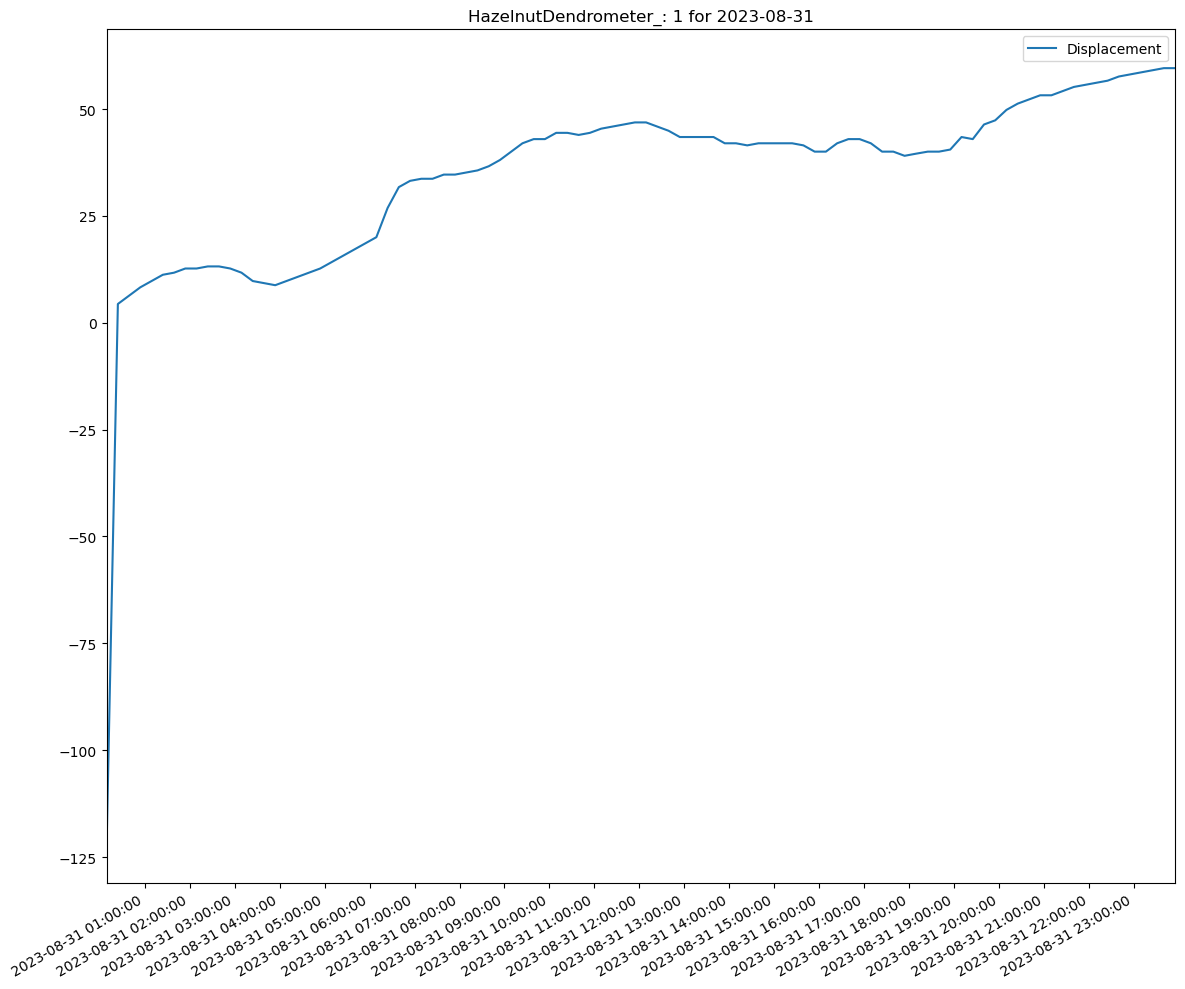

Maximum um: 59.5703125
Maximum um time: 2023-08-31 23:40:00
Minimum um: -122.0703125
Minimum um time: 2023-08-31 00:09:00
Displacement: 181.640625


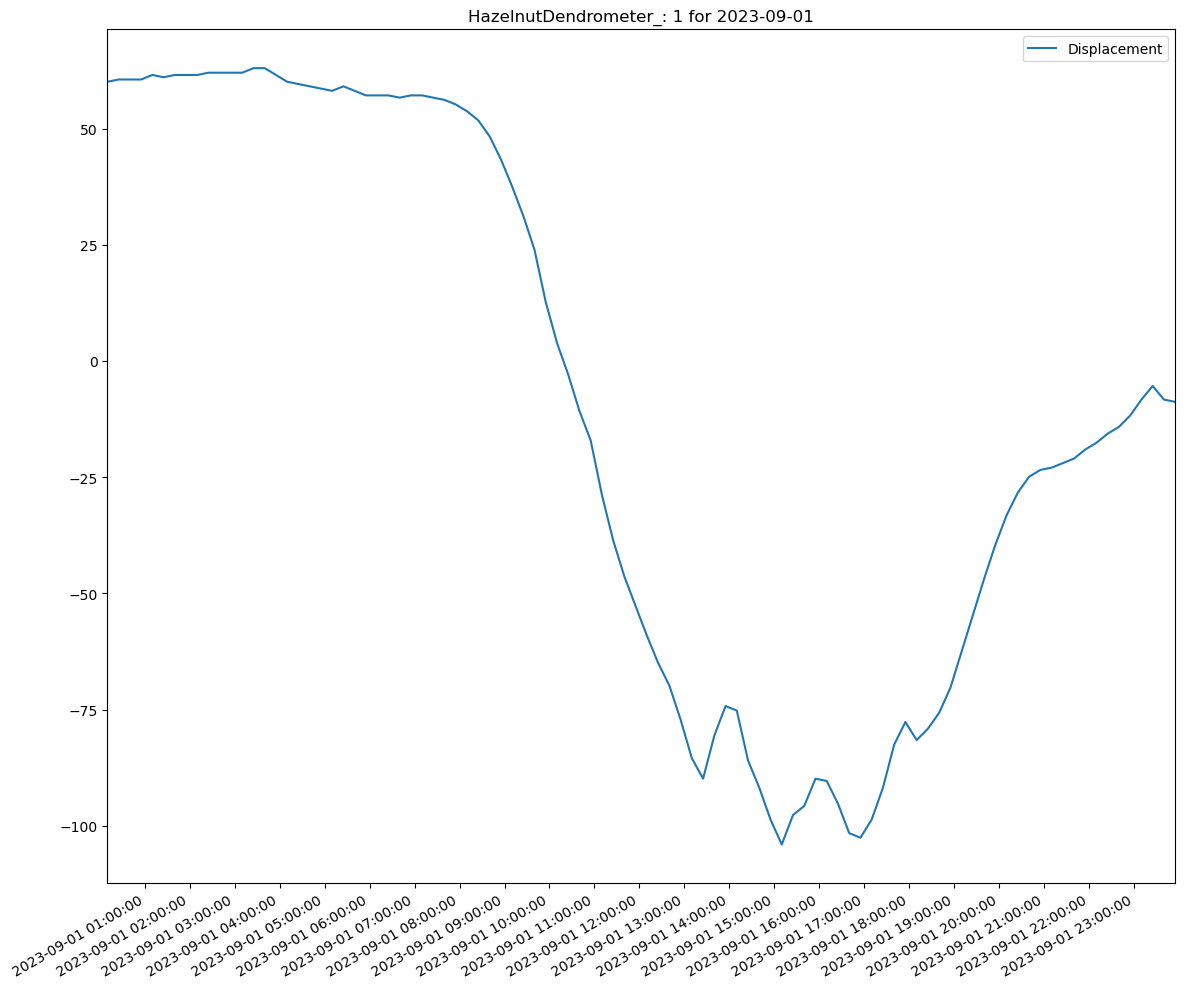

Maximum um: 62.98828125
Maximum um time: 2023-09-01 03:25:00
Minimum um: -104.0039063
Minimum um time: 2023-09-01 15:10:00
Displacement: 166.99218754999998


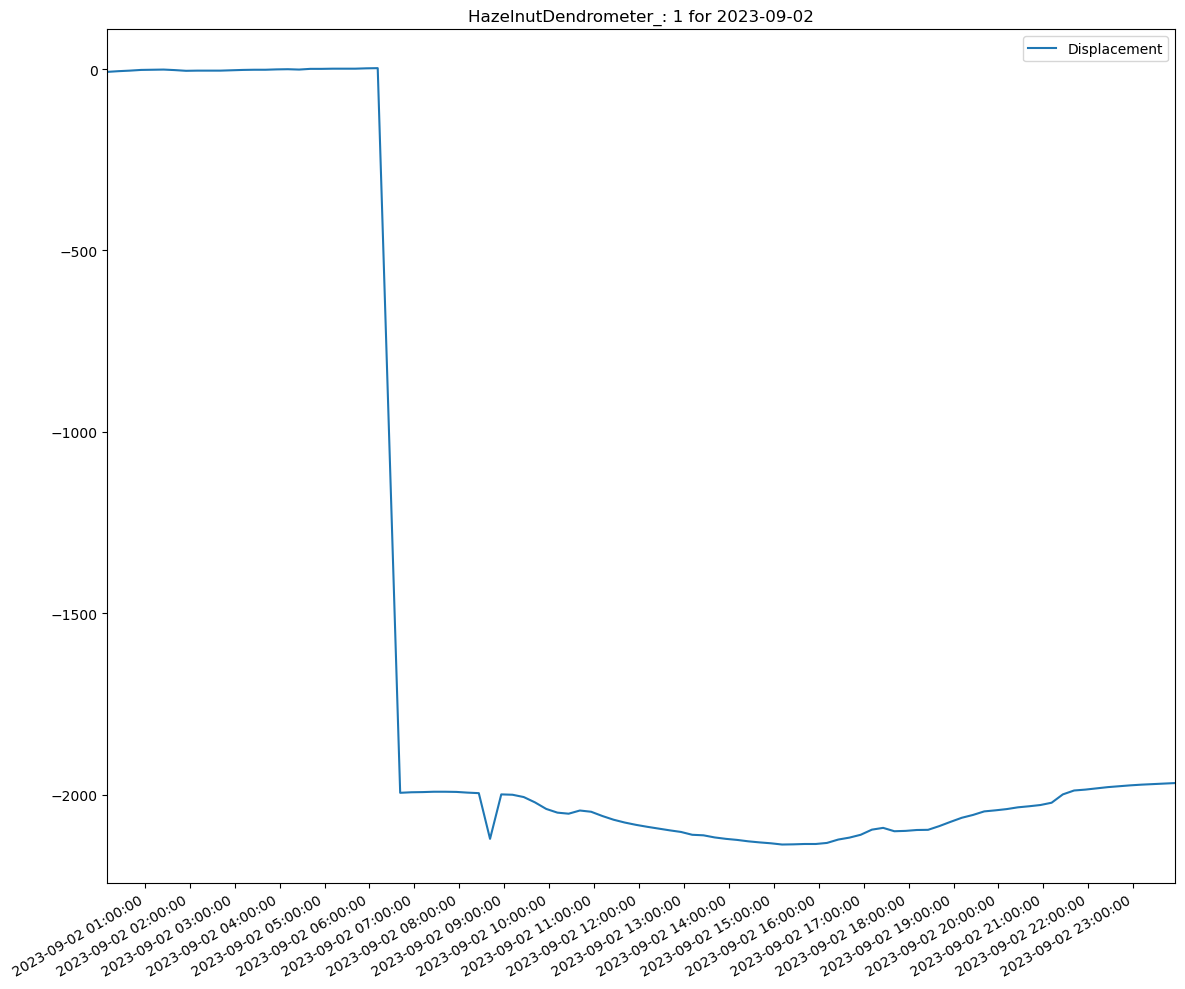

Maximum um: 2.44140625
Maximum um time: 2023-09-02 06:11:00
Minimum um: -2137.695313
Minimum um time: 2023-09-02 15:11:00
Displacement: 2140.13671925


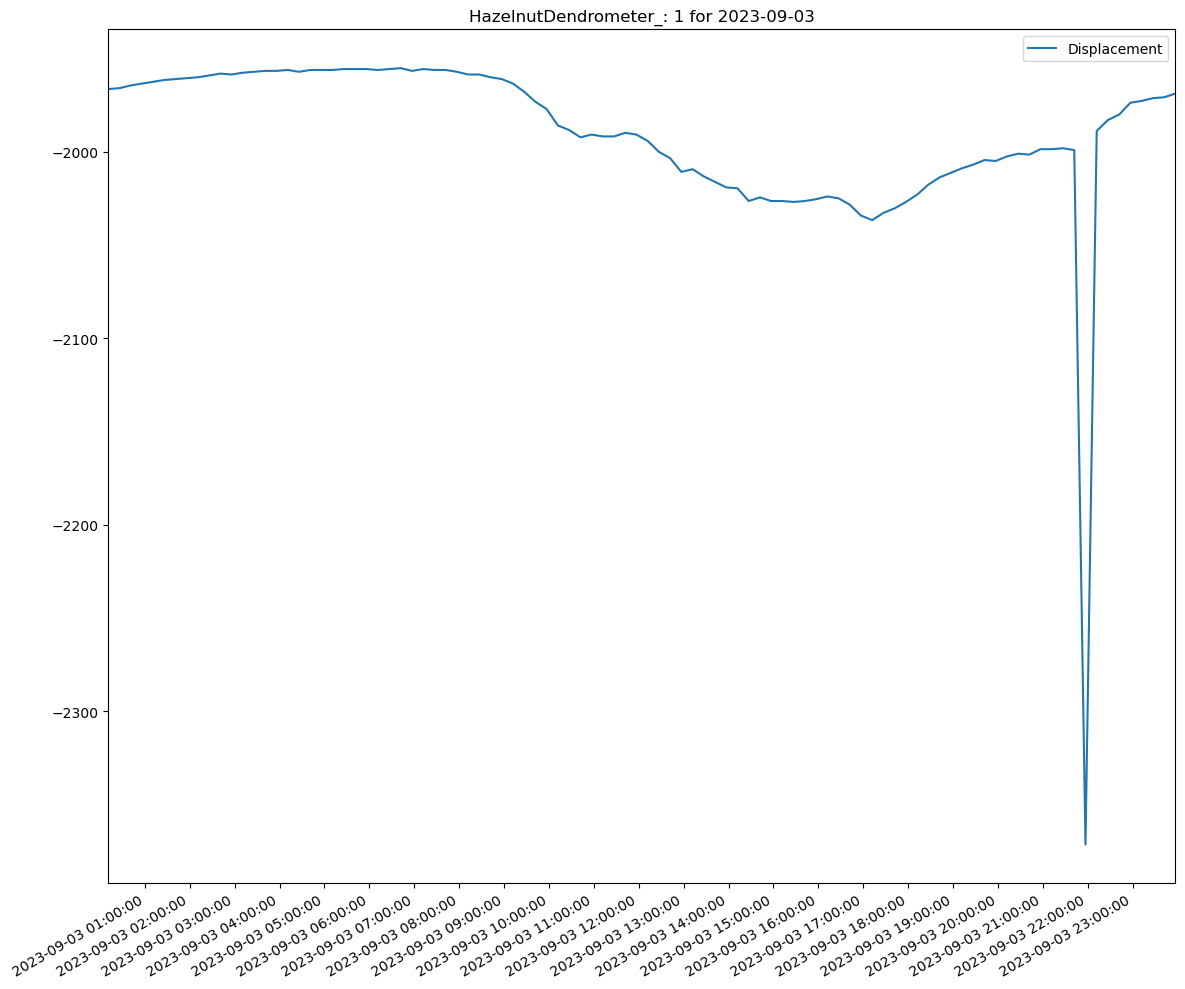

Maximum um: -1955.078125
Maximum um time: 2023-09-03 06:42:00
Minimum um: -2371.582031
Minimum um time: 2023-09-03 21:57:00
Displacement: 416.5039059999999


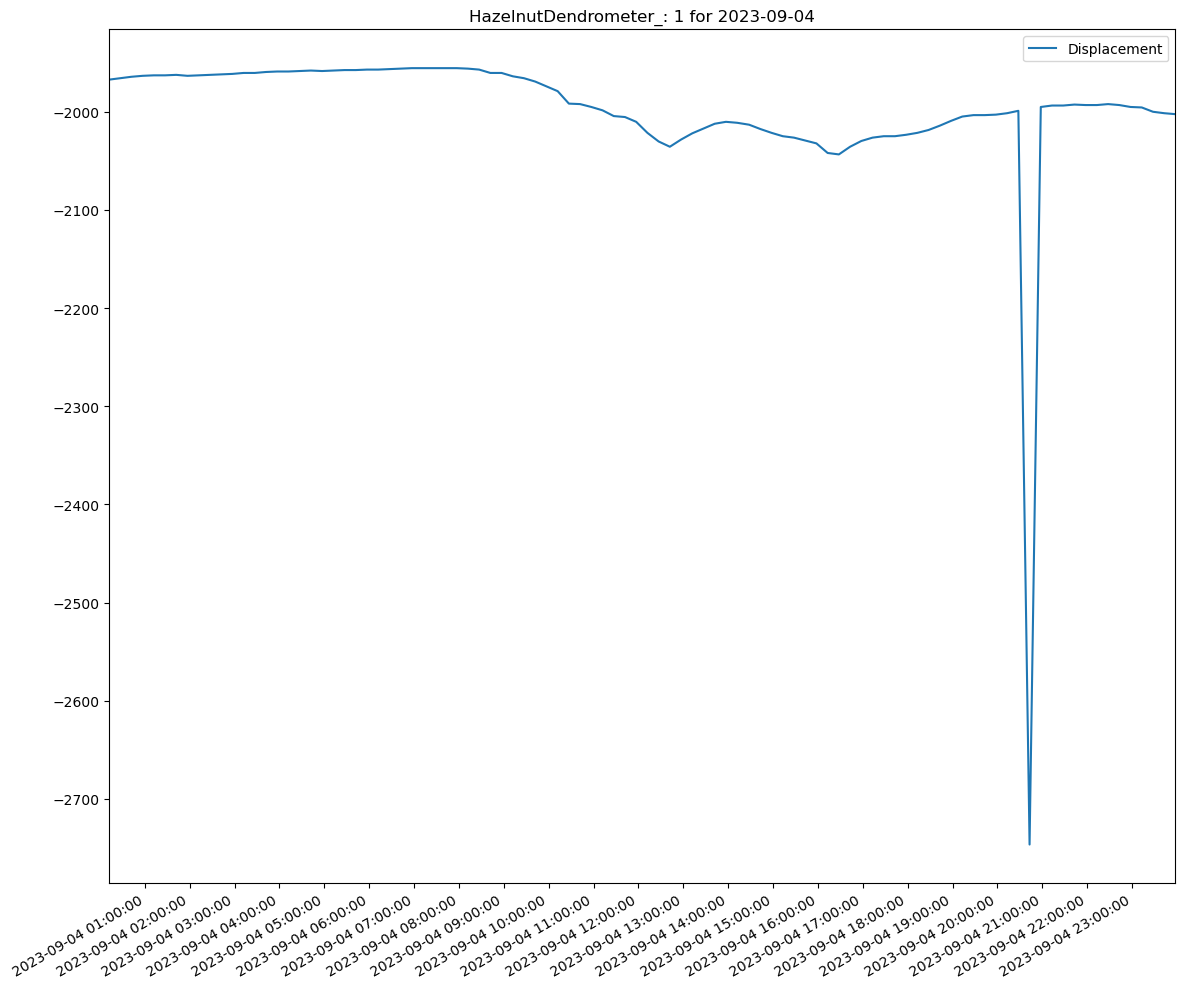

Maximum um: -1955.566406
Maximum um time: 2023-09-04 06:57:00
Minimum um: -2746.582031
Minimum um time: 2023-09-04 20:43:00
Displacement: 791.015625


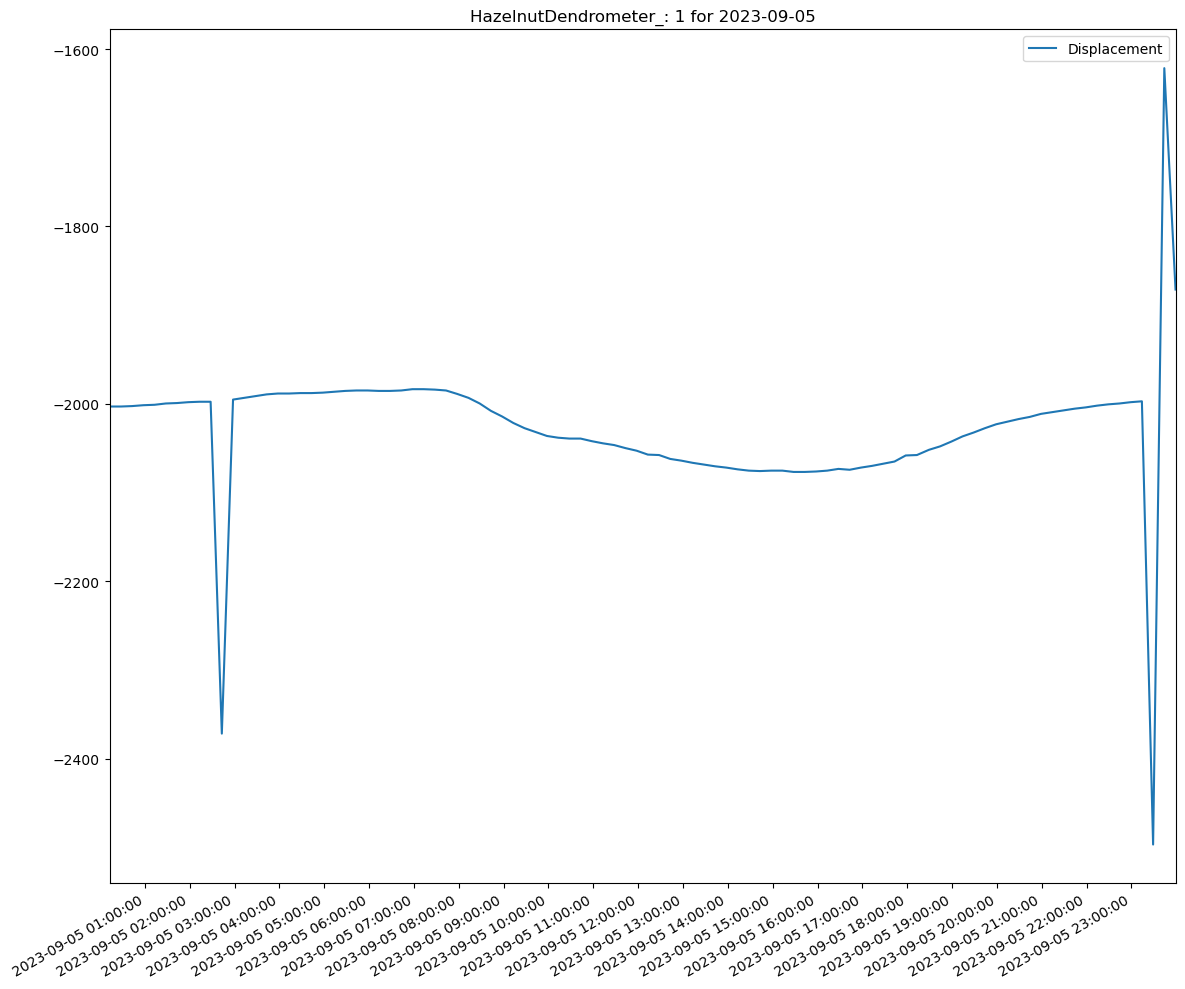

Maximum um: -1621.582031
Maximum um time: 2023-09-05 23:44:00
Minimum um: -2496.582031
Minimum um time: 2023-09-05 23:29:00
Displacement: 875.0


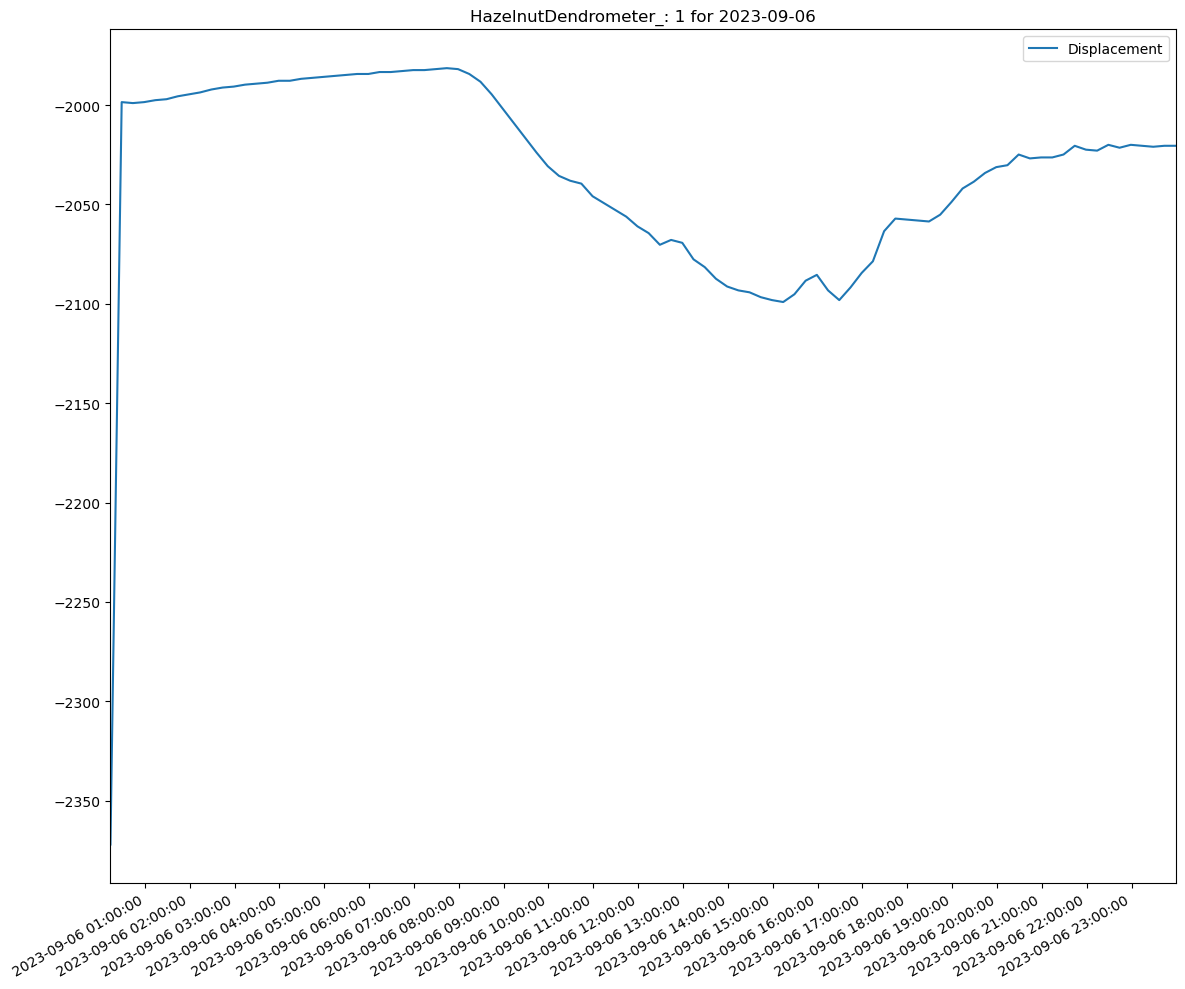

Maximum um: -1981.445313
Maximum um time: 2023-09-06 07:44:00
Minimum um: -2372.070313
Minimum um time: 2023-09-06 00:14:00
Displacement: 390.6250000000002


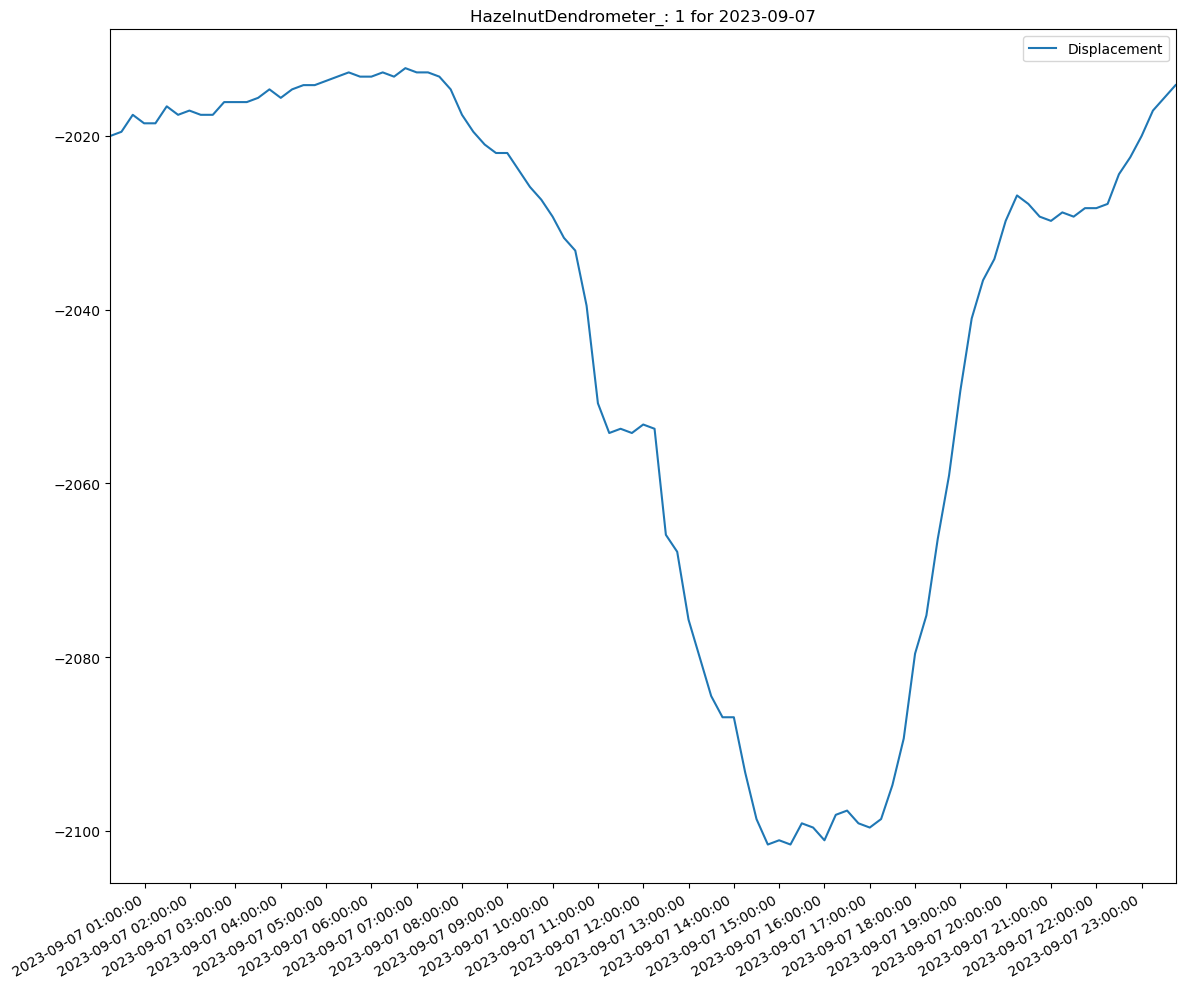

Maximum um: -2012.207031
Maximum um time: 2023-09-07 06:45:00
Minimum um: -2101.5625
Minimum um time: 2023-09-07 14:45:00
Displacement: 89.35546900000008


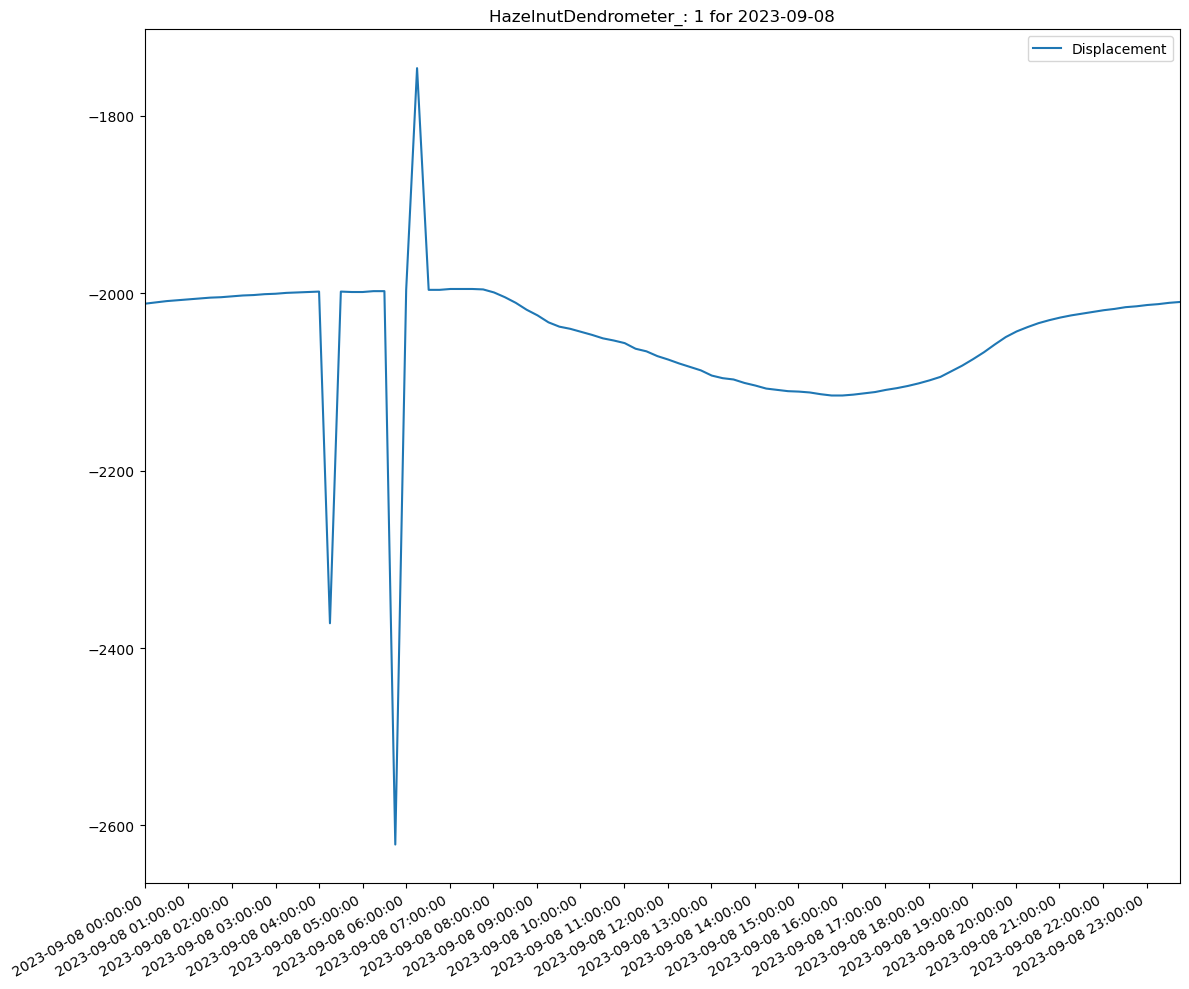

Maximum um: -1746.09375
Maximum um time: 2023-09-08 06:15:00
Minimum um: -2621.582031
Minimum um time: 2023-09-08 05:45:00
Displacement: 875.4882809999999


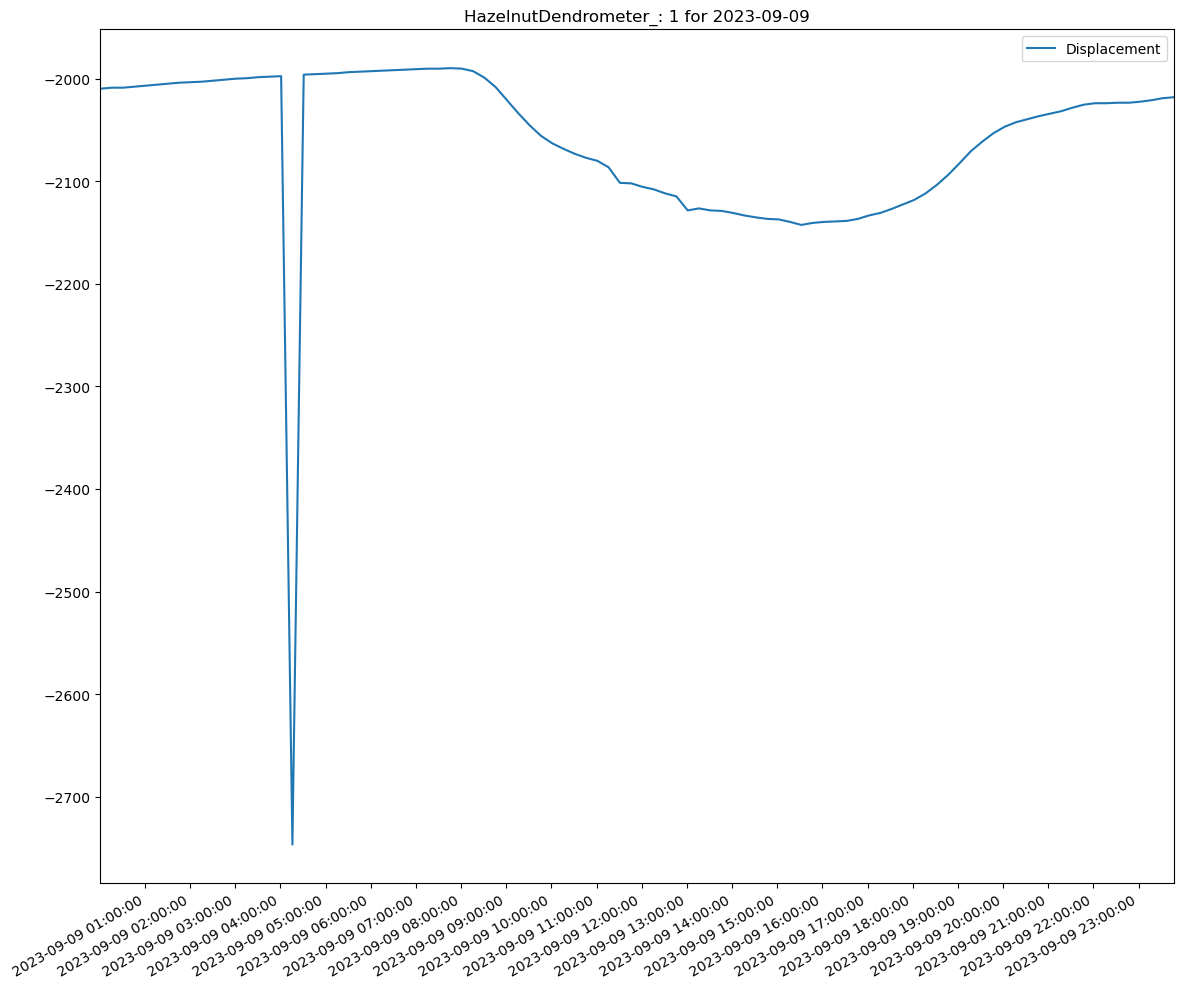

Maximum um: -1989.746094
Maximum um time: 2023-09-09 07:46:00
Minimum um: -2746.582031
Minimum um time: 2023-09-09 04:16:00
Displacement: 756.8359369999998


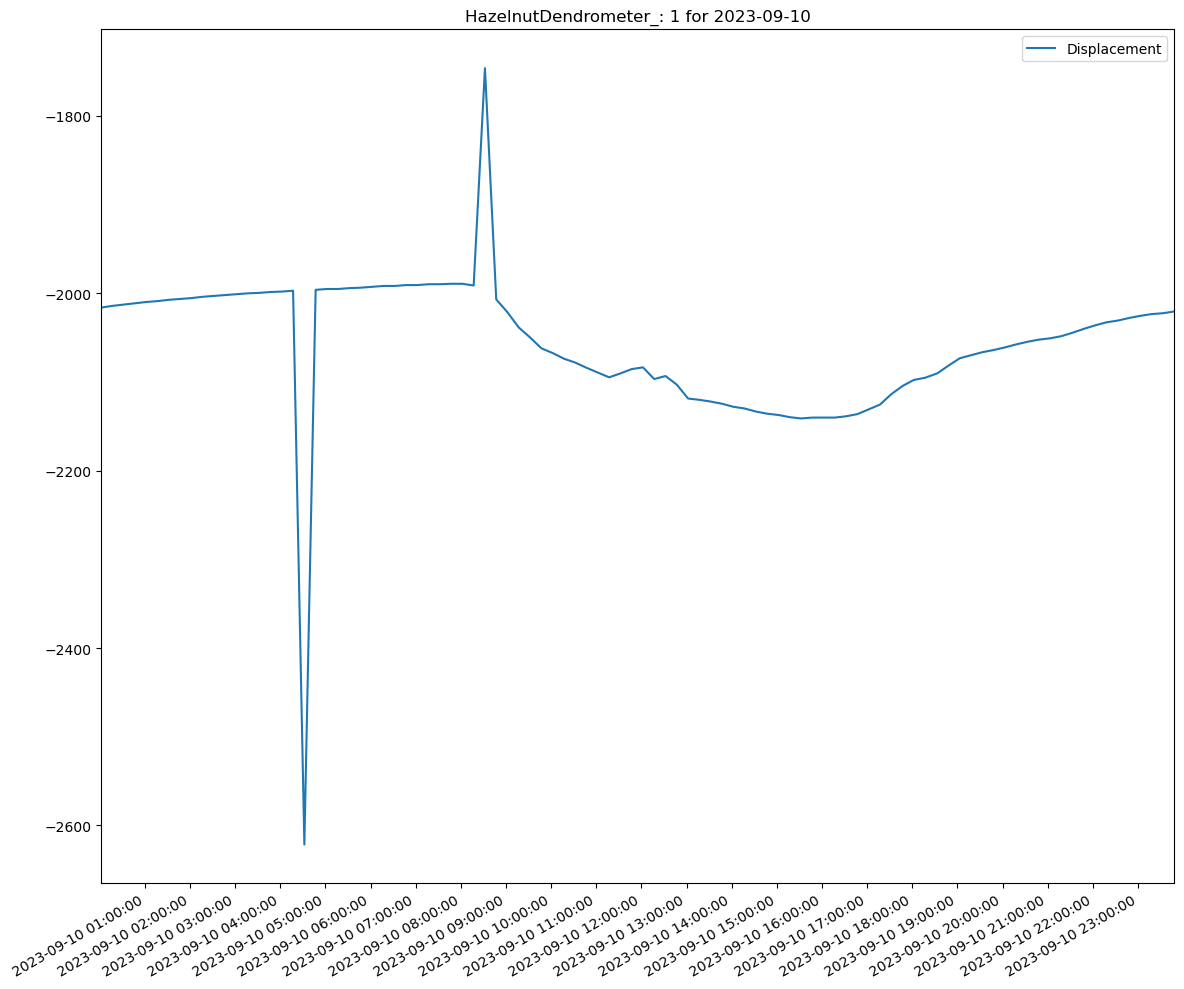

Maximum um: -1746.09375
Maximum um time: 2023-09-10 08:32:00
Minimum um: -2621.582031
Minimum um time: 2023-09-10 04:32:00
Displacement: 875.4882809999999


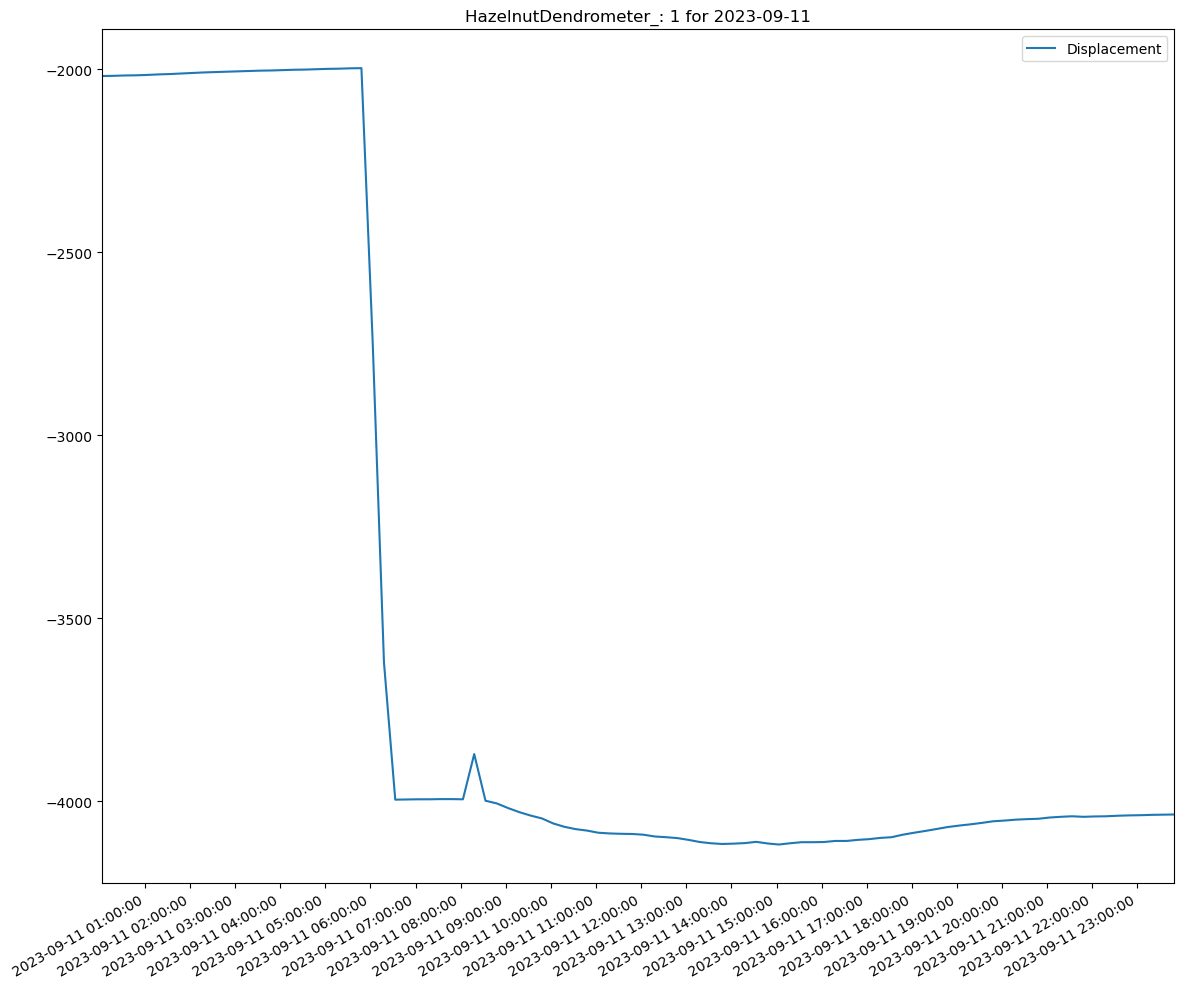

Maximum um: -1997.558594
Maximum um time: 2023-09-11 05:48:00
Minimum um: -4118.164063
Minimum um time: 2023-09-11 15:03:00
Displacement: 2120.605469


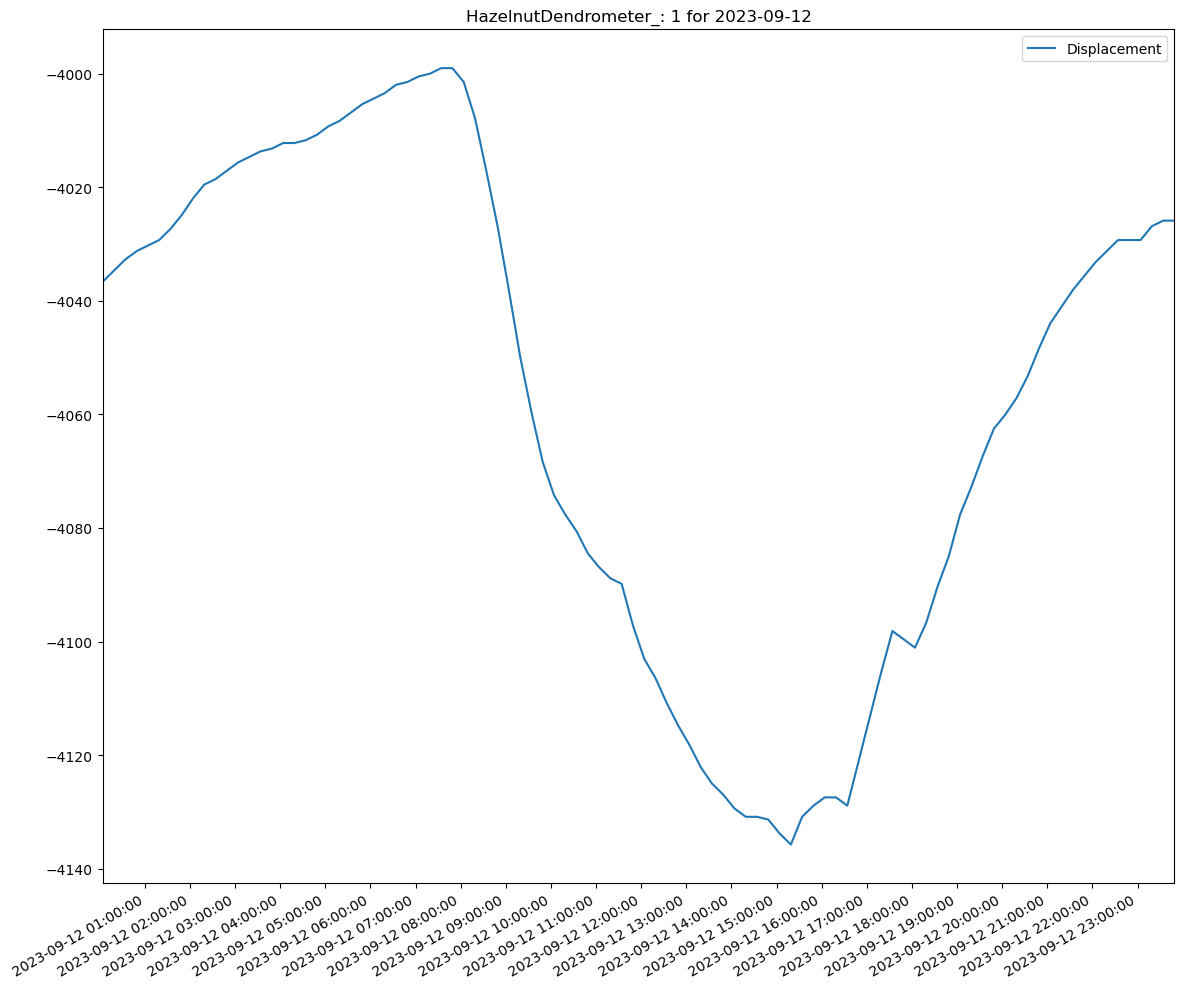

Maximum um: -3999.023438
Maximum um time: 2023-09-12 07:34:00
Minimum um: -4135.742188
Minimum um time: 2023-09-12 15:19:00
Displacement: 136.71875


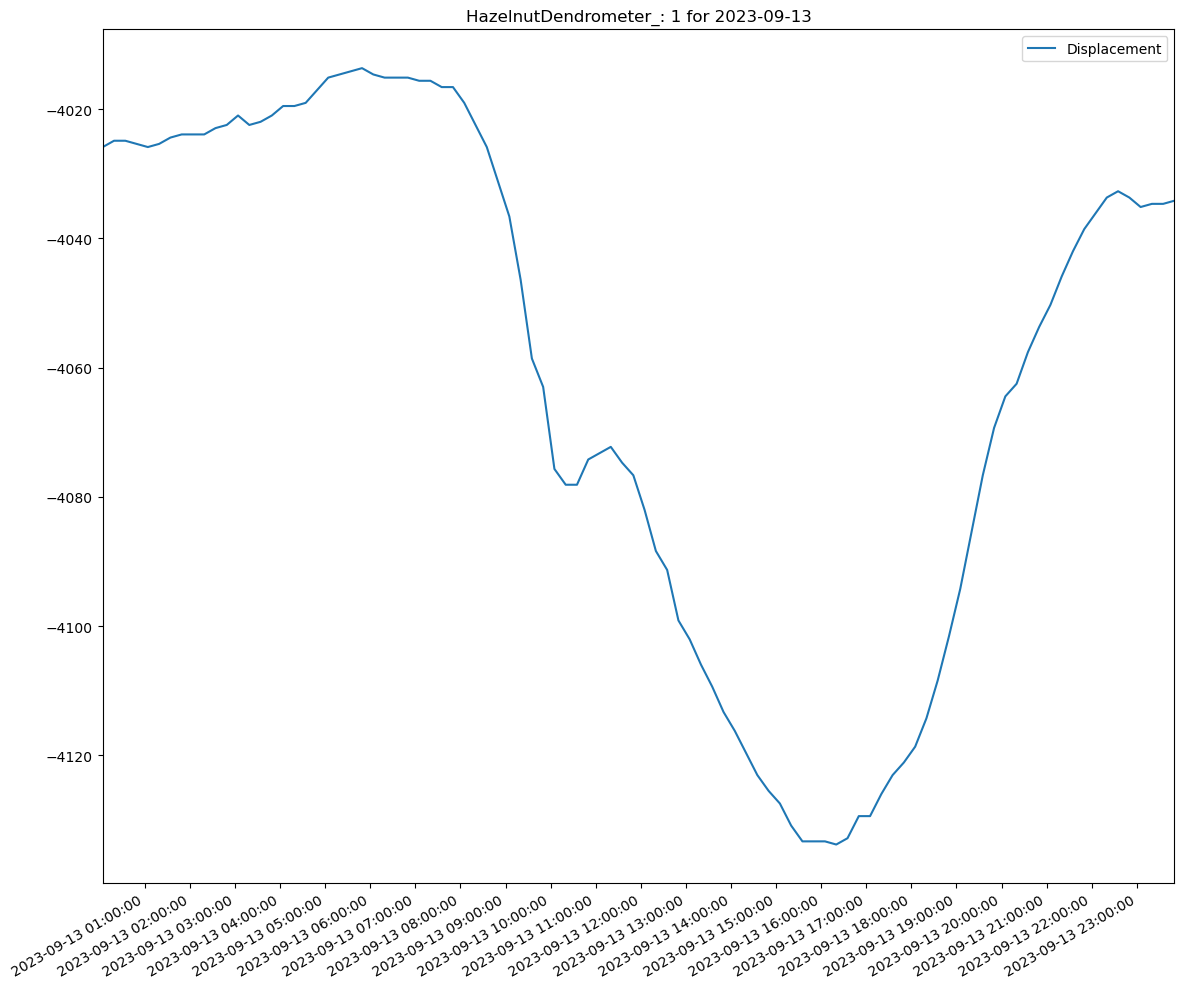

Maximum um: -4013.671875
Maximum um time: 2023-09-13 05:49:00
Minimum um: -4133.789063
Minimum um time: 2023-09-13 16:20:00
Displacement: 120.11718800000017


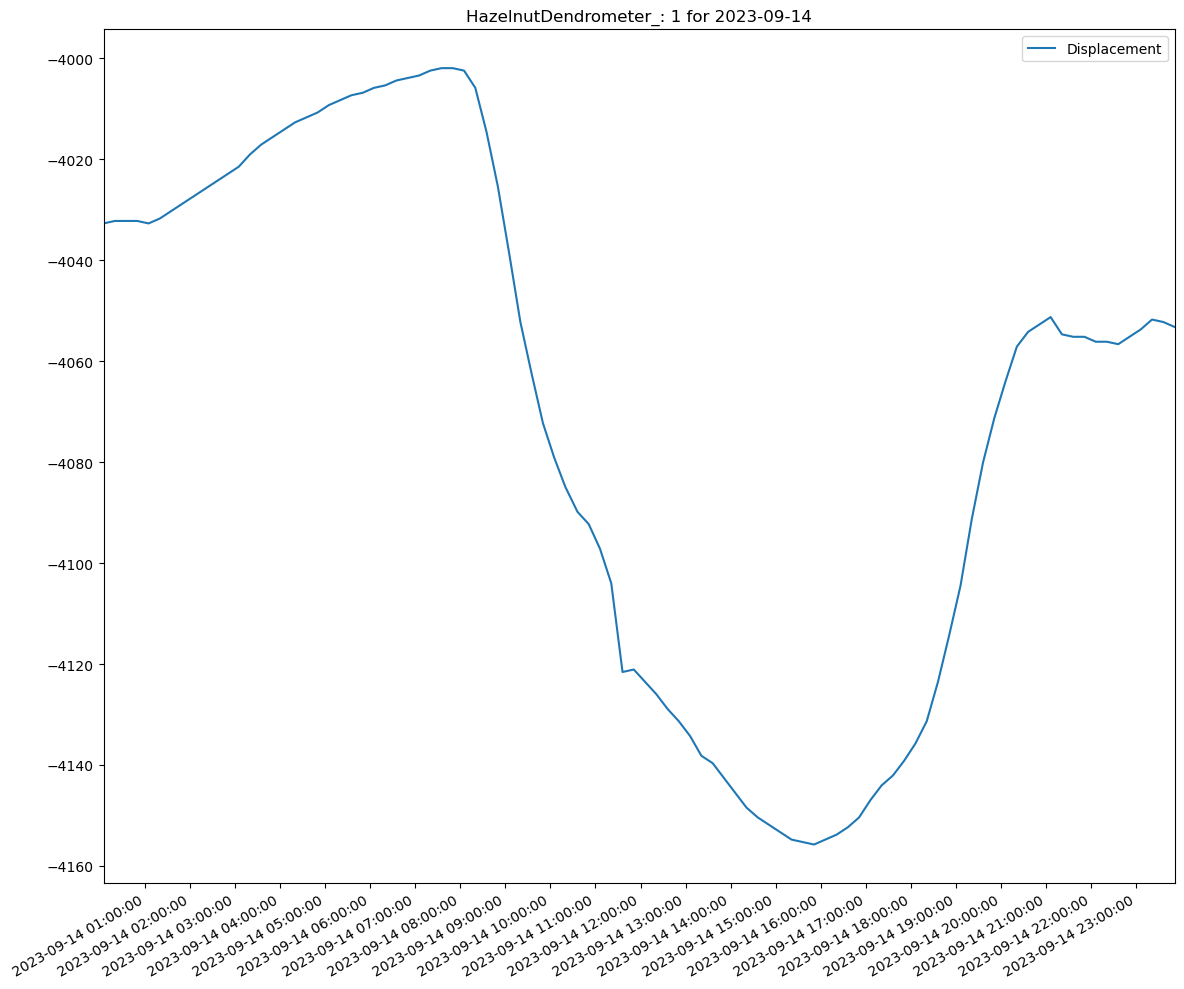

Maximum um: -4001.953125
Maximum um time: 2023-09-14 07:35:00
Minimum um: -4155.761719
Minimum um time: 2023-09-14 15:51:00
Displacement: 153.80859400000008


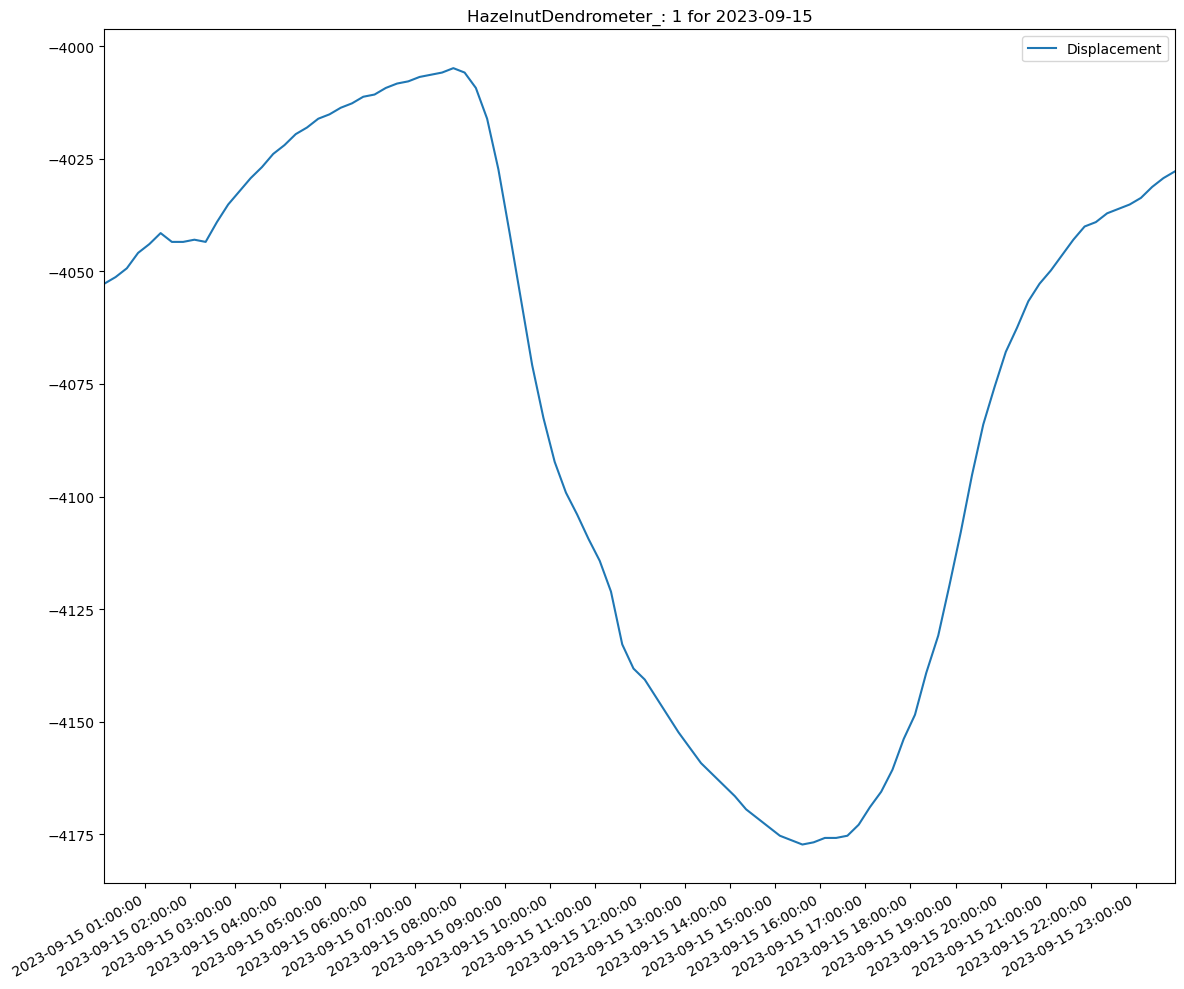

Maximum um: -4004.882813
Maximum um time: 2023-09-15 07:51:00
Minimum um: -4177.246094
Minimum um time: 2023-09-15 15:36:00
Displacement: 172.36328099999992


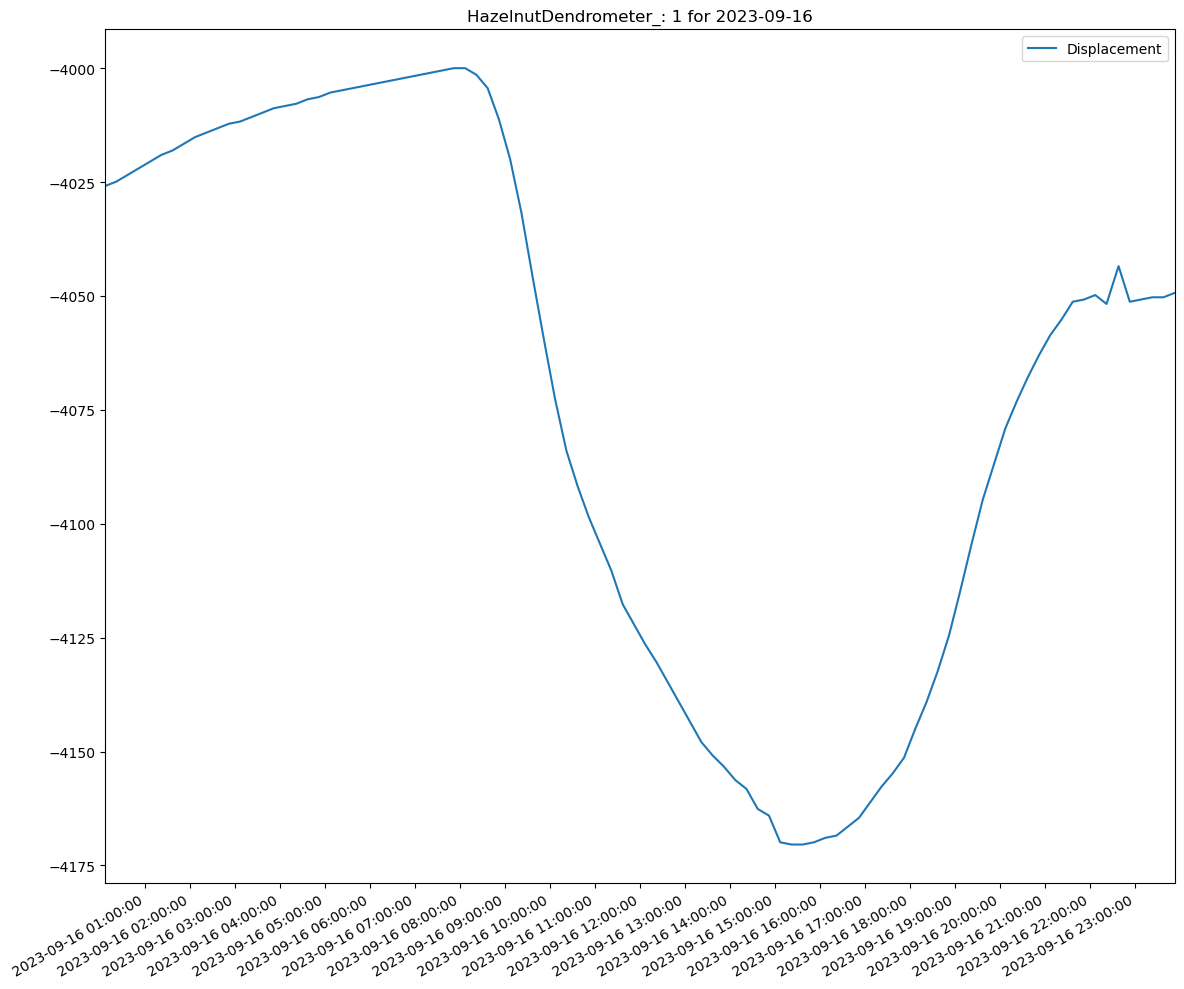

Maximum um: -4000.0
Maximum um time: 2023-09-16 07:52:00
Minimum um: -4170.410156
Minimum um time: 2023-09-16 15:22:00
Displacement: 170.41015599999992


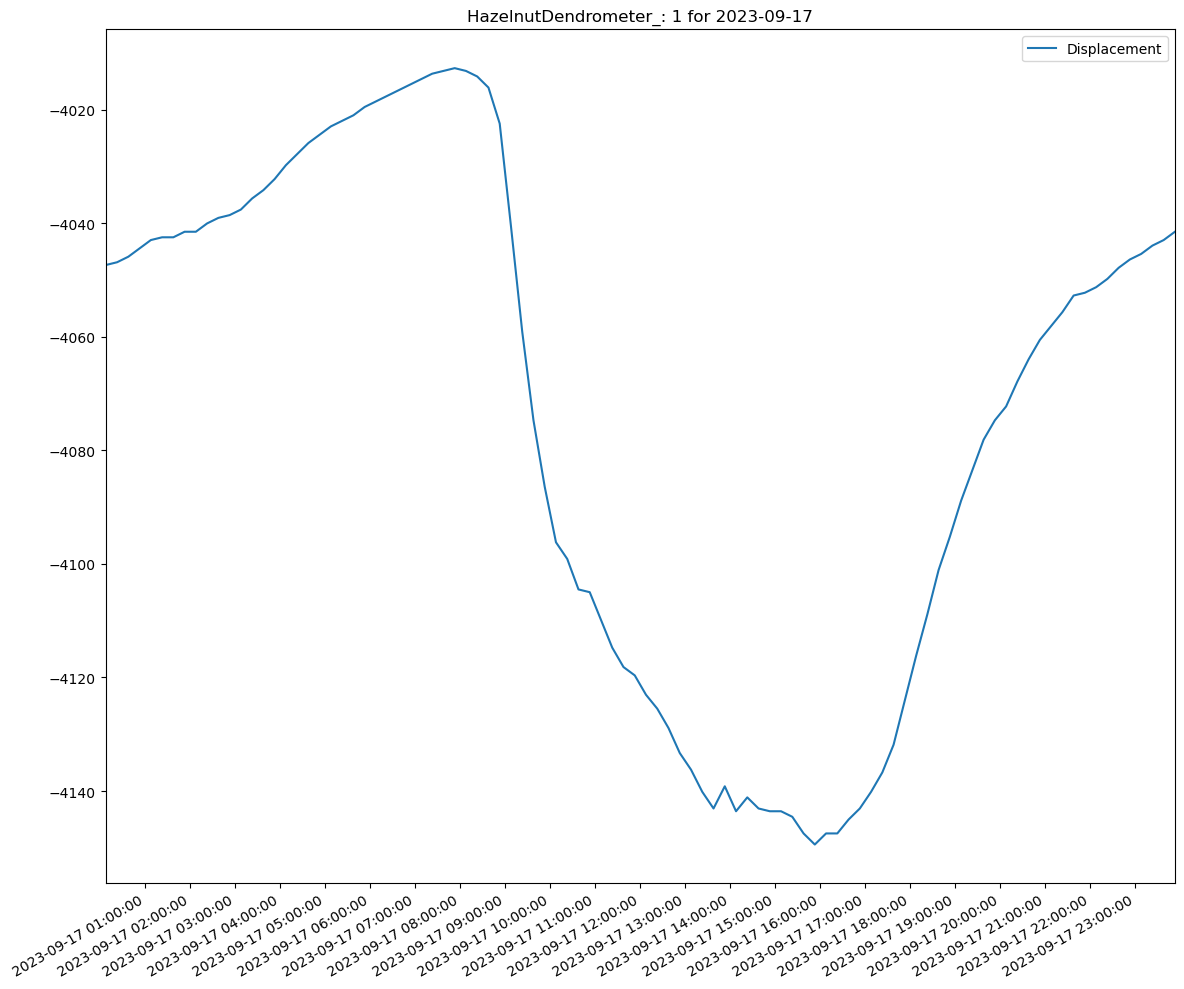

Maximum um: -4012.695313
Maximum um time: 2023-09-17 07:53:00
Minimum um: -4149.414063
Minimum um time: 2023-09-17 15:53:00
Displacement: 136.71875


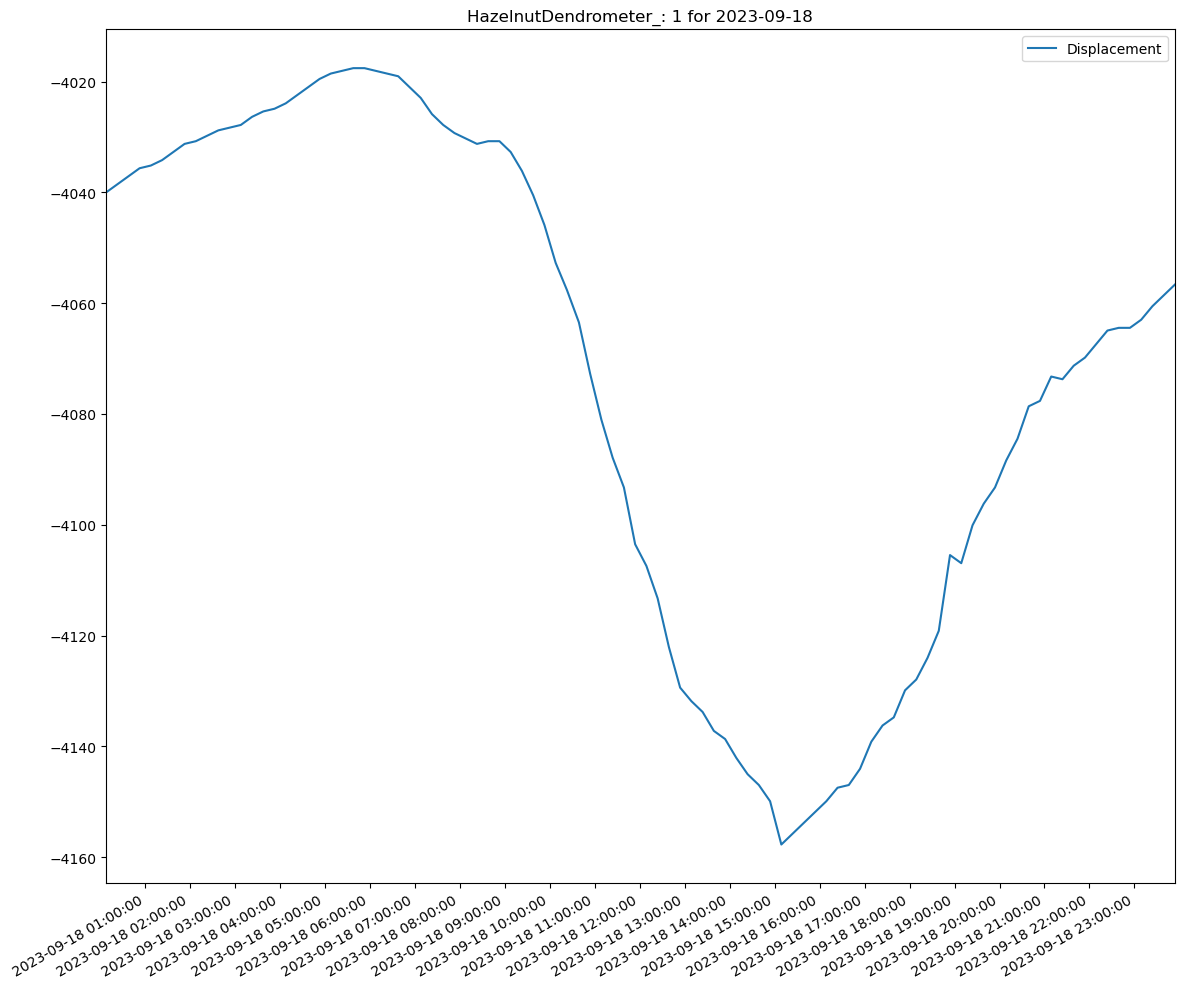

Maximum um: -4017.578125
Maximum um time: 2023-09-18 05:38:00
Minimum um: -4157.714844
Minimum um time: 2023-09-18 15:09:00
Displacement: 140.13671900000008


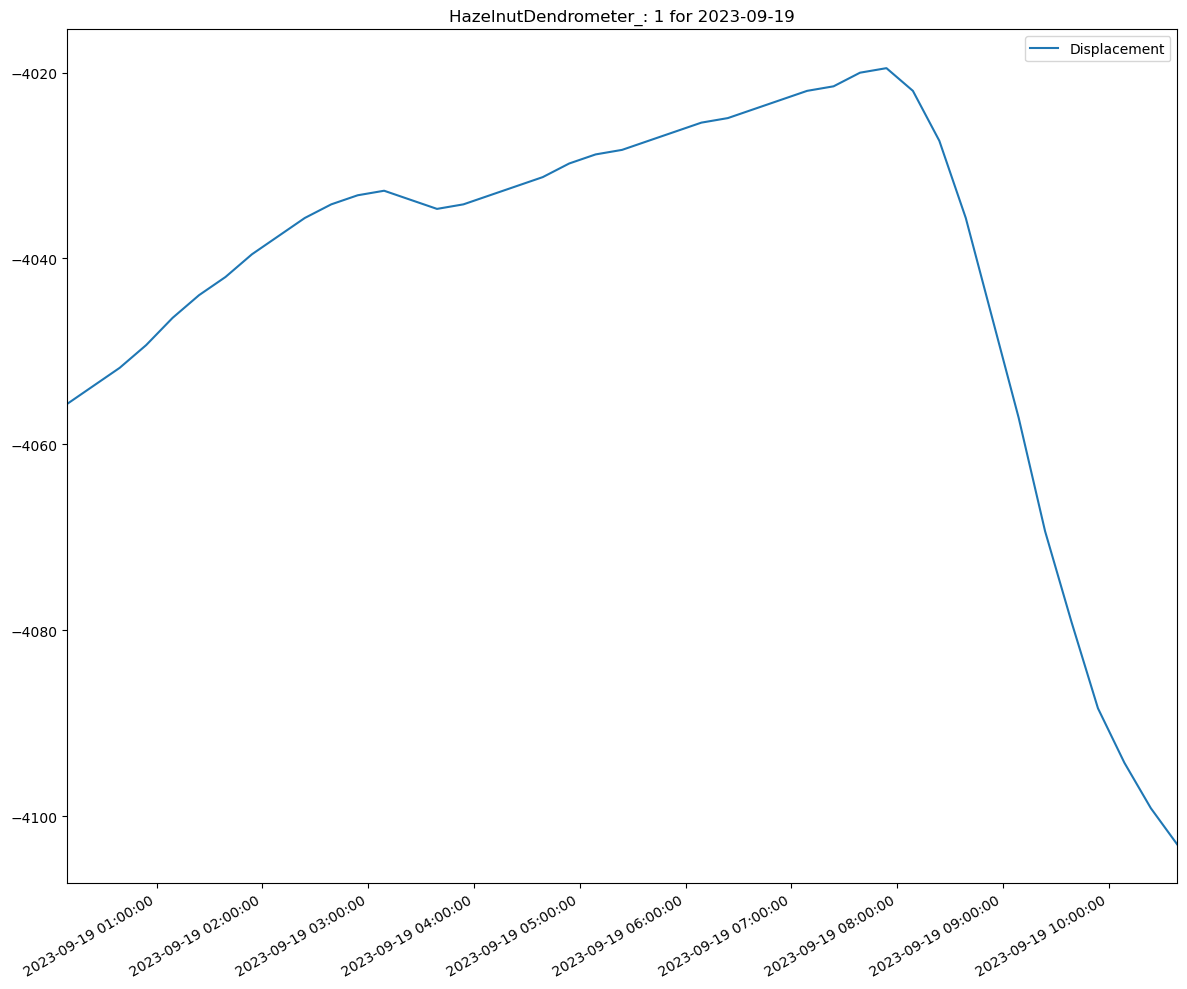

Maximum um: -4019.53125
Maximum um time: 2023-09-19 07:54:00
Minimum um: -4103.027344
Minimum um time: 2023-09-19 10:39:00
Displacement: 83.49609400000008


In [20]:
 #specify which dates you want to analyze
start_date = date(2023, 7, 15)
end_date = date(2023, 9, 19)

day_delta = timedelta(days=1)

current_date = start_date

#create list for each value
maximum_um_list = []
minimum_um_list = []
date_time_max_um_list = []
date_time_min_um_list = []
total_displacement_list = []

while current_date <= end_date: #loop through dates in dataset
    df_filtered = df[df['time_local'].dt.date == current_date]
    plot_target_date(df, device_name, current_date)
    
    maximum_um = df_filtered['um'].max() #max and min um value on this date
    minimum_um = df_filtered['um'].min()

    max_um_row = df_filtered[df_filtered['um'] == maximum_um] #time when max um occured
    date_time_max_um = max_um_row['time_local'].iloc[0]

    min_um_row = df_filtered[df_filtered['um'] == minimum_um] #time when min um occured
    date_time_min_um = min_um_row['time_local'].iloc[0]

    total_displacement = maximum_um - minimum_um #find the difference between max and min um value on this date
    
     # Append the values
#     date_list.append(current_date)
    maximum_um_list.append(maximum_um)
    minimum_um_list.append(minimum_um)
    date_time_max_um_list.append(date_time_max_um)
    date_time_min_um_list.append(date_time_min_um)
    total_displacement_list.append(total_displacement)

    
    print(f"Maximum um: {maximum_um}")
    print(f"Maximum um time: {date_time_max_um}")
    print(f"Minimum um: {minimum_um}")
    print(f"Minimum um time: {date_time_min_um}")
    print(f"Displacement: {total_displacement}")
    
   
    current_date += day_delta

  

In [21]:
#print dataset that lists max and min um along with the time and date they occured
disp_data_df = pd.DataFrame({
    'Max um': maximum_um_list,
    'Time (Max um)': date_time_max_um_list,
    'Min um': minimum_um_list,
    'Time (Min um)': date_time_min_um_list,
    'Displacement': total_displacement_list
})

# Print the DataFrame or use it for further analysis
print(disp_data_df)

         Max um       Time (Max um)       Min um       Time (Min um)  \
0    -50.781250 2023-07-15 01:45:00  -257.812500 2023-07-15 16:30:00   
1    -75.195312 2023-07-16 06:16:00  -210.449219 2023-07-16 17:16:00   
2    -71.289062 2023-07-17 23:48:00  -161.132812 2023-07-17 16:17:00   
3    -55.175781 2023-07-18 06:03:00  -171.875000 2023-07-18 16:18:00   
4    -21.972656 2023-07-19 23:57:00  -178.222656 2023-07-19 15:57:00   
..          ...                 ...          ...                 ...   
62 -4004.882813 2023-09-15 07:51:00 -4177.246094 2023-09-15 15:36:00   
63 -4000.000000 2023-09-16 07:52:00 -4170.410156 2023-09-16 15:22:00   
64 -4012.695313 2023-09-17 07:53:00 -4149.414063 2023-09-17 15:53:00   
65 -4017.578125 2023-09-18 05:38:00 -4157.714844 2023-09-18 15:09:00   
66 -4019.531250 2023-09-19 07:54:00 -4103.027344 2023-09-19 10:39:00   

    Displacement  
0     207.031250  
1     135.253906  
2      89.843750  
3     116.699219  
4     156.250000  
..           ...  
62

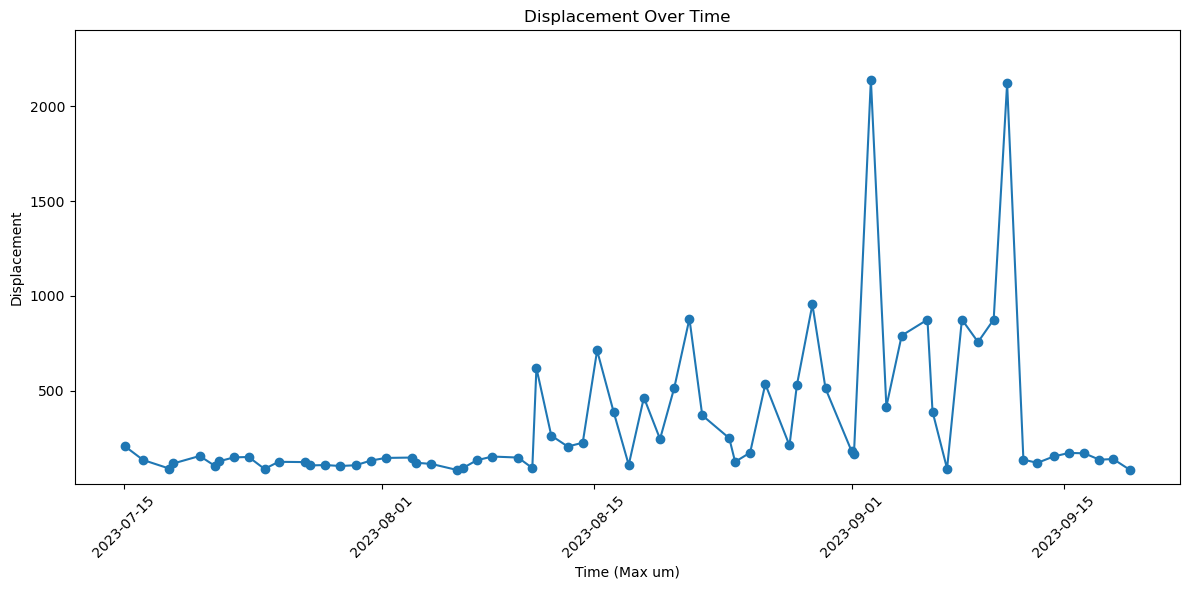

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(disp_data_df['Time (Max um)'], disp_data_df['Displacement'], marker='o', linestyle='-')
plt.xlabel('Time (Max um)')
plt.ylabel('Displacement')
plt.title('Displacement Over Time')
plt.xticks(rotation=45)
plt.ylim(10, 2400)  # Set the y-axis limits
plt.tight_layout()
plt.show()

In [19]:
# # Specify the file path where you want to save the CSV file
# csv_file_path = 'dispacement_data_H1_complete.csv'

# # Use the to_csv method to save the DataFrame to a CSV file
# disp_data_df.to_csv(csv_file_path, index=False)

# print(f'Data saved to {csv_file_path}')